## Purpose of the notebook
Train convolutional neural network classifier:
1. split the data in three parts:
    * train = ['101', '103', '105', '106', '109', '111', '112', '113', '115', '116', '117', '119', '121', '122', '123', '200', '201', '202', '205', '207', '208', '209', '212', '219', '221', '222', '230', '231', '232', '233']
    * val = ['100', '124', '215', '223']
    * test = ['108', '114', '118', '203', '210', '213', '214', '220', '228', '234']
2. train on the train set
3. evaluate the F1 score on validation set (excluding class N) and save the best model producing highest score.
4. evaluate the F1 score and additional metrics from eval funcs on the test set.

In [2]:
import pandas as pd
import os
import sys
sys.path.insert(0, os.path.abspath('../../src/'))
import standard_mlp_cnn_fitting_funcs as sff
import feature_extraction_funcs as fef
import importlib

Using TensorFlow backend.


In [3]:
# load the processed dataset (difference of absolute values of points)
full_df = pd.read_csv('../../Data_processed/dif_abs_value_full_040720.csv')

In [4]:
full_df.head()

Unnamed: 0      0      1      2      3      4      5      6      7      8  \
0           0  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
1           1  0.005 -0.025 -0.015  0.000 -0.010  0.005 -0.005 -0.005 -0.010   
2           2 -0.005 -0.005  0.005 -0.025 -0.015 -0.010  0.005  0.010  0.000   
3           3 -0.015 -0.015 -0.020 -0.005 -0.005  0.005  0.000 -0.010 -0.005   
4           4 -0.005  0.005  0.005 -0.010 -0.020 -0.010  0.015 -0.005 -0.010   

   ...    354    355    356    357    358    359  Patient_number  Label  \
0  ... -0.010 -0.010  0.000  0.005  0.005  0.015             100      N   
1  ...  0.000  0.000 -0.025  0.010  0.005  0.005             100      N   
2  ... -0.005  0.005  0.015 -0.010 -0.005 -0.015             100      N   
3  ...  0.005 -0.005 -0.015  0.020  0.000  0.010             100      N   
4  ...  0.010  0.010  0.020 -0.010 -0.005 -0.005             100      N   

   Label_class  Output_label  
0            N           0.0  
1            N           0.0  
2            N           0.0  
3            N           0.0  
4            N           0.0  

[5 rows x 365 columns]

In [5]:
full_df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
importlib.reload(fef)

<module 'feature_extraction_funcs' from '/Users/zhannahakhverdyan/Springboard/Capstone2/src/feature_extraction_funcs.py'>

In [6]:
train_df, val_df, test_df = fef.split_train_val_test(full_df, fef.train, fef.val, fef.test)

In [7]:
print(len(train_df))
print(len(val_df))
print(len(test_df))

66947
9860
23911


In [20]:
train_df.to_csv('../../Data_processed/train_040820.csv')
val_df.to_csv('../../Data_processed/val_040820.csv')
test_df.to_csv('../../Data_processed/test_040820.csv')

In [8]:
importlib.reload(sff)

<module 'standard_mlp_cnn_fitting_funcs' from '/Users/zhannahakhverdyan/Springboard/Capstone2/src/standard_mlp_cnn_fitting_funcs.py'>

Number of leyers: 1, Number of filters: 16, Dropout rate: 0.2, Kernel size: 3.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 27s 398us/step - loss: 0.1359 - tp_s_class: 0.6498 - categorical_accuracy: 0.9627 - val_loss: 0.4998 - val_tp_s_class: 0.0194 - val_categorical_accuracy: 0.8357

Epoch 00001: val_tp_s_class improved from -inf to 0.01942, saving model to ../../models/1_16_0.20_3_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 26s 394us/step - loss: 0.0708 - tp_s_class: 0.8490 - categorical_accuracy: 0.9797 - val_loss: 0.4895 - val_tp_s_class: 0.0162 - val_categorical_accuracy: 0.8317

Epoch 00002: val_tp_s_class did not improve from 0.01942
Epoch 3/100
66947/66947 [==============================] - 26s 391us/step - loss: 0.0601 - tp_s_class: 0.8734 - categorical_accuracy: 0.9834 - val_loss: 0.5757 - val_tp_s_class: 0.0194 - val_categorical_accuracy: 0.8268

Epoch 00003: val_tp_s_class did not im

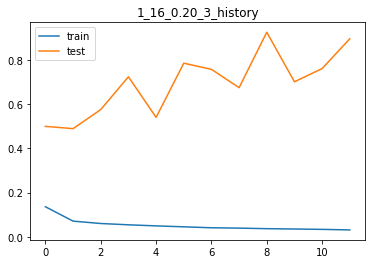

Train loss: 0.033, Val loss: 0.926, Test loss: 0.728
Train S class TP: 0.949, Val S class TP: 0.039, Test S class TP: 0.080,
Train accuracy: 0.990, Test accuracy: 0.861
23911/23911 [==============================] - 2s 73us/step


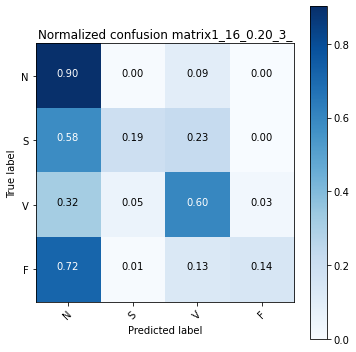

Number of leyers: 1, Number of filters: 16, Dropout rate: 0.2, Kernel size: 6.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 22s 335us/step - loss: 0.1562 - tp_s_class: 0.5681 - categorical_accuracy: 0.9555 - val_loss: 0.7078 - val_tp_s_class: 0.0194 - val_categorical_accuracy: 0.7481

Epoch 00001: val_tp_s_class improved from -inf to 0.01942, saving model to ../../models/1_16_0.20_6_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 21s 318us/step - loss: 0.0674 - tp_s_class: 0.8481 - categorical_accuracy: 0.9804 - val_loss: 0.7839 - val_tp_s_class: 0.0129 - val_categorical_accuracy: 0.7507

Epoch 00002: val_tp_s_class did not improve from 0.01942
Epoch 3/100
66947/66947 [==============================] - 21s 312us/step - loss: 0.0548 - tp_s_class: 0.8844 - categorical_accuracy: 0.9849 - val_loss: 0.9223 - val_tp_s_class: 0.0162 - val_categorical_accuracy: 0.7467

Epoch 00003: val_tp_s_class did not im

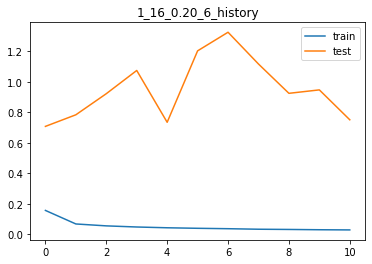

Train loss: 0.027, Val loss: 1.117, Test loss: 0.589
Train S class TP: 0.994, Val S class TP: 0.036, Test S class TP: 0.100,
Train accuracy: 0.993, Test accuracy: 0.852
23911/23911 [==============================] - 2s 90us/step


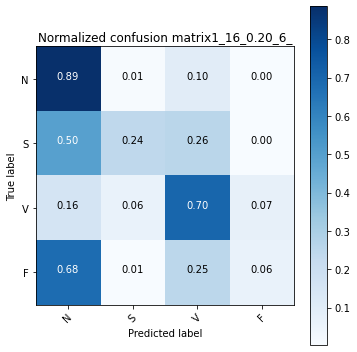

Number of leyers: 1, Number of filters: 16, Dropout rate: 0.35, Kernel size: 3.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 28s 423us/step - loss: 0.1551 - tp_s_class: 0.4491 - categorical_accuracy: 0.9560 - val_loss: 0.4654 - val_tp_s_class: 0.0162 - val_categorical_accuracy: 0.8491

Epoch 00001: val_tp_s_class improved from -inf to 0.01618, saving model to ../../models/1_16_0.35_3_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 27s 400us/step - loss: 0.0743 - tp_s_class: 0.8414 - categorical_accuracy: 0.9784 - val_loss: 0.4570 - val_tp_s_class: 0.0162 - val_categorical_accuracy: 0.8423

Epoch 00002: val_tp_s_class did not improve from 0.01618
Epoch 3/100
66947/66947 [==============================] - 26s 391us/step - loss: 0.0647 - tp_s_class: 0.8653 - categorical_accuracy: 0.9817 - val_loss: 0.6387 - val_tp_s_class: 0.0259 - val_categorical_accuracy: 0.8035

Epoch 00003: val_tp_s_class improved 

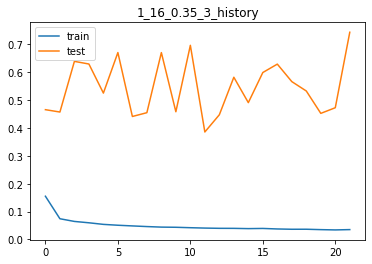

Train loss: 0.034, Val loss: 0.743, Test loss: 0.768
Train S class TP: 1.030, Val S class TP: 0.058, Test S class TP: 0.130,
Train accuracy: 0.990, Test accuracy: 0.830
23911/23911 [==============================] - 2s 80us/step


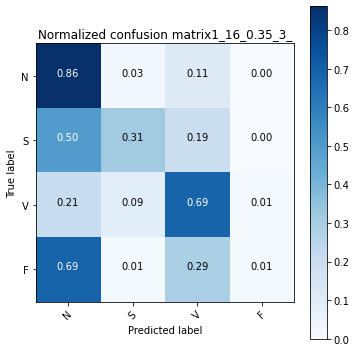

Number of leyers: 1, Number of filters: 16, Dropout rate: 0.35, Kernel size: 6.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 22s 326us/step - loss: 0.1524 - tp_s_class: 0.5776 - categorical_accuracy: 0.9572 - val_loss: 0.6264 - val_tp_s_class: 0.0227 - val_categorical_accuracy: 0.7702

Epoch 00001: val_tp_s_class improved from -inf to 0.02265, saving model to ../../models/1_16_0.35_6_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 21s 316us/step - loss: 0.0697 - tp_s_class: 0.8581 - categorical_accuracy: 0.9802 - val_loss: 0.5928 - val_tp_s_class: 0.0097 - val_categorical_accuracy: 0.7788

Epoch 00002: val_tp_s_class did not improve from 0.02265
Epoch 3/100
66947/66947 [==============================] - 21s 319us/step - loss: 0.0553 - tp_s_class: 0.8906 - categorical_accuracy: 0.9841 - val_loss: 0.7609 - val_tp_s_class: 0.0194 - val_categorical_accuracy: 0.7421

Epoch 00003: val_tp_s_class did not i

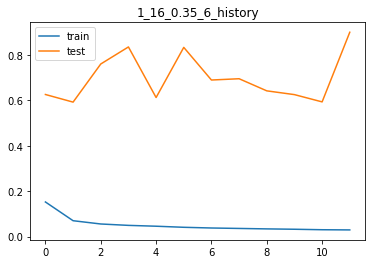

Train loss: 0.039, Val loss: 0.836, Test loss: 0.645
Train S class TP: 0.958, Val S class TP: 0.032, Test S class TP: 0.080,
Train accuracy: 0.989, Test accuracy: 0.835
23911/23911 [==============================] - 2s 80us/step


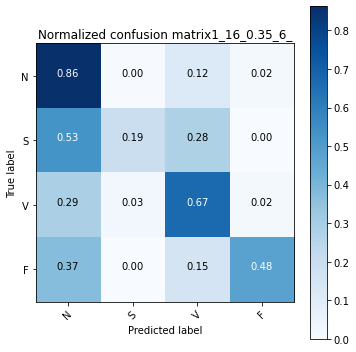

Number of leyers: 1, Number of filters: 16, Dropout rate: 0.5, Kernel size: 3.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 24s 357us/step - loss: 0.1753 - tp_s_class: 0.5007 - categorical_accuracy: 0.9511 - val_loss: 0.5122 - val_tp_s_class: 0.0356 - val_categorical_accuracy: 0.8240

Epoch 00001: val_tp_s_class improved from -inf to 0.03560, saving model to ../../models/1_16_0.50_3_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 23s 350us/step - loss: 0.0797 - tp_s_class: 0.8251 - categorical_accuracy: 0.9777 - val_loss: 0.5634 - val_tp_s_class: 0.0194 - val_categorical_accuracy: 0.8301

Epoch 00002: val_tp_s_class did not improve from 0.03560
Epoch 3/100
66947/66947 [==============================] - 24s 351us/step - loss: 0.0715 - tp_s_class: 0.8485 - categorical_accuracy: 0.9800 - val_loss: 0.5123 - val_tp_s_class: 0.0097 - val_categorical_accuracy: 0.8362

Epoch 00003: val_tp_s_class did not im

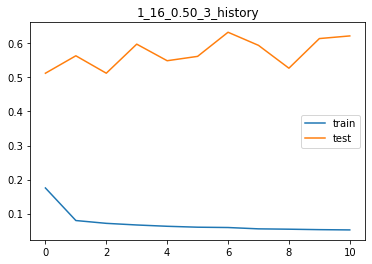

Train loss: 0.044, Val loss: 0.622, Test loss: 0.717
Train S class TP: 0.951, Val S class TP: 0.042, Test S class TP: 0.072,
Train accuracy: 0.989, Test accuracy: 0.822
23911/23911 [==============================] - 2s 76us/step


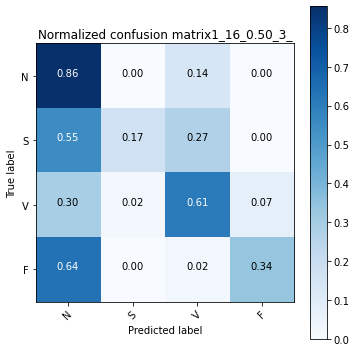

Number of leyers: 1, Number of filters: 16, Dropout rate: 0.5, Kernel size: 6.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 22s 332us/step - loss: 0.1572 - tp_s_class: 0.5619 - categorical_accuracy: 0.9562 - val_loss: 0.4809 - val_tp_s_class: 0.0129 - val_categorical_accuracy: 0.8494

Epoch 00001: val_tp_s_class improved from -inf to 0.01294, saving model to ../../models/1_16_0.50_6_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 23s 340us/step - loss: 0.0809 - tp_s_class: 0.8184 - categorical_accuracy: 0.9762 - val_loss: 0.7326 - val_tp_s_class: 0.0129 - val_categorical_accuracy: 0.7495

Epoch 00002: val_tp_s_class did not improve from 0.01294
Epoch 3/100
66947/66947 [==============================] - 23s 338us/step - loss: 0.0700 - tp_s_class: 0.8414 - categorical_accuracy: 0.9790 - val_loss: 0.6327 - val_tp_s_class: 0.0129 - val_categorical_accuracy: 0.7943

Epoch 00003: val_tp_s_class did not im

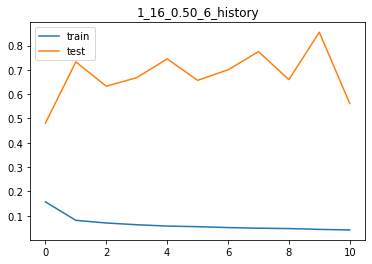

Train loss: 0.040, Val loss: 0.660, Test loss: 0.966
Train S class TP: 0.938, Val S class TP: 0.036, Test S class TP: 0.080,
Train accuracy: 0.989, Test accuracy: 0.839
23911/23911 [==============================] - 2s 77us/step


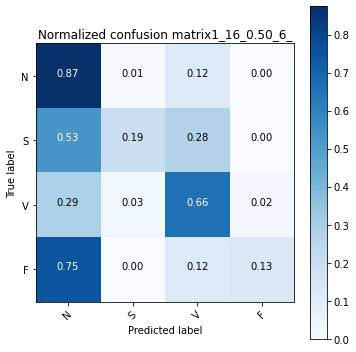

Number of leyers: 1, Number of filters: 32, Dropout rate: 0.2, Kernel size: 3.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 37s 560us/step - loss: 0.1199 - tp_s_class: 0.6904 - categorical_accuracy: 0.9665 - val_loss: 0.5110 - val_tp_s_class: 0.0291 - val_categorical_accuracy: 0.8233

Epoch 00001: val_tp_s_class improved from -inf to 0.02913, saving model to ../../models/1_32_0.20_3_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 37s 560us/step - loss: 0.0686 - tp_s_class: 0.8552 - categorical_accuracy: 0.9806 - val_loss: 0.6180 - val_tp_s_class: 0.0227 - val_categorical_accuracy: 0.7974

Epoch 00002: val_tp_s_class did not improve from 0.02913
Epoch 3/100
66947/66947 [==============================] - 37s 548us/step - loss: 0.0588 - tp_s_class: 0.8810 - categorical_accuracy: 0.9834 - val_loss: 0.4782 - val_tp_s_class: 0.0097 - val_categorical_accuracy: 0.8472

Epoch 00003: val_tp_s_class did not im

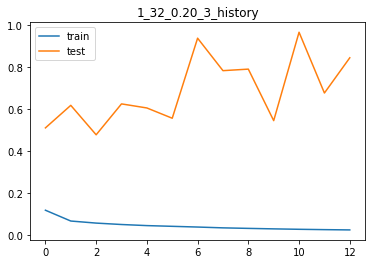

Train loss: 0.042, Val loss: 0.937, Test loss: 0.703
Train S class TP: 1.018, Val S class TP: 0.055, Test S class TP: 0.108,
Train accuracy: 0.987, Test accuracy: 0.822
23911/23911 [==============================] - 2s 93us/step


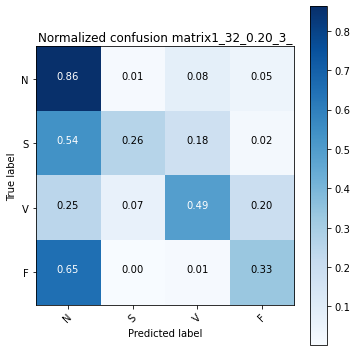

Number of leyers: 1, Number of filters: 32, Dropout rate: 0.2, Kernel size: 6.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 51s 757us/step - loss: 0.1261 - tp_s_class: 0.6675 - categorical_accuracy: 0.9645 - val_loss: 0.7279 - val_tp_s_class: 0.0291 - val_categorical_accuracy: 0.7522

Epoch 00001: val_tp_s_class improved from -inf to 0.02913, saving model to ../../models/1_32_0.20_6_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 49s 731us/step - loss: 0.0592 - tp_s_class: 0.8796 - categorical_accuracy: 0.9829 - val_loss: 0.8703 - val_tp_s_class: 0.0194 - val_categorical_accuracy: 0.7345

Epoch 00002: val_tp_s_class did not improve from 0.02913
Epoch 3/100
66947/66947 [==============================] - 49s 728us/step - loss: 0.0483 - tp_s_class: 0.9169 - categorical_accuracy: 0.9862 - val_loss: 0.9724 - val_tp_s_class: 0.0194 - val_categorical_accuracy: 0.7260

Epoch 00003: val_tp_s_class did not im

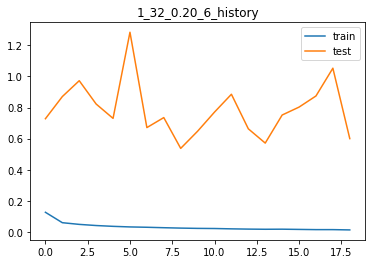

Train loss: 0.012, Val loss: 1.053, Test loss: 0.758
Train S class TP: 1.084, Val S class TP: 0.120, Test S class TP: 0.096,
Train accuracy: 0.997, Test accuracy: 0.819
23911/23911 [==============================] - 2s 103us/step


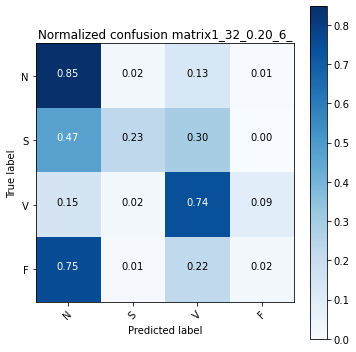

Number of leyers: 1, Number of filters: 32, Dropout rate: 0.35, Kernel size: 3.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 38s 560us/step - loss: 0.1220 - tp_s_class: 0.6527 - categorical_accuracy: 0.9653 - val_loss: 0.4415 - val_tp_s_class: 0.0097 - val_categorical_accuracy: 0.8549

Epoch 00001: val_tp_s_class improved from -inf to 0.00971, saving model to ../../models/1_32_0.35_3_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 37s 560us/step - loss: 0.0705 - tp_s_class: 0.8490 - categorical_accuracy: 0.9798 - val_loss: 0.6320 - val_tp_s_class: 0.0324 - val_categorical_accuracy: 0.8105

Epoch 00002: val_tp_s_class improved from 0.00971 to 0.03236, saving model to ../../models/1_32_0.35_3_best_model.h5
Epoch 3/100
66947/66947 [==============================] - 36s 539us/step - loss: 0.0624 - tp_s_class: 0.8753 - categorical_accuracy: 0.9821 - val_loss: 0.4338 - val_tp_s_class: 0.0129 - val_categor

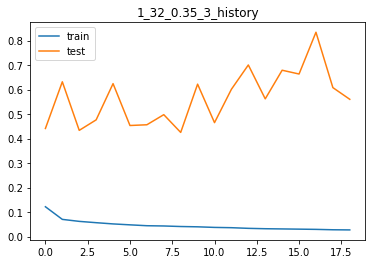

Train loss: 0.032, Val loss: 0.622, Test loss: 1.126
Train S class TP: 0.979, Val S class TP: 0.058, Test S class TP: 0.078,
Train accuracy: 0.991, Test accuracy: 0.822
23911/23911 [==============================] - 2s 88us/step


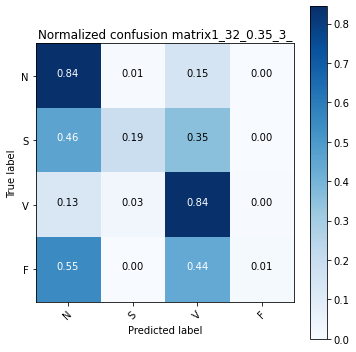

Number of leyers: 1, Number of filters: 32, Dropout rate: 0.35, Kernel size: 6.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 54s 809us/step - loss: 0.1301 - tp_s_class: 0.6135 - categorical_accuracy: 0.9625 - val_loss: 0.6644 - val_tp_s_class: 0.0162 - val_categorical_accuracy: 0.7736

Epoch 00001: val_tp_s_class improved from -inf to 0.01618, saving model to ../../models/1_32_0.35_6_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 49s 730us/step - loss: 0.0627 - tp_s_class: 0.8677 - categorical_accuracy: 0.9819 - val_loss: 0.9282 - val_tp_s_class: 0.0227 - val_categorical_accuracy: 0.7129

Epoch 00002: val_tp_s_class improved from 0.01618 to 0.02265, saving model to ../../models/1_32_0.35_6_best_model.h5
Epoch 3/100
66947/66947 [==============================] - 52s 770us/step - loss: 0.0512 - tp_s_class: 0.9059 - categorical_accuracy: 0.9857 - val_loss: 0.9762 - val_tp_s_class: 0.0227 - val_categor


Epoch 00028: val_tp_s_class did not improve from 0.10680
Epoch 29/100
66947/66947 [==============================] - 53s 785us/step - loss: 0.0134 - tp_s_class: 1.0559 - categorical_accuracy: 0.9958 - val_loss: 0.6566 - val_tp_s_class: 0.0583 - val_categorical_accuracy: 0.8166

Epoch 00029: val_tp_s_class did not improve from 0.10680
Epoch 00029: early stopping


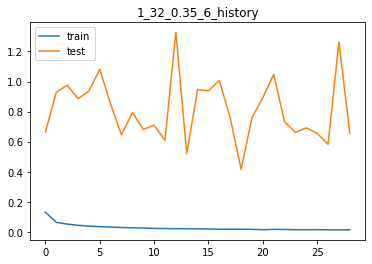

Train loss: 0.013, Val loss: 1.048, Test loss: 1.194
Train S class TP: 1.072, Val S class TP: 0.107, Test S class TP: 0.110,
Train accuracy: 0.996, Test accuracy: 0.835
23911/23911 [==============================] - 3s 117us/step


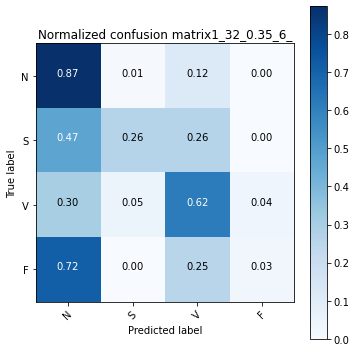

Number of leyers: 1, Number of filters: 32, Dropout rate: 0.5, Kernel size: 3.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 40s 594us/step - loss: 0.1238 - tp_s_class: 0.6660 - categorical_accuracy: 0.9650 - val_loss: 0.4762 - val_tp_s_class: 0.0162 - val_categorical_accuracy: 0.8450

Epoch 00001: val_tp_s_class improved from -inf to 0.01618, saving model to ../../models/1_32_0.50_3_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 39s 580us/step - loss: 0.0677 - tp_s_class: 0.8481 - categorical_accuracy: 0.9809 - val_loss: 0.5119 - val_tp_s_class: 0.0129 - val_categorical_accuracy: 0.8293

Epoch 00002: val_tp_s_class did not improve from 0.01618
Epoch 3/100
66947/66947 [==============================] - 38s 571us/step - loss: 0.0591 - tp_s_class: 0.8705 - categorical_accuracy: 0.9834 - val_loss: 0.6333 - val_tp_s_class: 0.0162 - val_categorical_accuracy: 0.7987

Epoch 00003: val_tp_s_class did not im

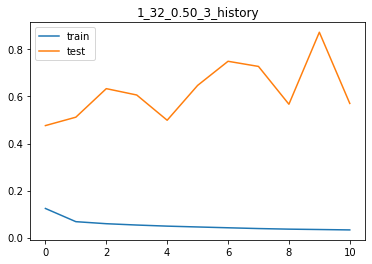

Train loss: 0.028, Val loss: 0.873, Test loss: 0.730
Train S class TP: 1.026, Val S class TP: 0.055, Test S class TP: 0.132,
Train accuracy: 0.992, Test accuracy: 0.819
23911/23911 [==============================] - 2s 100us/step


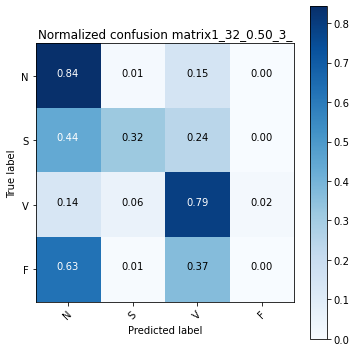

Number of leyers: 1, Number of filters: 32, Dropout rate: 0.5, Kernel size: 6.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 52s 771us/step - loss: 0.1257 - tp_s_class: 0.6235 - categorical_accuracy: 0.9641 - val_loss: 0.7303 - val_tp_s_class: 0.0162 - val_categorical_accuracy: 0.7175

Epoch 00001: val_tp_s_class improved from -inf to 0.01618, saving model to ../../models/1_32_0.50_6_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 52s 779us/step - loss: 0.0634 - tp_s_class: 0.8705 - categorical_accuracy: 0.9821 - val_loss: 0.7943 - val_tp_s_class: 0.0162 - val_categorical_accuracy: 0.7306

Epoch 00002: val_tp_s_class did not improve from 0.01618
Epoch 3/100
66947/66947 [==============================] - 52s 777us/step - loss: 0.0523 - tp_s_class: 0.9130 - categorical_accuracy: 0.9858 - val_loss: 0.7614 - val_tp_s_class: 0.0194 - val_categorical_accuracy: 0.7243

Epoch 00003: val_tp_s_class improved f

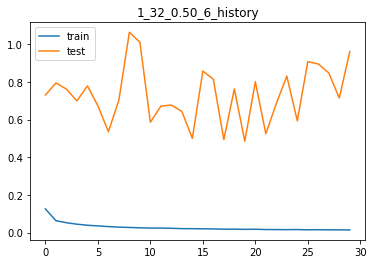

Train loss: 0.013, Val loss: 0.847, Test loss: 0.920
Train S class TP: 1.093, Val S class TP: 0.107, Test S class TP: 0.148,
Train accuracy: 0.996, Test accuracy: 0.837
23911/23911 [==============================] - 2s 102us/step


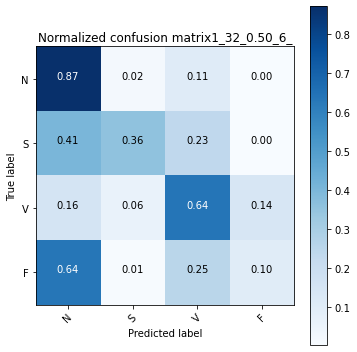

Number of leyers: 1, Number of filters: 48, Dropout rate: 0.2, Kernel size: 3.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 54s 812us/step - loss: 0.1073 - tp_s_class: 0.7401 - categorical_accuracy: 0.9692 - val_loss: 0.5743 - val_tp_s_class: 0.0259 - val_categorical_accuracy: 0.8329

Epoch 00001: val_tp_s_class improved from -inf to 0.02589, saving model to ../../models/1_48_0.20_3_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 54s 810us/step - loss: 0.0625 - tp_s_class: 0.8729 - categorical_accuracy: 0.9822 - val_loss: 0.6758 - val_tp_s_class: 0.0227 - val_categorical_accuracy: 0.7878

Epoch 00002: val_tp_s_class did not improve from 0.02589
Epoch 3/100
66947/66947 [==============================] - 54s 802us/step - loss: 0.0529 - tp_s_class: 0.8920 - categorical_accuracy: 0.9847 - val_loss: 0.5312 - val_tp_s_class: 0.0162 - val_categorical_accuracy: 0.8276

Epoch 00003: val_tp_s_class did not im

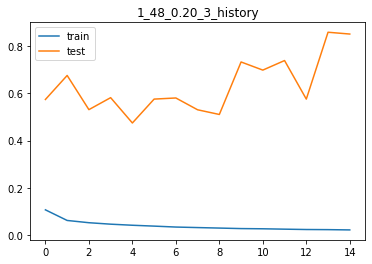

Train loss: 0.043, Val loss: 0.582, Test loss: 0.612
Train S class TP: 0.921, Val S class TP: 0.049, Test S class TP: 0.078,
Train accuracy: 0.987, Test accuracy: 0.858
23911/23911 [==============================] - 3s 133us/step


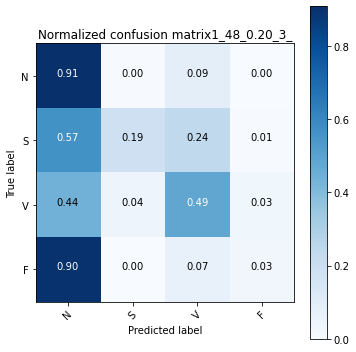

Number of leyers: 1, Number of filters: 48, Dropout rate: 0.2, Kernel size: 6.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 68s 1ms/step - loss: 0.1165 - tp_s_class: 0.6909 - categorical_accuracy: 0.9671 - val_loss: 0.6483 - val_tp_s_class: 0.0162 - val_categorical_accuracy: 0.7758

Epoch 00001: val_tp_s_class improved from -inf to 0.01618, saving model to ../../models/1_48_0.20_6_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 67s 1ms/step - loss: 0.0546 - tp_s_class: 0.8987 - categorical_accuracy: 0.9849 - val_loss: 0.6712 - val_tp_s_class: 0.0129 - val_categorical_accuracy: 0.7807

Epoch 00002: val_tp_s_class did not improve from 0.01618
Epoch 3/100
66947/66947 [==============================] - 66s 985us/step - loss: 0.0419 - tp_s_class: 0.9307 - categorical_accuracy: 0.9882 - val_loss: 0.6874 - val_tp_s_class: 0.0227 - val_categorical_accuracy: 0.8050

Epoch 00003: val_tp_s_class improved from 

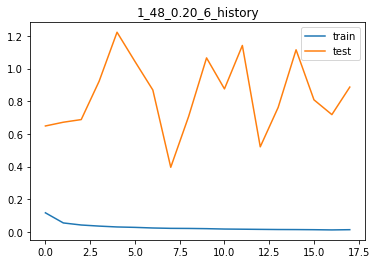

Train loss: 0.012, Val loss: 0.521, Test loss: 0.442
Train S class TP: 1.063, Val S class TP: 0.104, Test S class TP: 0.115,
Train accuracy: 0.996, Test accuracy: 0.886
23911/23911 [==============================] - 4s 169us/step


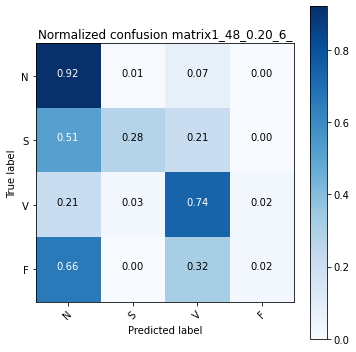

Number of leyers: 1, Number of filters: 48, Dropout rate: 0.35, Kernel size: 3.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 56s 839us/step - loss: 0.1103 - tp_s_class: 0.7167 - categorical_accuracy: 0.9685 - val_loss: 0.5865 - val_tp_s_class: 0.0162 - val_categorical_accuracy: 0.8095

Epoch 00001: val_tp_s_class improved from -inf to 0.01618, saving model to ../../models/1_48_0.35_3_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 54s 800us/step - loss: 0.0657 - tp_s_class: 0.8696 - categorical_accuracy: 0.9812 - val_loss: 0.5923 - val_tp_s_class: 0.0291 - val_categorical_accuracy: 0.8175

Epoch 00002: val_tp_s_class improved from 0.01618 to 0.02913, saving model to ../../models/1_48_0.35_3_best_model.h5
Epoch 3/100
66947/66947 [==============================] - 55s 823us/step - loss: 0.0562 - tp_s_class: 0.9001 - categorical_accuracy: 0.9847 - val_loss: 0.5410 - val_tp_s_class: 0.0227 - val_categor

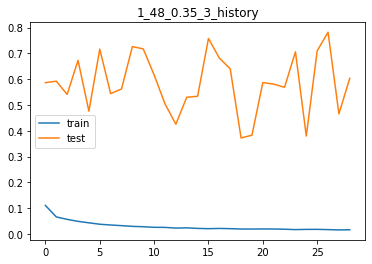

Train loss: 0.027, Val loss: 0.425, Test loss: 0.804
Train S class TP: 1.062, Val S class TP: 0.065, Test S class TP: 0.131,
Train accuracy: 0.993, Test accuracy: 0.842
23911/23911 [==============================] - 3s 119us/step


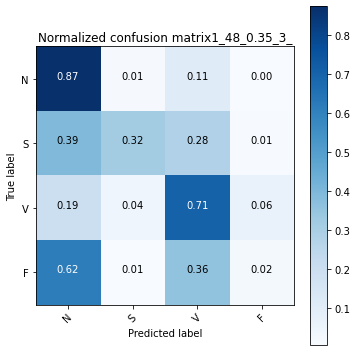

Number of leyers: 1, Number of filters: 48, Dropout rate: 0.35, Kernel size: 6.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 67s 998us/step - loss: 0.1137 - tp_s_class: 0.6933 - categorical_accuracy: 0.9674 - val_loss: 0.5703 - val_tp_s_class: 0.0162 - val_categorical_accuracy: 0.7924

Epoch 00001: val_tp_s_class improved from -inf to 0.01618, saving model to ../../models/1_48_0.35_6_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 68s 1ms/step - loss: 0.0562 - tp_s_class: 0.9025 - categorical_accuracy: 0.9846 - val_loss: 0.5754 - val_tp_s_class: 0.0227 - val_categorical_accuracy: 0.7989

Epoch 00002: val_tp_s_class improved from 0.01618 to 0.02265, saving model to ../../models/1_48_0.35_6_best_model.h5
Epoch 3/100
66947/66947 [==============================] - 67s 995us/step - loss: 0.0454 - tp_s_class: 0.9216 - categorical_accuracy: 0.9873 - val_loss: 0.5604 - val_tp_s_class: 0.0227 - val_categoric

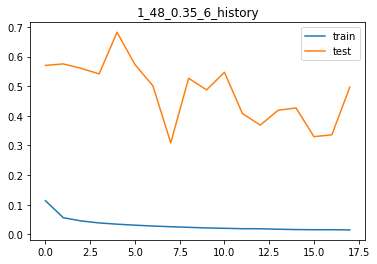

Train loss: 0.014, Val loss: 0.497, Test loss: 0.910
Train S class TP: 1.083, Val S class TP: 0.104, Test S class TP: 0.123,
Train accuracy: 0.996, Test accuracy: 0.815
23911/23911 [==============================] - 4s 166us/step


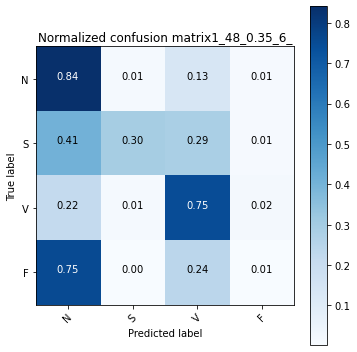

Number of leyers: 1, Number of filters: 48, Dropout rate: 0.5, Kernel size: 3.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 56s 829us/step - loss: 0.1168 - tp_s_class: 0.6875 - categorical_accuracy: 0.9659 - val_loss: 0.5600 - val_tp_s_class: 0.0162 - val_categorical_accuracy: 0.8007

Epoch 00001: val_tp_s_class improved from -inf to 0.01618, saving model to ../../models/1_48_0.50_3_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 55s 814us/step - loss: 0.0682 - tp_s_class: 0.8485 - categorical_accuracy: 0.9807 - val_loss: 0.5519 - val_tp_s_class: 0.0162 - val_categorical_accuracy: 0.8156

Epoch 00002: val_tp_s_class did not improve from 0.01618
Epoch 3/100
66947/66947 [==============================] - 56s 830us/step - loss: 0.0595 - tp_s_class: 0.8710 - categorical_accuracy: 0.9827 - val_loss: 0.6239 - val_tp_s_class: 0.0097 - val_categorical_accuracy: 0.8140

Epoch 00003: val_tp_s_class did not im

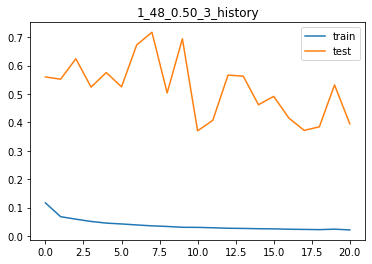

Train loss: 0.028, Val loss: 0.563, Test loss: 0.698
Train S class TP: 1.048, Val S class TP: 0.052, Test S class TP: 0.127,
Train accuracy: 0.992, Test accuracy: 0.853
23911/23911 [==============================] - 3s 120us/step


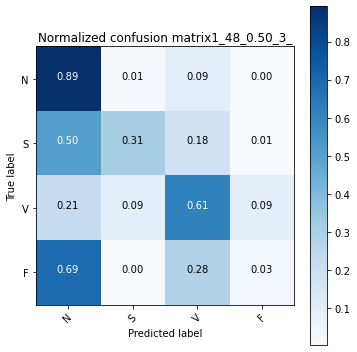

Number of leyers: 1, Number of filters: 48, Dropout rate: 0.5, Kernel size: 6.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 69s 1ms/step - loss: 0.1162 - tp_s_class: 0.6947 - categorical_accuracy: 0.9665 - val_loss: 0.6476 - val_tp_s_class: 0.0162 - val_categorical_accuracy: 0.7745

Epoch 00001: val_tp_s_class improved from -inf to 0.01618, saving model to ../../models/1_48_0.50_6_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 69s 1ms/step - loss: 0.0561 - tp_s_class: 0.8901 - categorical_accuracy: 0.9840 - val_loss: 0.6363 - val_tp_s_class: 0.0162 - val_categorical_accuracy: 0.7617

Epoch 00002: val_tp_s_class did not improve from 0.01618
Epoch 3/100
66947/66947 [==============================] - 68s 1ms/step - loss: 0.0460 - tp_s_class: 0.9197 - categorical_accuracy: 0.9872 - val_loss: 0.9715 - val_tp_s_class: 0.0227 - val_categorical_accuracy: 0.7445

Epoch 00003: val_tp_s_class improved from 0.

66947/66947 [==============================] - 66s 992us/step - loss: 0.0128 - tp_s_class: 1.0535 - categorical_accuracy: 0.9958 - val_loss: 0.7712 - val_tp_s_class: 0.0453 - val_categorical_accuracy: 0.7951

Epoch 00029: val_tp_s_class did not improve from 0.12945
Epoch 30/100
66947/66947 [==============================] - 67s 999us/step - loss: 0.0116 - tp_s_class: 1.0578 - categorical_accuracy: 0.9961 - val_loss: 0.5363 - val_tp_s_class: 0.0518 - val_categorical_accuracy: 0.8583

Epoch 00030: val_tp_s_class did not improve from 0.12945
Epoch 31/100
66947/66947 [==============================] - 66s 988us/step - loss: 0.0120 - tp_s_class: 1.0602 - categorical_accuracy: 0.9959 - val_loss: 0.3799 - val_tp_s_class: 0.0356 - val_categorical_accuracy: 0.9078

Epoch 00031: val_tp_s_class did not improve from 0.12945
Epoch 32/100
66947/66947 [==============================] - 66s 986us/step - loss: 0.0113 - tp_s_class: 1.0602 - categorical_accuracy: 0.9965 - val_loss: 0.9927 - val_tp_s_clas

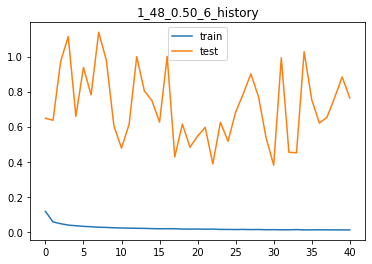

Train loss: 0.016, Val loss: 1.001, Test loss: 1.067
Train S class TP: 1.085, Val S class TP: 0.129, Test S class TP: 0.143,
Train accuracy: 0.995, Test accuracy: 0.830
23911/23911 [==============================] - 4s 165us/step


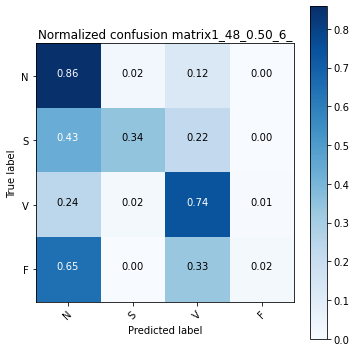

In [23]:
# monitoring S class true positives

filters = [16, 32, 48]
dropout_rates = [0.2, 0.35, 0.5]
layers = [1]
kernel_size = [3, 6]
for l in layers:
    for n in filters:
        for d in dropout_rates:
            for k in kernel_size:
                print("Number of leyers: {}, Number of filters: {}, Dropout rate: {}, Kernel size: {}.".format(l, n, d, k))
                sff.full_process(train_df, val_df, test_df, l, n, d, k, 'cnn', with_standard=False)

Number of leyers: 2, Number of filters: 16, Dropout rate: 0.25, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 18s 262us/step - loss: 0.2101 - f1_metric: 0.9282 - categorical_accuracy: 0.9382 - val_loss: 0.5053 - val_f1_metric: 0.7903 - val_categorical_accuracy: 0.7949

Epoch 00001: val_f1_metric improved from -inf to 0.79031, saving model to ../../models/2_16_0.25_5_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 18s 267us/step - loss: 0.1011 - f1_metric: 0.9688 - categorical_accuracy: 0.9690 - val_loss: 0.5115 - val_f1_metric: 0.7731 - val_categorical_accuracy: 0.7763

Epoch 00002: val_f1_metric did not improve from 0.79031
Epoch 3/100
66947/66947 [==============================] - 19s 278us/step - loss: 0.0864 - f1_metric: 0.9741 - categorical_accuracy: 0.9739 - val_loss: 0.5665 - val_f1_metric: 0.7075 - val_categorical_accuracy: 0.7105

Epoch 00003: val_f1_metric did not improve fr

66947/66947 [==============================] - 19s 284us/step - loss: 0.0403 - f1_metric: 0.9879 - categorical_accuracy: 0.9878 - val_loss: 0.4170 - val_f1_metric: 0.8217 - val_categorical_accuracy: 0.8216

Epoch 00029: val_f1_metric did not improve from 0.88164
Epoch 30/100
66947/66947 [==============================] - 18s 272us/step - loss: 0.0393 - f1_metric: 0.9885 - categorical_accuracy: 0.9884 - val_loss: 0.3717 - val_f1_metric: 0.8461 - val_categorical_accuracy: 0.8466

Epoch 00030: val_f1_metric did not improve from 0.88164
Epoch 31/100
66947/66947 [==============================] - 19s 283us/step - loss: 0.0401 - f1_metric: 0.9876 - categorical_accuracy: 0.9877 - val_loss: 0.4305 - val_f1_metric: 0.8208 - val_categorical_accuracy: 0.8209

Epoch 00031: val_f1_metric did not improve from 0.88164
Epoch 32/100
66947/66947 [==============================] - 20s 301us/step - loss: 0.0393 - f1_metric: 0.9886 - categorical_accuracy: 0.9886 - val_loss: 0.4157 - val_f1_metric: 0.8200 -

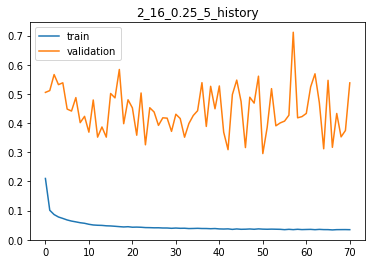

Train loss: 0.035, Val loss: 0.296, Test loss: 0.303
Train F1 metric: 0.989, Val F1 metric: 0.929, Test F1 metric: 0.903,
Train accuracy: 0.989, Val accuracy: 0.929, Test accuracy: 0.903
23911/23911 [==============================] - 1s 62us/step


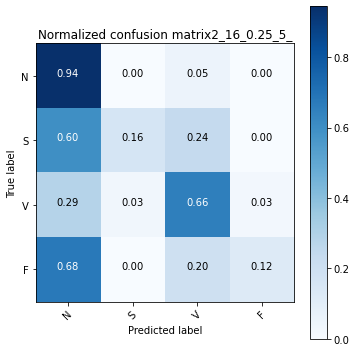

Number of leyers: 2, Number of filters: 16, Dropout rate: 0.5, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 18s 263us/step - loss: 0.2308 - f1_metric: 0.9266 - categorical_accuracy: 0.9318 - val_loss: 0.4819 - val_f1_metric: 0.7931 - val_categorical_accuracy: 0.8425

Epoch 00001: val_f1_metric improved from -inf to 0.79311, saving model to ../../models/2_16_0.50_5_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 19s 286us/step - loss: 0.1371 - f1_metric: 0.9541 - categorical_accuracy: 0.9540 - val_loss: 0.4655 - val_f1_metric: 0.7481 - val_categorical_accuracy: 0.7681

Epoch 00002: val_f1_metric did not improve from 0.79311
Epoch 3/100
66947/66947 [==============================] - 20s 296us/step - loss: 0.1182 - f1_metric: 0.9619 - categorical_accuracy: 0.9621 - val_loss: 0.4965 - val_f1_metric: 0.6840 - val_categorical_accuracy: 0.7096

Epoch 00003: val_f1_metric did not improve fro


Epoch 00028: val_f1_metric did not improve from 0.91704
Epoch 29/100
66947/66947 [==============================] - 16s 239us/step - loss: 0.0695 - f1_metric: 0.9788 - categorical_accuracy: 0.9788 - val_loss: 0.3970 - val_f1_metric: 0.8254 - val_categorical_accuracy: 0.8241

Epoch 00029: val_f1_metric did not improve from 0.91704
Epoch 30/100
66947/66947 [==============================] - 17s 247us/step - loss: 0.0671 - f1_metric: 0.9796 - categorical_accuracy: 0.9796 - val_loss: 0.4076 - val_f1_metric: 0.8353 - val_categorical_accuracy: 0.8346

Epoch 00030: val_f1_metric did not improve from 0.91704
Epoch 31/100
66947/66947 [==============================] - 16s 240us/step - loss: 0.0675 - f1_metric: 0.9792 - categorical_accuracy: 0.9791 - val_loss: 0.4274 - val_f1_metric: 0.7909 - val_categorical_accuracy: 0.7896

Epoch 00031: val_f1_metric did not improve from 0.91704
Epoch 32/100
66947/66947 [==============================] - 16s 240us/step - loss: 0.0680 - f1_metric: 0.9792 - cat

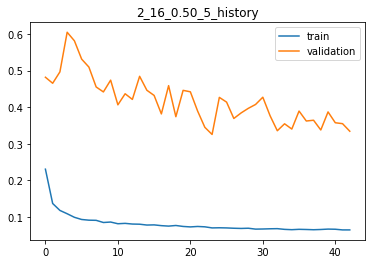

Train loss: 0.108, Val loss: 0.345, Test loss: 0.247
Train F1 metric: 0.955, Val F1 metric: 0.917, Test F1 metric: 0.933,
Train accuracy: 0.955, Val accuracy: 0.916, Test accuracy: 0.932
23911/23911 [==============================] - 1s 60us/step


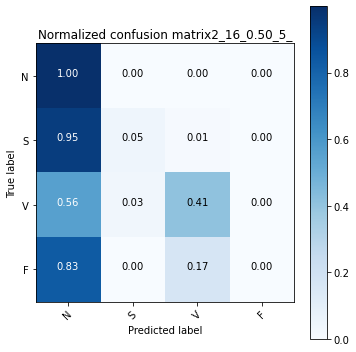

Number of leyers: 2, Number of filters: 32, Dropout rate: 0.25, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 25s 376us/step - loss: 0.1666 - f1_metric: 0.9463 - categorical_accuracy: 0.9506 - val_loss: 0.5437 - val_f1_metric: 0.7120 - val_categorical_accuracy: 0.7196

Epoch 00001: val_f1_metric improved from -inf to 0.71200, saving model to ../../models/2_32_0.25_5_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 25s 370us/step - loss: 0.0819 - f1_metric: 0.9753 - categorical_accuracy: 0.9754 - val_loss: 0.5457 - val_f1_metric: 0.7452 - val_categorical_accuracy: 0.7468

Epoch 00002: val_f1_metric improved from 0.71200 to 0.74524, saving model to ../../models/2_32_0.25_5_best_model.h5
Epoch 3/100
66947/66947 [==============================] - 25s 372us/step - loss: 0.0686 - f1_metric: 0.9797 - categorical_accuracy: 0.9796 - val_loss: 0.7702 - val_f1_metric: 0.6836 - val_categorical_acc

66947/66947 [==============================] - 25s 369us/step - loss: 0.0254 - f1_metric: 0.9925 - categorical_accuracy: 0.9924 - val_loss: 0.6538 - val_f1_metric: 0.7573 - val_categorical_accuracy: 0.7617

Epoch 00057: val_f1_metric did not improve from 0.96373
Epoch 58/100
66947/66947 [==============================] - 25s 369us/step - loss: 0.0263 - f1_metric: 0.9924 - categorical_accuracy: 0.9924 - val_loss: 0.3173 - val_f1_metric: 0.8710 - val_categorical_accuracy: 0.8724

Epoch 00058: val_f1_metric did not improve from 0.96373
Epoch 59/100
66947/66947 [==============================] - 29s 428us/step - loss: 0.0257 - f1_metric: 0.9923 - categorical_accuracy: 0.9922 - val_loss: 0.3707 - val_f1_metric: 0.8515 - val_categorical_accuracy: 0.8545

Epoch 00059: val_f1_metric did not improve from 0.96373
Epoch 00059: early stopping


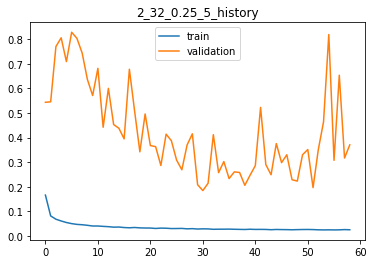

Train loss: 0.022, Val loss: 0.206, Test loss: 0.475
Train F1 metric: 0.993, Val F1 metric: 0.964, Test F1 metric: 0.876,
Train accuracy: 0.993, Val accuracy: 0.963, Test accuracy: 0.876
23911/23911 [==============================] - 2s 79us/step


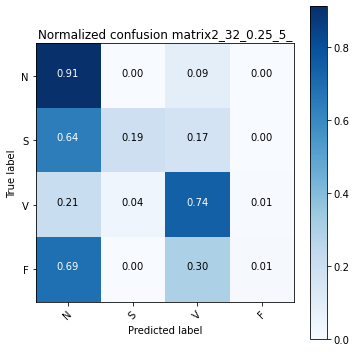

Number of leyers: 2, Number of filters: 32, Dropout rate: 0.5, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 32s 484us/step - loss: 0.1817 - f1_metric: 0.9413 - categorical_accuracy: 0.9443 - val_loss: 0.5704 - val_f1_metric: 0.6731 - val_categorical_accuracy: 0.7198

Epoch 00001: val_f1_metric improved from -inf to 0.67308, saving model to ../../models/2_32_0.50_5_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 28s 412us/step - loss: 0.1048 - f1_metric: 0.9666 - categorical_accuracy: 0.9668 - val_loss: 0.6003 - val_f1_metric: 0.6538 - val_categorical_accuracy: 0.6734

Epoch 00002: val_f1_metric did not improve from 0.67308
Epoch 3/100
66947/66947 [==============================] - 47s 700us/step - loss: 0.0913 - f1_metric: 0.9711 - categorical_accuracy: 0.9711 - val_loss: 0.5978 - val_f1_metric: 0.6580 - val_categorical_accuracy: 0.6692

Epoch 00003: val_f1_metric did not improve fro

66947/66947 [==============================] - 27s 403us/step - loss: 0.0544 - f1_metric: 0.9843 - categorical_accuracy: 0.9843 - val_loss: 0.3337 - val_f1_metric: 0.9126 - val_categorical_accuracy: 0.9122

Epoch 00028: val_f1_metric did not improve from 0.92911
Epoch 29/100
66947/66947 [==============================] - 31s 459us/step - loss: 0.0550 - f1_metric: 0.9838 - categorical_accuracy: 0.9838 - val_loss: 0.3268 - val_f1_metric: 0.9189 - val_categorical_accuracy: 0.9176

Epoch 00029: val_f1_metric did not improve from 0.92911
Epoch 30/100
66947/66947 [==============================] - 28s 412us/step - loss: 0.0531 - f1_metric: 0.9840 - categorical_accuracy: 0.9840 - val_loss: 0.3699 - val_f1_metric: 0.8886 - val_categorical_accuracy: 0.8885

Epoch 00030: val_f1_metric did not improve from 0.92911
Epoch 31/100
66947/66947 [==============================] - 26s 386us/step - loss: 0.0522 - f1_metric: 0.9846 - categorical_accuracy: 0.9846 - val_loss: 0.3563 - val_f1_metric: 0.8791 -

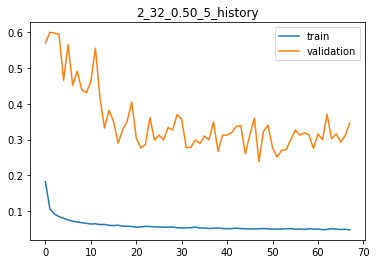

Train loss: 0.073, Val loss: 0.238, Test loss: 0.217
Train F1 metric: 0.976, Val F1 metric: 0.933, Test F1 metric: 0.940,
Train accuracy: 0.976, Val accuracy: 0.931, Test accuracy: 0.939
23911/23911 [==============================] - 2s 66us/step


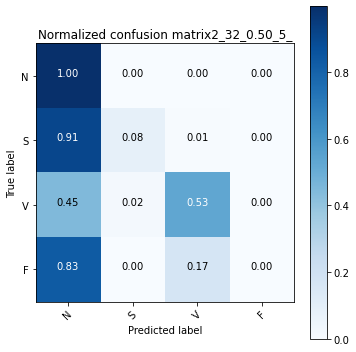

Number of leyers: 2, Number of filters: 48, Dropout rate: 0.25, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 48s 718us/step - loss: 0.1446 - f1_metric: 0.9522 - categorical_accuracy: 0.9562 - val_loss: 0.6749 - val_f1_metric: 0.6939 - val_categorical_accuracy: 0.6974

Epoch 00001: val_f1_metric improved from -inf to 0.69394, saving model to ../../models/2_48_0.25_5_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 43s 638us/step - loss: 0.0729 - f1_metric: 0.9789 - categorical_accuracy: 0.9789 - val_loss: 0.6062 - val_f1_metric: 0.7211 - val_categorical_accuracy: 0.7288

Epoch 00002: val_f1_metric improved from 0.69394 to 0.72112, saving model to ../../models/2_48_0.25_5_best_model.h5
Epoch 3/100
66947/66947 [==============================] - 44s 658us/step - loss: 0.0593 - f1_metric: 0.9833 - categorical_accuracy: 0.9832 - val_loss: 0.6929 - val_f1_metric: 0.6860 - val_categorical_acc

66947/66947 [==============================] - 39s 578us/step - loss: 0.0176 - f1_metric: 0.9944 - categorical_accuracy: 0.9943 - val_loss: 0.3726 - val_f1_metric: 0.8813 - val_categorical_accuracy: 0.8819

Epoch 00058: val_f1_metric did not improve from 0.92780
Epoch 59/100
66947/66947 [==============================] - 39s 579us/step - loss: 0.0188 - f1_metric: 0.9941 - categorical_accuracy: 0.9941 - val_loss: 0.5099 - val_f1_metric: 0.8213 - val_categorical_accuracy: 0.8218

Epoch 00059: val_f1_metric did not improve from 0.92780
Epoch 60/100
66947/66947 [==============================] - 40s 600us/step - loss: 0.0174 - f1_metric: 0.9944 - categorical_accuracy: 0.9943 - val_loss: 0.4484 - val_f1_metric: 0.8466 - val_categorical_accuracy: 0.8497

Epoch 00060: val_f1_metric did not improve from 0.92780
Epoch 61/100
66947/66947 [==============================] - 38s 566us/step - loss: 0.0178 - f1_metric: 0.9944 - categorical_accuracy: 0.9944 - val_loss: 0.3794 - val_f1_metric: 0.8972 -

66947/66947 [==============================] - 35s 516us/step - loss: 0.0154 - f1_metric: 0.9952 - categorical_accuracy: 0.9952 - val_loss: 0.2832 - val_f1_metric: 0.9448 - val_categorical_accuracy: 0.9460

Epoch 00087: val_f1_metric did not improve from 0.96227
Epoch 88/100
66947/66947 [==============================] - 35s 523us/step - loss: 0.0160 - f1_metric: 0.9950 - categorical_accuracy: 0.9950 - val_loss: 0.2081 - val_f1_metric: 0.9570 - val_categorical_accuracy: 0.9567

Epoch 00088: val_f1_metric did not improve from 0.96227
Epoch 89/100
66947/66947 [==============================] - 32s 478us/step - loss: 0.0171 - f1_metric: 0.9946 - categorical_accuracy: 0.9946 - val_loss: 0.4324 - val_f1_metric: 0.8505 - val_categorical_accuracy: 0.8522

Epoch 00089: val_f1_metric did not improve from 0.96227
Epoch 90/100
66947/66947 [==============================] - 33s 495us/step - loss: 0.0170 - f1_metric: 0.9946 - categorical_accuracy: 0.9946 - val_loss: 0.3056 - val_f1_metric: 0.9284 -

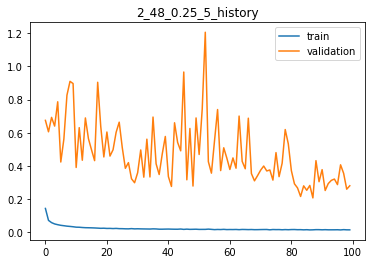

Train loss: 0.013, Val loss: 0.217, Test loss: 0.553
Train F1 metric: 0.996, Val F1 metric: 0.962, Test F1 metric: 0.864,
Train accuracy: 0.996, Val accuracy: 0.962, Test accuracy: 0.864
23911/23911 [==============================] - 2s 88us/step


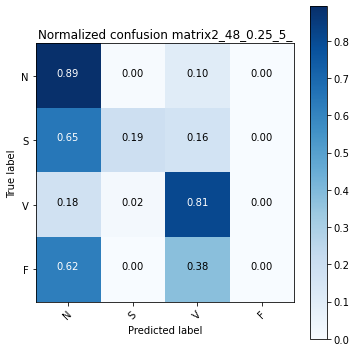

Number of leyers: 2, Number of filters: 48, Dropout rate: 0.5, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 43s 643us/step - loss: 0.1643 - f1_metric: 0.9468 - categorical_accuracy: 0.9493 - val_loss: 0.5400 - val_f1_metric: 0.6751 - val_categorical_accuracy: 0.7044

Epoch 00001: val_f1_metric improved from -inf to 0.67515, saving model to ../../models/2_48_0.50_5_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 43s 639us/step - loss: 0.0940 - f1_metric: 0.9698 - categorical_accuracy: 0.9698 - val_loss: 0.5735 - val_f1_metric: 0.6678 - val_categorical_accuracy: 0.6836

Epoch 00002: val_f1_metric did not improve from 0.67515
Epoch 3/100
66947/66947 [==============================] - 37s 547us/step - loss: 0.0854 - f1_metric: 0.9745 - categorical_accuracy: 0.9742 - val_loss: 0.5387 - val_f1_metric: 0.6778 - val_categorical_accuracy: 0.6941

Epoch 00003: val_f1_metric improved from 0.675


Epoch 00028: val_f1_metric did not improve from 0.92596
Epoch 29/100
66947/66947 [==============================] - 37s 558us/step - loss: 0.0465 - f1_metric: 0.9863 - categorical_accuracy: 0.9862 - val_loss: 0.3548 - val_f1_metric: 0.8806 - val_categorical_accuracy: 0.8837

Epoch 00029: val_f1_metric did not improve from 0.92596
Epoch 30/100
66947/66947 [==============================] - 31s 467us/step - loss: 0.0486 - f1_metric: 0.9857 - categorical_accuracy: 0.9856 - val_loss: 0.3310 - val_f1_metric: 0.9013 - val_categorical_accuracy: 0.9025

Epoch 00030: val_f1_metric did not improve from 0.92596
Epoch 31/100
66947/66947 [==============================] - 32s 479us/step - loss: 0.0470 - f1_metric: 0.9861 - categorical_accuracy: 0.9862 - val_loss: 0.3128 - val_f1_metric: 0.9191 - val_categorical_accuracy: 0.9182

Epoch 00031: val_f1_metric did not improve from 0.92596
Epoch 32/100
66947/66947 [==============================] - 33s 497us/step - loss: 0.0464 - f1_metric: 0.9859 - cat

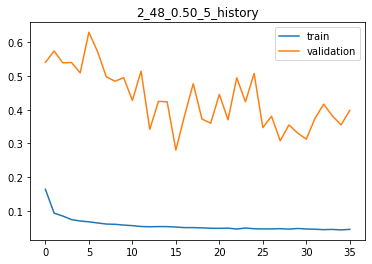

Train loss: 0.066, Val loss: 0.280, Test loss: 0.287
Train F1 metric: 0.986, Val F1 metric: 0.926, Test F1 metric: 0.911,
Train accuracy: 0.986, Val accuracy: 0.931, Test accuracy: 0.911
23911/23911 [==============================] - 2s 85us/step


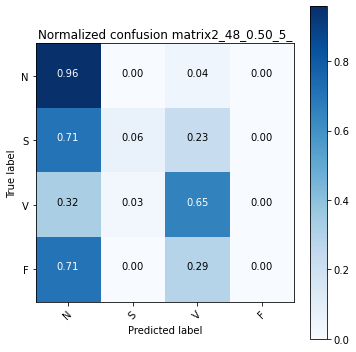

Number of leyers: 3, Number of filters: 16, Dropout rate: 0.25, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 20s 293us/step - loss: 0.3051 - f1_metric: 0.9059 - categorical_accuracy: 0.9136 - val_loss: 0.3985 - val_f1_metric: 0.8674 - val_categorical_accuracy: 0.8747

Epoch 00001: val_f1_metric improved from -inf to 0.86737, saving model to ../../models/3_16_0.25_5_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 22s 322us/step - loss: 0.1758 - f1_metric: 0.9401 - categorical_accuracy: 0.9400 - val_loss: 0.5542 - val_f1_metric: 0.6442 - val_categorical_accuracy: 0.6535

Epoch 00002: val_f1_metric did not improve from 0.86737
Epoch 3/100
66947/66947 [==============================] - 23s 346us/step - loss: 0.1468 - f1_metric: 0.9510 - categorical_accuracy: 0.9505 - val_loss: 0.4908 - val_f1_metric: 0.6543 - val_categorical_accuracy: 0.6616

Epoch 00003: val_f1_metric did not improve fr

66947/66947 [==============================] - 19s 282us/step - loss: 0.0727 - f1_metric: 0.9770 - categorical_accuracy: 0.9771 - val_loss: 0.4400 - val_f1_metric: 0.8054 - val_categorical_accuracy: 0.8148

Epoch 00030: val_f1_metric did not improve from 0.95124
Epoch 31/100
66947/66947 [==============================] - 26s 390us/step - loss: 0.0725 - f1_metric: 0.9772 - categorical_accuracy: 0.9772 - val_loss: 0.4983 - val_f1_metric: 0.7456 - val_categorical_accuracy: 0.7471

Epoch 00031: val_f1_metric did not improve from 0.95124
Epoch 32/100
66947/66947 [==============================] - 21s 311us/step - loss: 0.0721 - f1_metric: 0.9774 - categorical_accuracy: 0.9772 - val_loss: 0.3933 - val_f1_metric: 0.8529 - val_categorical_accuracy: 0.8637

Epoch 00032: val_f1_metric did not improve from 0.95124
Epoch 33/100
66947/66947 [==============================] - 20s 298us/step - loss: 0.0709 - f1_metric: 0.9775 - categorical_accuracy: 0.9773 - val_loss: 0.3944 - val_f1_metric: 0.8320 -

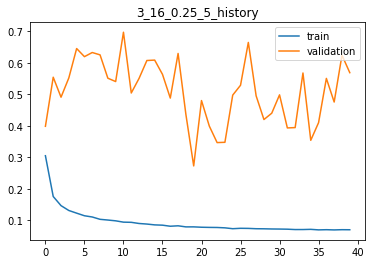

Train loss: 0.070, Val loss: 0.273, Test loss: 0.259
Train F1 metric: 0.981, Val F1 metric: 0.951, Test F1 metric: 0.930,
Train accuracy: 0.982, Val accuracy: 0.955, Test accuracy: 0.931
23911/23911 [==============================] - 2s 80us/step


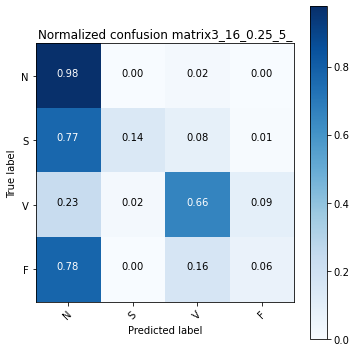

Number of leyers: 3, Number of filters: 16, Dropout rate: 0.5, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 22s 329us/step - loss: 0.3397 - f1_metric: 0.8989 - categorical_accuracy: 0.9047 - val_loss: 0.5163 - val_f1_metric: 0.8694 - val_categorical_accuracy: 0.9212

Epoch 00001: val_f1_metric improved from -inf to 0.86938, saving model to ../../models/3_16_0.50_5_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 22s 334us/step - loss: 0.2487 - f1_metric: 0.9213 - categorical_accuracy: 0.9215 - val_loss: 0.4873 - val_f1_metric: 0.8174 - val_categorical_accuracy: 0.9356

Epoch 00002: val_f1_metric did not improve from 0.86938
Epoch 3/100
66947/66947 [==============================] - 22s 325us/step - loss: 0.2222 - f1_metric: 0.9277 - categorical_accuracy: 0.9274 - val_loss: 0.4507 - val_f1_metric: 0.8536 - val_categorical_accuracy: 0.9173

Epoch 00003: val_f1_metric did not improve fro


Epoch 00029: val_f1_metric did not improve from 0.90085
Epoch 30/100
66947/66947 [==============================] - 20s 299us/step - loss: 0.1555 - f1_metric: 0.9494 - categorical_accuracy: 0.9492 - val_loss: 0.4163 - val_f1_metric: 0.8456 - val_categorical_accuracy: 0.8515

Epoch 00030: val_f1_metric did not improve from 0.90085
Epoch 31/100
66947/66947 [==============================] - 22s 325us/step - loss: 0.1539 - f1_metric: 0.9497 - categorical_accuracy: 0.9495 - val_loss: 0.4079 - val_f1_metric: 0.8620 - val_categorical_accuracy: 0.8641

Epoch 00031: val_f1_metric did not improve from 0.90085
Epoch 32/100
66947/66947 [==============================] - 21s 316us/step - loss: 0.1552 - f1_metric: 0.9493 - categorical_accuracy: 0.9490 - val_loss: 0.4268 - val_f1_metric: 0.8129 - val_categorical_accuracy: 0.8208

Epoch 00032: val_f1_metric did not improve from 0.90085
Epoch 33/100
66947/66947 [==============================] - 21s 317us/step - loss: 0.1534 - f1_metric: 0.9502 - cat

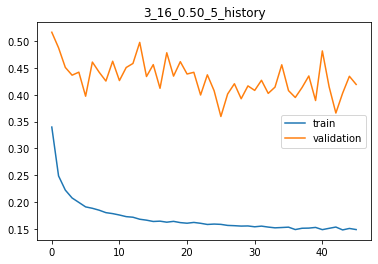

Train loss: 0.231, Val loss: 0.359, Test loss: 0.295
Train F1 metric: 0.924, Val F1 metric: 0.901, Test F1 metric: 0.926,
Train accuracy: 0.927, Val accuracy: 0.903, Test accuracy: 0.927
23911/23911 [==============================] - 2s 71us/step


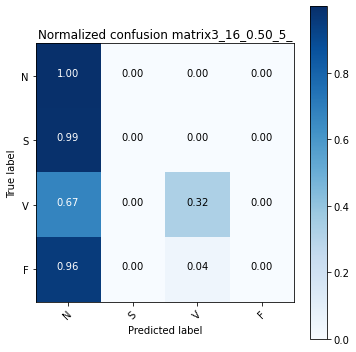

Number of leyers: 3, Number of filters: 32, Dropout rate: 0.25, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 31s 469us/step - loss: 0.2198 - f1_metric: 0.9306 - categorical_accuracy: 0.9349 - val_loss: 0.3794 - val_f1_metric: 0.8411 - val_categorical_accuracy: 0.8419

Epoch 00001: val_f1_metric improved from -inf to 0.84110, saving model to ../../models/3_32_0.25_5_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 30s 441us/step - loss: 0.1150 - f1_metric: 0.9637 - categorical_accuracy: 0.9636 - val_loss: 0.5358 - val_f1_metric: 0.6884 - val_categorical_accuracy: 0.6911

Epoch 00002: val_f1_metric did not improve from 0.84110
Epoch 3/100
66947/66947 [==============================] - 28s 418us/step - loss: 0.0932 - f1_metric: 0.9713 - categorical_accuracy: 0.9710 - val_loss: 0.4249 - val_f1_metric: 0.7991 - val_categorical_accuracy: 0.8006

Epoch 00003: val_f1_metric did not improve fr

66947/66947 [==============================] - 29s 432us/step - loss: 0.0467 - f1_metric: 0.9863 - categorical_accuracy: 0.9862 - val_loss: 0.3897 - val_f1_metric: 0.9004 - val_categorical_accuracy: 0.9018

Epoch 00029: val_f1_metric did not improve from 0.92623
Epoch 30/100
66947/66947 [==============================] - 36s 538us/step - loss: 0.0489 - f1_metric: 0.9850 - categorical_accuracy: 0.9851 - val_loss: 0.2843 - val_f1_metric: 0.9359 - val_categorical_accuracy: 0.9361

Epoch 00030: val_f1_metric improved from 0.92623 to 0.93585, saving model to ../../models/3_32_0.25_5_best_model.h5
Epoch 31/100
66947/66947 [==============================] - 30s 453us/step - loss: 0.0454 - f1_metric: 0.9863 - categorical_accuracy: 0.9863 - val_loss: 0.3351 - val_f1_metric: 0.8971 - val_categorical_accuracy: 0.8972

Epoch 00031: val_f1_metric did not improve from 0.93585
Epoch 32/100
66947/66947 [==============================] - 28s 419us/step - loss: 0.0467 - f1_metric: 0.9857 - categorical_a

66947/66947 [==============================] - 30s 453us/step - loss: 0.0414 - f1_metric: 0.9877 - categorical_accuracy: 0.9876 - val_loss: 0.2479 - val_f1_metric: 0.9366 - val_categorical_accuracy: 0.9375

Epoch 00058: val_f1_metric did not improve from 0.94563
Epoch 59/100
66947/66947 [==============================] - 29s 433us/step - loss: 0.0421 - f1_metric: 0.9874 - categorical_accuracy: 0.9874 - val_loss: 0.2600 - val_f1_metric: 0.9308 - val_categorical_accuracy: 0.9339

Epoch 00059: val_f1_metric did not improve from 0.94563
Epoch 60/100
66947/66947 [==============================] - 31s 456us/step - loss: 0.0416 - f1_metric: 0.9875 - categorical_accuracy: 0.9875 - val_loss: 0.3219 - val_f1_metric: 0.8768 - val_categorical_accuracy: 0.8815

Epoch 00060: val_f1_metric did not improve from 0.94563
Epoch 61/100
66947/66947 [==============================] - 31s 458us/step - loss: 0.0410 - f1_metric: 0.9876 - categorical_accuracy: 0.9876 - val_loss: 0.2952 - val_f1_metric: 0.9087 -


Epoch 00087: val_f1_metric did not improve from 0.94892
Epoch 88/100
66947/66947 [==============================] - 30s 445us/step - loss: 0.0388 - f1_metric: 0.9883 - categorical_accuracy: 0.9883 - val_loss: 0.2446 - val_f1_metric: 0.9401 - val_categorical_accuracy: 0.9418

Epoch 00088: val_f1_metric did not improve from 0.94892
Epoch 89/100
66947/66947 [==============================] - 28s 415us/step - loss: 0.0379 - f1_metric: 0.9889 - categorical_accuracy: 0.9888 - val_loss: 0.2192 - val_f1_metric: 0.9473 - val_categorical_accuracy: 0.9482

Epoch 00089: val_f1_metric did not improve from 0.94892
Epoch 90/100
66947/66947 [==============================] - 31s 466us/step - loss: 0.0380 - f1_metric: 0.9885 - categorical_accuracy: 0.9885 - val_loss: 0.2449 - val_f1_metric: 0.9380 - val_categorical_accuracy: 0.9383

Epoch 00090: val_f1_metric did not improve from 0.94892
Epoch 91/100
66947/66947 [==============================] - 26s 393us/step - loss: 0.0400 - f1_metric: 0.9887 - cat

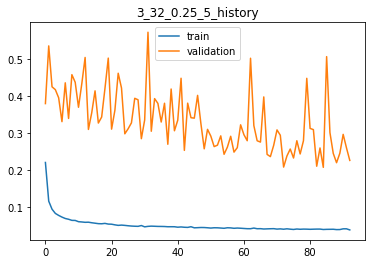

Train loss: 0.031, Val loss: 0.207, Test loss: 0.259
Train F1 metric: 0.991, Val F1 metric: 0.949, Test F1 metric: 0.923,
Train accuracy: 0.991, Val accuracy: 0.950, Test accuracy: 0.924
23911/23911 [==============================] - 2s 79us/step


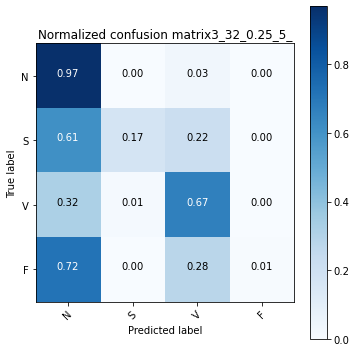

Number of leyers: 3, Number of filters: 32, Dropout rate: 0.5, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 31s 458us/step - loss: 0.2674 - f1_metric: 0.9190 - categorical_accuracy: 0.9211 - val_loss: 0.5683 - val_f1_metric: 0.8159 - val_categorical_accuracy: 0.8191

Epoch 00001: val_f1_metric improved from -inf to 0.81593, saving model to ../../models/3_32_0.50_5_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 30s 449us/step - loss: 0.1837 - f1_metric: 0.9388 - categorical_accuracy: 0.9384 - val_loss: 0.4583 - val_f1_metric: 0.8263 - val_categorical_accuracy: 0.8072

Epoch 00002: val_f1_metric improved from 0.81593 to 0.82631, saving model to ../../models/3_32_0.50_5_best_model.h5
Epoch 3/100
66947/66947 [==============================] - 34s 504us/step - loss: 0.1645 - f1_metric: 0.9452 - categorical_accuracy: 0.9449 - val_loss: 0.4595 - val_f1_metric: 0.7433 - val_categorical_accu

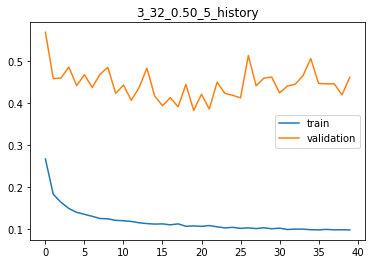

Train loss: 0.204, Val loss: 0.383, Test loss: 0.304
Train F1 metric: 0.921, Val F1 metric: 0.864, Test F1 metric: 0.922,
Train accuracy: 0.925, Val accuracy: 0.870, Test accuracy: 0.920
23911/23911 [==============================] - 2s 72us/step


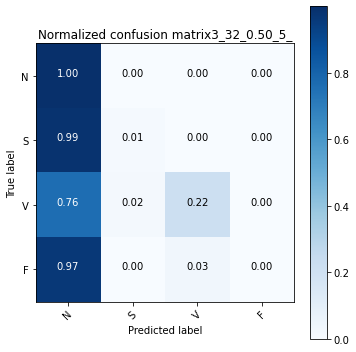

Number of leyers: 3, Number of filters: 48, Dropout rate: 0.25, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 40s 591us/step - loss: 0.1944 - f1_metric: 0.9368 - categorical_accuracy: 0.9409 - val_loss: 0.5879 - val_f1_metric: 0.6425 - val_categorical_accuracy: 0.6475

Epoch 00001: val_f1_metric improved from -inf to 0.64252, saving model to ../../models/3_48_0.25_5_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 37s 555us/step - loss: 0.1005 - f1_metric: 0.9687 - categorical_accuracy: 0.9686 - val_loss: 0.5376 - val_f1_metric: 0.7035 - val_categorical_accuracy: 0.7056

Epoch 00002: val_f1_metric improved from 0.64252 to 0.70351, saving model to ../../models/3_48_0.25_5_best_model.h5
Epoch 3/100
66947/66947 [==============================] - 37s 557us/step - loss: 0.0825 - f1_metric: 0.9752 - categorical_accuracy: 0.9751 - val_loss: 0.7874 - val_f1_metric: 0.6492 - val_categorical_acc

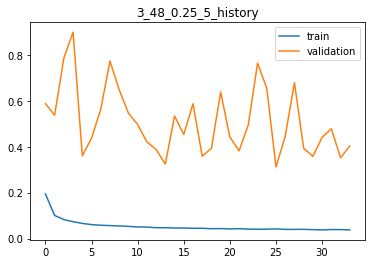

Train loss: 0.047, Val loss: 0.325, Test loss: 0.288
Train F1 metric: 0.986, Val F1 metric: 0.932, Test F1 metric: 0.910,
Train accuracy: 0.986, Val accuracy: 0.933, Test accuracy: 0.910
23911/23911 [==============================] - 2s 92us/step


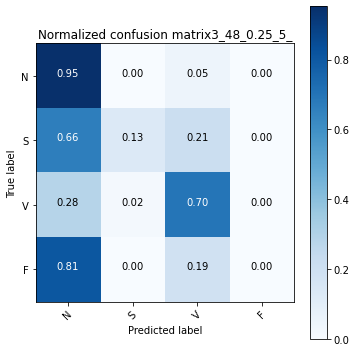

Number of leyers: 3, Number of filters: 48, Dropout rate: 0.5, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/100
66947/66947 [==============================] - 42s 635us/step - loss: 0.2647 - f1_metric: 0.9185 - categorical_accuracy: 0.9207 - val_loss: 0.5033 - val_f1_metric: 0.8452 - val_categorical_accuracy: 0.9206

Epoch 00001: val_f1_metric improved from -inf to 0.84521, saving model to ../../models/3_48_0.50_5_best_model.h5
Epoch 2/100
66947/66947 [==============================] - 39s 590us/step - loss: 0.1663 - f1_metric: 0.9449 - categorical_accuracy: 0.9448 - val_loss: 0.5066 - val_f1_metric: 0.6886 - val_categorical_accuracy: 0.7307

Epoch 00002: val_f1_metric did not improve from 0.84521
Epoch 3/100
66947/66947 [==============================] - 39s 589us/step - loss: 0.1400 - f1_metric: 0.9544 - categorical_accuracy: 0.9542 - val_loss: 0.4340 - val_f1_metric: 0.8254 - val_categorical_accuracy: 0.8358

Epoch 00003: val_f1_metric did not improve fro

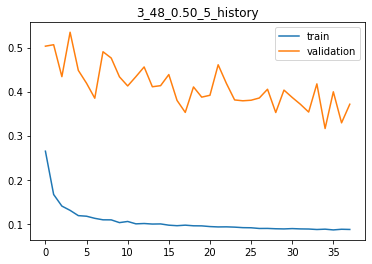

Train loss: 0.159, Val loss: 0.353, Test loss: 0.248
Train F1 metric: 0.943, Val F1 metric: 0.920, Test F1 metric: 0.934,
Train accuracy: 0.944, Val accuracy: 0.921, Test accuracy: 0.932
23911/23911 [==============================] - 2s 105us/step


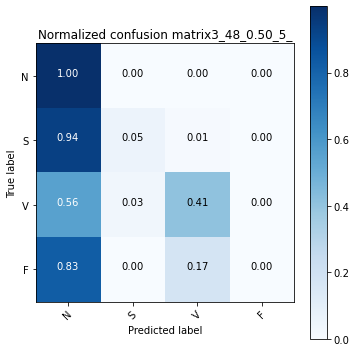

In [82]:
# monitoring F1 score

filters = [16, 32, 48]
dropout_rates = [0.25, 0.5]
layers = [2, 3]
kernel_size = [5]
for l in layers:
    for n in filters:
        for d in dropout_rates:
            for k in kernel_size:
                print("Number of leyers: {}, Number of filters: {}, Dropout rate: {}, Kernel size: {}.".format(l, n, d, k))
                sff.full_process(train_df, val_df, test_df, l, n, d, k, 'cnn', with_standard=False)

## The best result are prodiced with 2_48_0.25_5 and 3_32_0.25_5. Reload the saved models and train for 50 more epochs.

In [85]:
from keras.models import load_model
# load 2_48_0.25_5
model = load_model('../../models/train_val_test_split/2_3_layer_split_on_records_F1/2_48_0.25_5_best_model.h5',\
                             custom_objects={'f1_metric': sff.f1_metric})

In [86]:
x_train, x_val, x_test, y_train, y_val, y_test, class_weights = sff.process_data(train_df, val_df, test_df, 'cnn', with_standard=False)
x_train.shape

(66947, 360, 1)

In [87]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
model_prefix = '2_48_0.25_5_retrained_'
es = EarlyStopping(monitor='val_f1_metric', mode='max', verbose=1, patience=40)
mc = ModelCheckpoint('../../models/{}best_model.h5'.format(model_prefix), monitor='val_f1_metric', mode='max', verbose=1, save_best_only=True)
history = sff.fit_model(model, x_train, y_train, x_val, y_val, class_weights, es, mc)

Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 42s 633us/step - loss: 0.0170 - f1_metric: 0.9947 - categorical_accuracy: 0.9947 - val_loss: 0.3200 - val_f1_metric: 0.9379 - val_categorical_accuracy: 0.9378

Epoch 00001: val_f1_metric improved from -inf to 0.93786, saving model to ../../models/2_48_0.25_5_retrained_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 39s 582us/step - loss: 0.0169 - f1_metric: 0.9948 - categorical_accuracy: 0.9948 - val_loss: 0.2822 - val_f1_metric: 0.9391 - val_categorical_accuracy: 0.9392

Epoch 00002: val_f1_metric improved from 0.93786 to 0.93907, saving model to ../../models/2_48_0.25_5_retrained_best_model.h5
Epoch 3/200
66947/66947 [==============================] - 36s 535us/step - loss: 0.0167 - f1_metric: 0.9947 - categorical_accuracy: 0.9946 - val_loss: 0.2863 - val_f1_metric: 0.9442 - val_categorical_accuracy: 0.9453

Epoch 00003: val_f1_metric improved from 0.93

66947/66947 [==============================] - 33s 488us/step - loss: 0.0150 - f1_metric: 0.9952 - categorical_accuracy: 0.9952 - val_loss: 0.4927 - val_f1_metric: 0.8853 - val_categorical_accuracy: 0.8887

Epoch 00058: val_f1_metric did not improve from 0.96323
Epoch 59/200
66947/66947 [==============================] - 32s 485us/step - loss: 0.0157 - f1_metric: 0.9951 - categorical_accuracy: 0.9950 - val_loss: 0.2928 - val_f1_metric: 0.9412 - val_categorical_accuracy: 0.9430

Epoch 00059: val_f1_metric did not improve from 0.96323
Epoch 60/200
66947/66947 [==============================] - 33s 491us/step - loss: 0.0152 - f1_metric: 0.9952 - categorical_accuracy: 0.9952 - val_loss: 0.3780 - val_f1_metric: 0.9150 - val_categorical_accuracy: 0.9164

Epoch 00060: val_f1_metric did not improve from 0.96323
Epoch 61/200
66947/66947 [==============================] - 33s 494us/step - loss: 0.0151 - f1_metric: 0.9953 - categorical_accuracy: 0.9953 - val_loss: 0.3419 - val_f1_metric: 0.9246 -

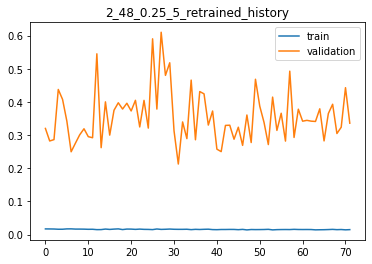

In [90]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
title = model_prefix+'history'
plt.title(title)
plt.legend()
plt.show()

In [91]:
saved_model = load_model('../../models/2_48_0.25_5_retrained_best_model.h5', \
                             custom_objects={'f1_metric': sff.f1_metric})
train_loss, train_f1_metric, train_acc = saved_model.evaluate(x_train, y_train, verbose=0)
val_loss, val_f1_metric, val_acc = saved_model.evaluate(x_val, y_val, verbose=0)
test_loss, test_f1_metric, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)
print('Train loss: %.3f, Val loss: %.3f, Test loss: %.3f' % (train_loss, val_loss, test_loss))
print('Train F1 metric: %.3f, Val F1 metric: %.3f, Test F1 metric: %.3f,' % \
      (train_f1_metric, val_f1_metric, test_f1_metric))
print('Train accuracy: %.3f, Val accuracy: %.3f, Test accuracy: %.3f' % (train_acc, val_acc, test_acc))

Train loss: 0.012, Val loss: 0.213, Test loss: 0.398
Train F1 metric: 0.996, Val F1 metric: 0.963, Test F1 metric: 0.899,
Train accuracy: 0.996, Val accuracy: 0.963, Test accuracy: 0.899


23911/23911 [==============================] - 2s 101us/step


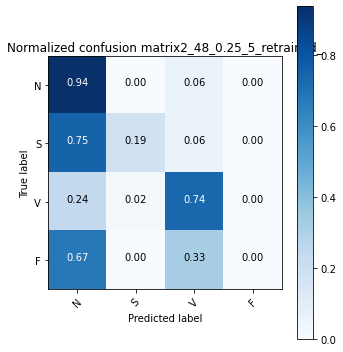

array([[9.37e-01, 2.08e-03, 6.06e-02, 5.54e-04],
       [7.52e-01, 1.86e-01, 6.11e-02, 0.00e+00],
       [2.44e-01, 1.86e-02, 7.37e-01, 6.43e-04],
       [6.74e-01, 0.00e+00, 3.26e-01, 0.00e+00]])

In [92]:
sff.plot_confusion_matrix(saved_model, x_test, y_test, model_prefix, normalize=True)

In [93]:
# load 3_32_0.25_5
model = load_model('../../models/train_val_test_split/2_3_layer_split_on_records_F1/3_32_0.25_5_best_model.h5',\
                             custom_objects={'f1_metric': sff.f1_metric})

In [94]:
model_prefix = '3_32_0.25_5_retrained_'
history = sff.fit_model(model, x_train, y_train, x_val, y_val, class_weights, es, mc)

Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 40s 592us/step - loss: 0.0396 - f1_metric: 0.9881 - categorical_accuracy: 0.9881 - val_loss: 0.2557 - val_f1_metric: 0.9305 - val_categorical_accuracy: 0.9307

Epoch 00001: val_f1_metric did not improve from 0.96323
Epoch 2/200
66947/66947 [==============================] - 29s 440us/step - loss: 0.0394 - f1_metric: 0.9882 - categorical_accuracy: 0.9881 - val_loss: 0.3336 - val_f1_metric: 0.8906 - val_categorical_accuracy: 0.8910

Epoch 00002: val_f1_metric did not improve from 0.96323
Epoch 3/200
66947/66947 [==============================] - 29s 436us/step - loss: 0.0393 - f1_metric: 0.9881 - categorical_accuracy: 0.9880 - val_loss: 0.2558 - val_f1_metric: 0.9351 - val_categorical_accuracy: 0.9363

Epoch 00003: val_f1_metric did not improve from 0.96323
Epoch 4/200
66947/66947 [==============================] - 32s 485us/step - loss: 0.0386 - f1_metric: 0.9883 - categorical_acc


Epoch 00030: val_f1_metric did not improve from 0.96323
Epoch 31/200
66947/66947 [==============================] - 30s 443us/step - loss: 0.0373 - f1_metric: 0.9891 - categorical_accuracy: 0.9892 - val_loss: 0.2220 - val_f1_metric: 0.9411 - val_categorical_accuracy: 0.9413

Epoch 00031: val_f1_metric did not improve from 0.96323
Epoch 32/200
66947/66947 [==============================] - 31s 460us/step - loss: 0.0373 - f1_metric: 0.9886 - categorical_accuracy: 0.9886 - val_loss: 0.2225 - val_f1_metric: 0.9431 - val_categorical_accuracy: 0.9435

Epoch 00032: val_f1_metric did not improve from 0.96323
Epoch 33/200
66947/66947 [==============================] - 31s 462us/step - loss: 0.0375 - f1_metric: 0.9889 - categorical_accuracy: 0.9889 - val_loss: 0.2275 - val_f1_metric: 0.9437 - val_categorical_accuracy: 0.9438

Epoch 00033: val_f1_metric did not improve from 0.96323
Epoch 34/200
66947/66947 [==============================] - 32s 475us/step - loss: 0.0367 - f1_metric: 0.9894 - cat

KeyboardInterrupt: 

Number of leyers: 2, Number of filters: 48, Dropout rate: 0.25, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 38s 565us/step - loss: 0.1437 - f1_metric: 0.9538 - categorical_accuracy: 0.9566 - val_loss: 0.4611 - val_f1_metric: 0.7977 - val_categorical_accuracy: 0.8006

Epoch 00001: val_f1_metric improved from -inf to 0.79771, saving model to ../../models/2_48_0.25_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 37s 546us/step - loss: 0.0707 - f1_metric: 0.9793 - categorical_accuracy: 0.9791 - val_loss: 0.6158 - val_f1_metric: 0.7096 - val_categorical_accuracy: 0.7184

Epoch 00002: val_f1_metric did not improve from 0.79771
Epoch 3/200
66947/66947 [==============================] - 39s 587us/step - loss: 0.0590 - f1_metric: 0.9831 - categorical_accuracy: 0.9831 - val_loss: 0.9407 - val_f1_metric: 0.6660 - val_categorical_accuracy: 0.6677

Epoch 00003: val_f1_metric did not improve fr

66947/66947 [==============================] - 33s 495us/step - loss: 0.0185 - f1_metric: 0.9942 - categorical_accuracy: 0.9942 - val_loss: 0.2826 - val_f1_metric: 0.9191 - val_categorical_accuracy: 0.9194

Epoch 00058: val_f1_metric did not improve from 0.94345
Epoch 59/200
66947/66947 [==============================] - 32s 480us/step - loss: 0.0188 - f1_metric: 0.9942 - categorical_accuracy: 0.9941 - val_loss: 0.5707 - val_f1_metric: 0.7929 - val_categorical_accuracy: 0.7958

Epoch 00059: val_f1_metric did not improve from 0.94345
Epoch 60/200
66947/66947 [==============================] - 32s 480us/step - loss: 0.0178 - f1_metric: 0.9945 - categorical_accuracy: 0.9945 - val_loss: 0.4040 - val_f1_metric: 0.8531 - val_categorical_accuracy: 0.8547

Epoch 00060: val_f1_metric did not improve from 0.94345
Epoch 61/200
66947/66947 [==============================] - 33s 495us/step - loss: 0.0195 - f1_metric: 0.9942 - categorical_accuracy: 0.9942 - val_loss: 0.5592 - val_f1_metric: 0.8080 -


Epoch 00087: val_f1_metric did not improve from 0.94935
Epoch 88/200
66947/66947 [==============================] - 33s 500us/step - loss: 0.0170 - f1_metric: 0.9947 - categorical_accuracy: 0.9946 - val_loss: 0.4627 - val_f1_metric: 0.8354 - val_categorical_accuracy: 0.8362

Epoch 00088: val_f1_metric did not improve from 0.94935
Epoch 89/200
66947/66947 [==============================] - 33s 498us/step - loss: 0.0176 - f1_metric: 0.9946 - categorical_accuracy: 0.9945 - val_loss: 0.4559 - val_f1_metric: 0.8341 - val_categorical_accuracy: 0.8344

Epoch 00089: val_f1_metric did not improve from 0.94935
Epoch 90/200
66947/66947 [==============================] - 33s 490us/step - loss: 0.0163 - f1_metric: 0.9949 - categorical_accuracy: 0.9948 - val_loss: 0.6844 - val_f1_metric: 0.7955 - val_categorical_accuracy: 0.7957

Epoch 00090: val_f1_metric did not improve from 0.94935
Epoch 91/200
66947/66947 [==============================] - 33s 493us/step - loss: 0.0169 - f1_metric: 0.9946 - cat

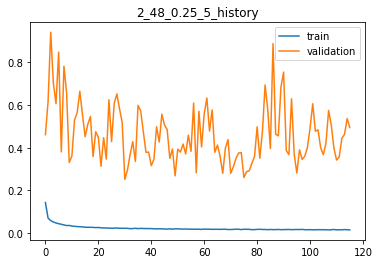

Train loss: 0.014, Val loss: 0.260, Test loss: 0.430
Train F1 metric: 0.996, Val F1 metric: 0.949, Test F1 metric: 0.884,
Train accuracy: 0.996, Val accuracy: 0.950, Test accuracy: 0.884
23911/23911 [==============================] - 2s 88us/step


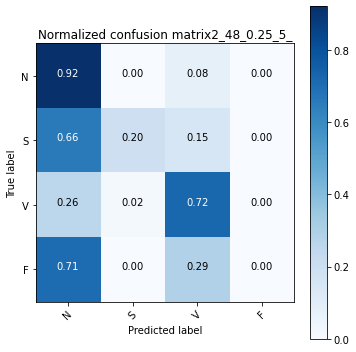

Number of leyers: 2, Number of filters: 48, Dropout rate: 0.37, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 34s 510us/step - loss: 0.1553 - f1_metric: 0.9496 - categorical_accuracy: 0.9524 - val_loss: 0.4116 - val_f1_metric: 0.7553 - val_categorical_accuracy: 0.7795

Epoch 00001: val_f1_metric improved from -inf to 0.75527, saving model to ../../models/2_48_0.37_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 34s 503us/step - loss: 0.0824 - f1_metric: 0.9753 - categorical_accuracy: 0.9753 - val_loss: 0.4739 - val_f1_metric: 0.7084 - val_categorical_accuracy: 0.7253

Epoch 00002: val_f1_metric did not improve from 0.75527
Epoch 3/200
66947/66947 [==============================] - 35s 521us/step - loss: 0.0728 - f1_metric: 0.9787 - categorical_accuracy: 0.9787 - val_loss: 0.4273 - val_f1_metric: 0.7303 - val_categorical_accuracy: 0.7589

Epoch 00003: val_f1_metric did not improve fr

66947/66947 [==============================] - 7252s 108ms/step - loss: 0.0274 - f1_metric: 0.9919 - categorical_accuracy: 0.9918 - val_loss: 0.3414 - val_f1_metric: 0.8753 - val_categorical_accuracy: 0.8755

Epoch 00058: val_f1_metric did not improve from 0.94308
Epoch 59/200
66947/66947 [==============================] - 7251s 108ms/step - loss: 0.0283 - f1_metric: 0.9913 - categorical_accuracy: 0.9913 - val_loss: 0.6733 - val_f1_metric: 0.7044 - val_categorical_accuracy: 0.7119

Epoch 00059: val_f1_metric did not improve from 0.94308
Epoch 60/200
66947/66947 [==============================] - 7247s 108ms/step - loss: 0.0287 - f1_metric: 0.9913 - categorical_accuracy: 0.9914 - val_loss: 0.3262 - val_f1_metric: 0.8895 - val_categorical_accuracy: 0.8892

Epoch 00060: val_f1_metric did not improve from 0.94308
Epoch 61/200
66947/66947 [==============================] - 51s 766us/step - loss: 0.0284 - f1_metric: 0.9916 - categorical_accuracy: 0.9916 - val_loss: 0.3753 - val_f1_metric: 0.

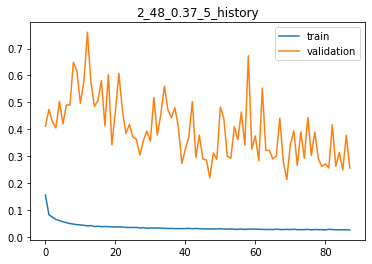

Train loss: 0.030, Val loss: 0.220, Test loss: 0.422
Train F1 metric: 0.991, Val F1 metric: 0.943, Test F1 metric: 0.878,
Train accuracy: 0.991, Val accuracy: 0.943, Test accuracy: 0.878
23911/23911 [==============================] - 3s 111us/step


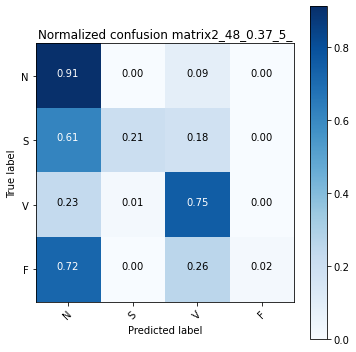

Number of leyers: 2, Number of filters: 48, Dropout rate: 0.5, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 49s 733us/step - loss: 0.1748 - f1_metric: 0.9426 - categorical_accuracy: 0.9449 - val_loss: 0.4291 - val_f1_metric: 0.7743 - val_categorical_accuracy: 0.8029

Epoch 00001: val_f1_metric improved from -inf to 0.77432, saving model to ../../models/2_48_0.50_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 38s 561us/step - loss: 0.1014 - f1_metric: 0.9683 - categorical_accuracy: 0.9681 - val_loss: 0.5004 - val_f1_metric: 0.6639 - val_categorical_accuracy: 0.6804

Epoch 00002: val_f1_metric did not improve from 0.77432
Epoch 3/200
66947/66947 [==============================] - 40s 597us/step - loss: 0.0871 - f1_metric: 0.9731 - categorical_accuracy: 0.9731 - val_loss: 0.4520 - val_f1_metric: 0.6927 - val_categorical_accuracy: 0.7273

Epoch 00003: val_f1_metric did not improve fro

66947/66947 [==============================] - 39s 588us/step - loss: 0.0441 - f1_metric: 0.9866 - categorical_accuracy: 0.9866 - val_loss: 0.2240 - val_f1_metric: 0.9359 - val_categorical_accuracy: 0.9365

Epoch 00058: val_f1_metric did not improve from 0.94766
Epoch 59/200
66947/66947 [==============================] - 37s 547us/step - loss: 0.0440 - f1_metric: 0.9865 - categorical_accuracy: 0.9867 - val_loss: 0.2739 - val_f1_metric: 0.9331 - val_categorical_accuracy: 0.9339

Epoch 00059: val_f1_metric did not improve from 0.94766
Epoch 60/200
66947/66947 [==============================] - 36s 541us/step - loss: 0.0428 - f1_metric: 0.9874 - categorical_accuracy: 0.9874 - val_loss: 0.2878 - val_f1_metric: 0.9250 - val_categorical_accuracy: 0.9262

Epoch 00060: val_f1_metric did not improve from 0.94766
Epoch 61/200
66947/66947 [==============================] - 40s 595us/step - loss: 0.0422 - f1_metric: 0.9875 - categorical_accuracy: 0.9876 - val_loss: 0.2657 - val_f1_metric: 0.9310 -


Epoch 00087: val_f1_metric did not improve from 0.94766
Epoch 88/200
66947/66947 [==============================] - 37s 554us/step - loss: 0.0415 - f1_metric: 0.9877 - categorical_accuracy: 0.9877 - val_loss: 0.2595 - val_f1_metric: 0.9321 - val_categorical_accuracy: 0.9332

Epoch 00088: val_f1_metric did not improve from 0.94766
Epoch 89/200
66947/66947 [==============================] - 42s 622us/step - loss: 0.0414 - f1_metric: 0.9878 - categorical_accuracy: 0.9878 - val_loss: 0.2908 - val_f1_metric: 0.9267 - val_categorical_accuracy: 0.9265

Epoch 00089: val_f1_metric did not improve from 0.94766
Epoch 00089: early stopping


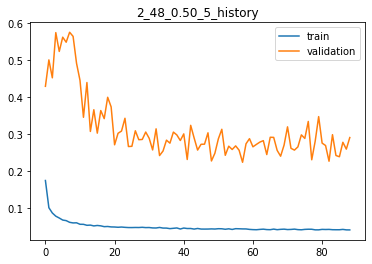

Train loss: 0.058, Val loss: 0.228, Test loss: 0.234
Train F1 metric: 0.980, Val F1 metric: 0.948, Test F1 metric: 0.934,
Train accuracy: 0.980, Val accuracy: 0.948, Test accuracy: 0.934
23911/23911 [==============================] - 2s 91us/step


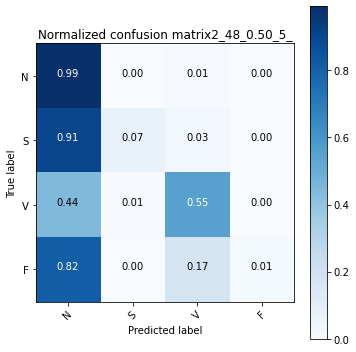

Number of leyers: 2, Number of filters: 60, Dropout rate: 0.25, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 48s 716us/step - loss: 0.1397 - f1_metric: 0.9555 - categorical_accuracy: 0.9584 - val_loss: 0.5947 - val_f1_metric: 0.6848 - val_categorical_accuracy: 0.6916

Epoch 00001: val_f1_metric improved from -inf to 0.68481, saving model to ../../models/2_60_0.25_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 50s 741us/step - loss: 0.0706 - f1_metric: 0.9793 - categorical_accuracy: 0.9794 - val_loss: 0.5944 - val_f1_metric: 0.7056 - val_categorical_accuracy: 0.7161

Epoch 00002: val_f1_metric improved from 0.68481 to 0.70558, saving model to ../../models/2_60_0.25_5_best_model.h5
Epoch 3/200
66947/66947 [==============================] - 58s 865us/step - loss: 0.0568 - f1_metric: 0.9839 - categorical_accuracy: 0.9838 - val_loss: 0.4001 - val_f1_metric: 0.8133 - val_categorical_acc


Epoch 00058: val_f1_metric did not improve from 0.94645
Epoch 59/200
66947/66947 [==============================] - 68s 1ms/step - loss: 0.0181 - f1_metric: 0.9942 - categorical_accuracy: 0.9943 - val_loss: 0.3520 - val_f1_metric: 0.8927 - val_categorical_accuracy: 0.8941

Epoch 00059: val_f1_metric did not improve from 0.94645
Epoch 60/200
66947/66947 [==============================] - 68s 1ms/step - loss: 0.0192 - f1_metric: 0.9943 - categorical_accuracy: 0.9943 - val_loss: 0.2589 - val_f1_metric: 0.9423 - val_categorical_accuracy: 0.9437

Epoch 00060: val_f1_metric did not improve from 0.94645
Epoch 61/200
66947/66947 [==============================] - 68s 1ms/step - loss: 0.0181 - f1_metric: 0.9943 - categorical_accuracy: 0.9944 - val_loss: 0.3798 - val_f1_metric: 0.8485 - val_categorical_accuracy: 0.8490

Epoch 00061: val_f1_metric did not improve from 0.94645
Epoch 62/200
66947/66947 [==============================] - 68s 1ms/step - loss: 0.0170 - f1_metric: 0.9948 - categorical

66947/66947 [==============================] - 73s 1ms/step - loss: 0.0163 - f1_metric: 0.9947 - categorical_accuracy: 0.9947 - val_loss: 0.3161 - val_f1_metric: 0.9351 - val_categorical_accuracy: 0.9348

Epoch 00117: val_f1_metric did not improve from 0.95523
Epoch 118/200
66947/66947 [==============================] - 72s 1ms/step - loss: 0.0143 - f1_metric: 0.9954 - categorical_accuracy: 0.9954 - val_loss: 0.8712 - val_f1_metric: 0.7555 - val_categorical_accuracy: 0.7550

Epoch 00118: val_f1_metric did not improve from 0.95523
Epoch 119/200
66947/66947 [==============================] - 72s 1ms/step - loss: 0.0155 - f1_metric: 0.9951 - categorical_accuracy: 0.9951 - val_loss: 0.5622 - val_f1_metric: 0.8421 - val_categorical_accuracy: 0.8418

Epoch 00119: val_f1_metric did not improve from 0.95523
Epoch 120/200
66947/66947 [==============================] - 71s 1ms/step - loss: 0.0157 - f1_metric: 0.9947 - categorical_accuracy: 0.9947 - val_loss: 0.3388 - val_f1_metric: 0.9280 - val_

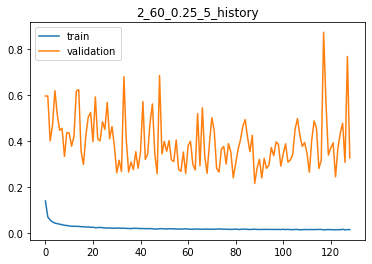

Train loss: 0.012, Val loss: 0.216, Test loss: 0.409
Train F1 metric: 0.996, Val F1 metric: 0.955, Test F1 metric: 0.891,
Train accuracy: 0.996, Val accuracy: 0.958, Test accuracy: 0.891
23911/23911 [==============================] - 5s 222us/step


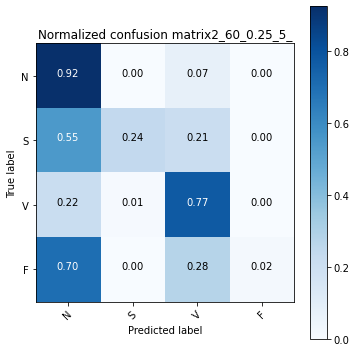

Number of leyers: 2, Number of filters: 60, Dropout rate: 0.37, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 75s 1ms/step - loss: 0.1483 - f1_metric: 0.9532 - categorical_accuracy: 0.9551 - val_loss: 0.5049 - val_f1_metric: 0.6906 - val_categorical_accuracy: 0.7139

Epoch 00001: val_f1_metric improved from -inf to 0.69062, saving model to ../../models/2_60_0.37_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 76s 1ms/step - loss: 0.0845 - f1_metric: 0.9745 - categorical_accuracy: 0.9744 - val_loss: 0.5189 - val_f1_metric: 0.6850 - val_categorical_accuracy: 0.6924

Epoch 00002: val_f1_metric did not improve from 0.69062
Epoch 3/200
66947/66947 [==============================] - 83s 1ms/step - loss: 0.0690 - f1_metric: 0.9800 - categorical_accuracy: 0.9800 - val_loss: 0.6573 - val_f1_metric: 0.6715 - val_categorical_accuracy: 0.6770

Epoch 00003: val_f1_metric did not improve from 0.6

KeyboardInterrupt: 

In [95]:
# monitoring F1 score

filters = [48, 60, 72]
dropout_rates = [0.25, 0.37, 0.5]
layers = [2, 3]
kernel_size = [5]
for l in layers:
    for n in filters:
        for d in dropout_rates:
            for k in kernel_size:
                print("Number of leyers: {}, Number of filters: {}, Dropout rate: {}, Kernel size: {}.".format(l, n, d, k))
                sff.full_process(train_df, val_df, test_df, l, n, d, k, 'cnn', with_standard=False)

Number of leyers: 2, Number of filters: 48, Dropout rate: 0.25, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 65s 968us/step - loss: 0.1583 - f1_metric: 0.0671 - categorical_accuracy: 0.9522 - val_loss: 0.4197 - val_f1_metric: 0.0306 - val_categorical_accuracy: 0.8234

Epoch 00001: val_f1_metric improved from -inf to 0.03060, saving model to ../../models/2_48_0.25_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 67s 1ms/step - loss: 0.0763 - f1_metric: 0.0924 - categorical_accuracy: 0.9770 - val_loss: 0.5751 - val_f1_metric: 0.0491 - val_categorical_accuracy: 0.7174

Epoch 00002: val_f1_metric improved from 0.03060 to 0.04915, saving model to ../../models/2_48_0.25_5_best_model.h5
Epoch 3/200
66947/66947 [==============================] - 65s 974us/step - loss: 0.0638 - f1_metric: 0.0951 - categorical_accuracy: 0.9811 - val_loss: 0.6247 - val_f1_metric: 0.0499 - val_categorical_accur

66947/66947 [==============================] - 63s 948us/step - loss: 0.0196 - f1_metric: 0.1042 - categorical_accuracy: 0.9937 - val_loss: 0.3314 - val_f1_metric: 0.0495 - val_categorical_accuracy: 0.9124

Epoch 00058: val_f1_metric did not improve from 0.05772
Epoch 59/200
66947/66947 [==============================] - 64s 961us/step - loss: 0.0203 - f1_metric: 0.1039 - categorical_accuracy: 0.9936 - val_loss: 0.3950 - val_f1_metric: 0.0451 - val_categorical_accuracy: 0.8745

Epoch 00059: val_f1_metric did not improve from 0.05772
Epoch 60/200
66947/66947 [==============================] - 62s 931us/step - loss: 0.0201 - f1_metric: 0.1046 - categorical_accuracy: 0.9938 - val_loss: 0.3366 - val_f1_metric: 0.0472 - val_categorical_accuracy: 0.9004

Epoch 00060: val_f1_metric did not improve from 0.05772
Epoch 61/200
66947/66947 [==============================] - 60s 895us/step - loss: 0.0193 - f1_metric: 0.1038 - categorical_accuracy: 0.9940 - val_loss: 0.2942 - val_f1_metric: 0.0355 -

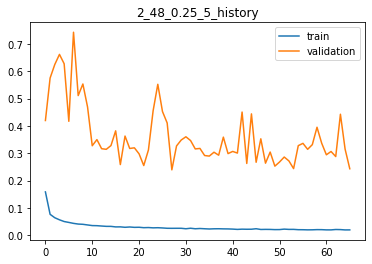

Train loss: 0.023, Val loss: 0.453, Test loss: 0.822
Train F1 metric: 0.104, Val F1 metric: 0.058, Test F1 metric: 0.053,
Train accuracy: 0.994, Val accuracy: 0.832, Test accuracy: 0.847
23911/23911 [==============================] - 4s 162us/step


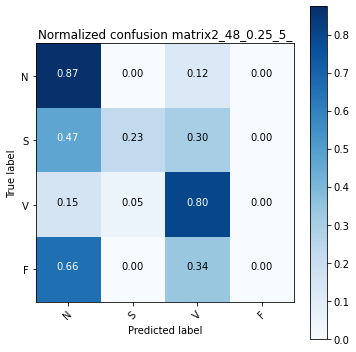

Number of leyers: 2, Number of filters: 48, Dropout rate: 0.37, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 57s 856us/step - loss: 0.1573 - f1_metric: 0.0679 - categorical_accuracy: 0.9510 - val_loss: 0.4414 - val_f1_metric: 0.0431 - val_categorical_accuracy: 0.7995

Epoch 00001: val_f1_metric improved from -inf to 0.04310, saving model to ../../models/2_48_0.37_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 58s 862us/step - loss: 0.0850 - f1_metric: 0.0896 - categorical_accuracy: 0.9732 - val_loss: 0.5609 - val_f1_metric: 0.0357 - val_categorical_accuracy: 0.6782

Epoch 00002: val_f1_metric did not improve from 0.04310
Epoch 3/200
66947/66947 [==============================] - 60s 891us/step - loss: 0.0694 - f1_metric: 0.0931 - categorical_accuracy: 0.9790 - val_loss: 0.6077 - val_f1_metric: 0.0397 - val_categorical_accuracy: 0.6880

Epoch 00003: val_f1_metric did not improve fr

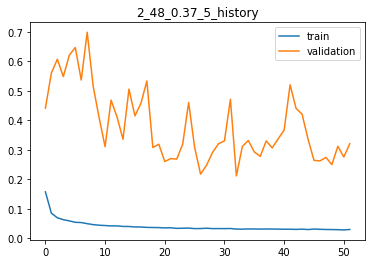

Train loss: 0.058, Val loss: 0.469, Test loss: 0.416
Train F1 metric: 0.100, Val F1 metric: 0.059, Test F1 metric: 0.051,
Train accuracy: 0.988, Val accuracy: 0.757, Test accuracy: 0.839
23911/23911 [==============================] - 4s 167us/step


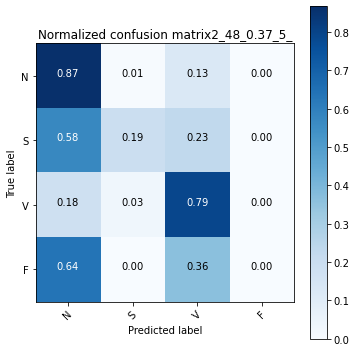

Number of leyers: 2, Number of filters: 48, Dropout rate: 0.5, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 60s 896us/step - loss: 0.1655 - f1_metric: 0.0654 - categorical_accuracy: 0.9478 - val_loss: 0.4664 - val_f1_metric: 0.0067 - val_categorical_accuracy: 0.8071

Epoch 00001: val_f1_metric improved from -inf to 0.00668, saving model to ../../models/2_48_0.50_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 57s 856us/step - loss: 0.0998 - f1_metric: 0.0857 - categorical_accuracy: 0.9692 - val_loss: 0.5132 - val_f1_metric: 0.0187 - val_categorical_accuracy: 0.6914

Epoch 00002: val_f1_metric improved from 0.00668 to 0.01870, saving model to ../../models/2_48_0.50_5_best_model.h5
Epoch 3/200
66947/66947 [==============================] - 58s 862us/step - loss: 0.0858 - f1_metric: 0.0895 - categorical_accuracy: 0.9742 - val_loss: 0.4805 - val_f1_metric: 0.0216 - val_categorical_accu


Epoch 00058: val_f1_metric did not improve from 0.02385
Epoch 59/200
66947/66947 [==============================] - 59s 879us/step - loss: 0.0428 - f1_metric: 0.0994 - categorical_accuracy: 0.9873 - val_loss: 0.3095 - val_f1_metric: 0.0079 - val_categorical_accuracy: 0.9239

Epoch 00059: val_f1_metric did not improve from 0.02385
Epoch 60/200
66947/66947 [==============================] - 58s 866us/step - loss: 0.0416 - f1_metric: 0.0991 - categorical_accuracy: 0.9874 - val_loss: 0.2831 - val_f1_metric: 0.0167 - val_categorical_accuracy: 0.9320

Epoch 00060: val_f1_metric did not improve from 0.02385
Epoch 61/200
66947/66947 [==============================] - 58s 859us/step - loss: 0.0419 - f1_metric: 0.0991 - categorical_accuracy: 0.9875 - val_loss: 0.3476 - val_f1_metric: 0.0125 - val_categorical_accuracy: 0.9282

Epoch 00061: val_f1_metric did not improve from 0.02385
Epoch 62/200
66947/66947 [==============================] - 59s 879us/step - loss: 0.0403 - f1_metric: 0.0999 - cat

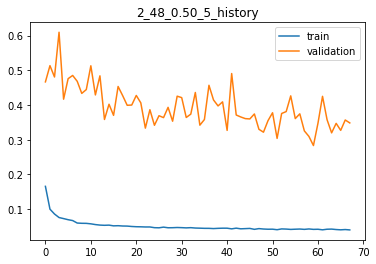

Train loss: 0.073, Val loss: 0.393, Test loss: 0.340
Train F1 metric: 0.091, Val F1 metric: 0.024, Test F1 metric: 0.041,
Train accuracy: 0.982, Val accuracy: 0.805, Test accuracy: 0.876
23911/23911 [==============================] - 4s 155us/step


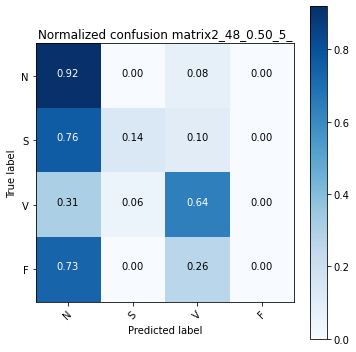

Number of leyers: 2, Number of filters: 60, Dropout rate: 0.25, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 72s 1ms/step - loss: 0.1378 - f1_metric: 0.0751 - categorical_accuracy: 0.9596 - val_loss: 0.5332 - val_f1_metric: 0.0388 - val_categorical_accuracy: 0.7498

Epoch 00001: val_f1_metric improved from -inf to 0.03876, saving model to ../../models/2_60_0.25_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 72s 1ms/step - loss: 0.0683 - f1_metric: 0.0943 - categorical_accuracy: 0.9795 - val_loss: 0.5805 - val_f1_metric: 0.0431 - val_categorical_accuracy: 0.7190

Epoch 00002: val_f1_metric improved from 0.03876 to 0.04311, saving model to ../../models/2_60_0.25_5_best_model.h5
Epoch 3/200
66947/66947 [==============================] - 70s 1ms/step - loss: 0.0557 - f1_metric: 0.0967 - categorical_accuracy: 0.9838 - val_loss: 0.6868 - val_f1_metric: 0.0549 - val_categorical_accuracy:

66947/66947 [==============================] - 70s 1ms/step - loss: 0.0211 - f1_metric: 0.1043 - categorical_accuracy: 0.9937 - val_loss: 0.3262 - val_f1_metric: 0.0418 - val_categorical_accuracy: 0.9120

Epoch 00030: val_f1_metric did not improve from 0.05493
Epoch 31/200
66947/66947 [==============================] - 73s 1ms/step - loss: 0.0198 - f1_metric: 0.1040 - categorical_accuracy: 0.9937 - val_loss: 0.3320 - val_f1_metric: 0.0492 - val_categorical_accuracy: 0.9209

Epoch 00031: val_f1_metric did not improve from 0.05493
Epoch 32/200
66947/66947 [==============================] - 72s 1ms/step - loss: 0.0201 - f1_metric: 0.1040 - categorical_accuracy: 0.9940 - val_loss: 0.4689 - val_f1_metric: 0.0474 - val_categorical_accuracy: 0.7939

Epoch 00032: val_f1_metric did not improve from 0.05493
Epoch 33/200
66947/66947 [==============================] - 71s 1ms/step - loss: 0.0210 - f1_metric: 0.1040 - categorical_accuracy: 0.9939 - val_loss: 0.2882 - val_f1_metric: 0.0461 - val_cat

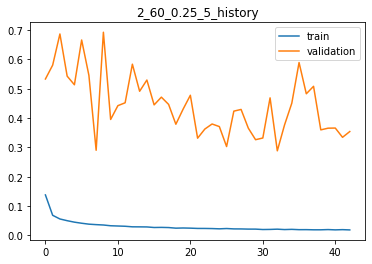

Train loss: 0.052, Val loss: 0.687, Test loss: 0.358
Train F1 metric: 0.100, Val F1 metric: 0.055, Test F1 metric: 0.051,
Train accuracy: 0.988, Val accuracy: 0.716, Test accuracy: 0.872
23911/23911 [==============================] - 5s 207us/step


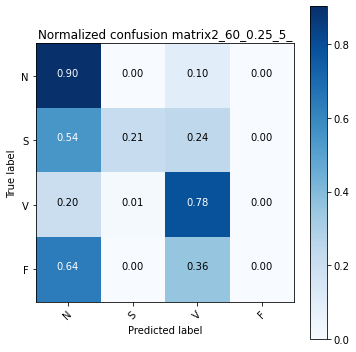

Number of leyers: 2, Number of filters: 60, Dropout rate: 0.37, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 75s 1ms/step - loss: 0.1436 - f1_metric: 0.0728 - categorical_accuracy: 0.9568 - val_loss: 0.4823 - val_f1_metric: 0.0467 - val_categorical_accuracy: 0.7581

Epoch 00001: val_f1_metric improved from -inf to 0.04672, saving model to ../../models/2_60_0.37_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 77s 1ms/step - loss: 0.0788 - f1_metric: 0.0914 - categorical_accuracy: 0.9761 - val_loss: 0.4985 - val_f1_metric: 0.0443 - val_categorical_accuracy: 0.7322

Epoch 00002: val_f1_metric did not improve from 0.04672
Epoch 3/200
66947/66947 [==============================] - 75s 1ms/step - loss: 0.0664 - f1_metric: 0.0946 - categorical_accuracy: 0.9804 - val_loss: 0.5700 - val_f1_metric: 0.0399 - val_categorical_accuracy: 0.7120

Epoch 00003: val_f1_metric did not improve from 0.0

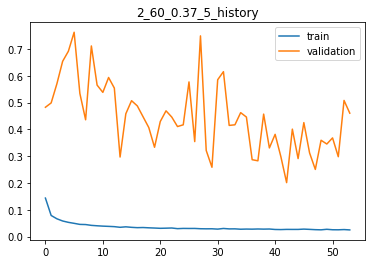

Train loss: 0.037, Val loss: 0.297, Test loss: 0.520
Train F1 metric: 0.101, Val F1 metric: 0.057, Test F1 metric: 0.054,
Train accuracy: 0.991, Val accuracy: 0.892, Test accuracy: 0.842
23911/23911 [==============================] - 3s 116us/step


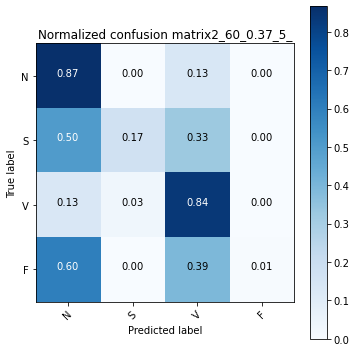

Number of leyers: 2, Number of filters: 60, Dropout rate: 0.5, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 41s 607us/step - loss: 0.1633 - f1_metric: 0.0667 - categorical_accuracy: 0.9488 - val_loss: 0.4264 - val_f1_metric: 0.0259 - val_categorical_accuracy: 0.8127

Epoch 00001: val_f1_metric improved from -inf to 0.02595, saving model to ../../models/2_60_0.50_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 41s 607us/step - loss: 0.0978 - f1_metric: 0.0861 - categorical_accuracy: 0.9691 - val_loss: 0.6054 - val_f1_metric: 0.0206 - val_categorical_accuracy: 0.6467

Epoch 00002: val_f1_metric did not improve from 0.02595
Epoch 3/200
66947/66947 [==============================] - 40s 605us/step - loss: 0.0849 - f1_metric: 0.0905 - categorical_accuracy: 0.9739 - val_loss: 0.5729 - val_f1_metric: 0.0195 - val_categorical_accuracy: 0.6608

Epoch 00003: val_f1_metric did not improve fro


Epoch 00029: val_f1_metric did not improve from 0.03341
Epoch 30/200
66947/66947 [==============================] - 41s 611us/step - loss: 0.0433 - f1_metric: 0.0984 - categorical_accuracy: 0.9870 - val_loss: 0.4145 - val_f1_metric: 0.0128 - val_categorical_accuracy: 0.8085

Epoch 00030: val_f1_metric did not improve from 0.03341
Epoch 31/200
66947/66947 [==============================] - 41s 610us/step - loss: 0.0435 - f1_metric: 0.0988 - categorical_accuracy: 0.9871 - val_loss: 0.4323 - val_f1_metric: 0.0152 - val_categorical_accuracy: 0.8082

Epoch 00031: val_f1_metric did not improve from 0.03341
Epoch 32/200
66947/66947 [==============================] - 41s 607us/step - loss: 0.0441 - f1_metric: 0.0985 - categorical_accuracy: 0.9866 - val_loss: 0.3143 - val_f1_metric: 0.0148 - val_categorical_accuracy: 0.9135

Epoch 00032: val_f1_metric did not improve from 0.03341
Epoch 33/200
66947/66947 [==============================] - 42s 624us/step - loss: 0.0428 - f1_metric: 0.0988 - cat

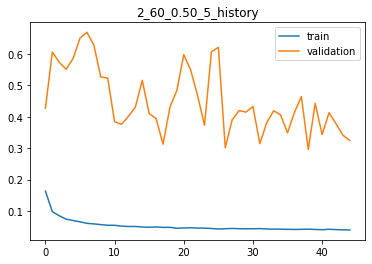

Train loss: 0.120, Val loss: 0.585, Test loss: 0.393
Train F1 metric: 0.097, Val F1 metric: 0.033, Test F1 metric: 0.050,
Train accuracy: 0.984, Val accuracy: 0.665, Test accuracy: 0.865
23911/23911 [==============================] - 3s 110us/step


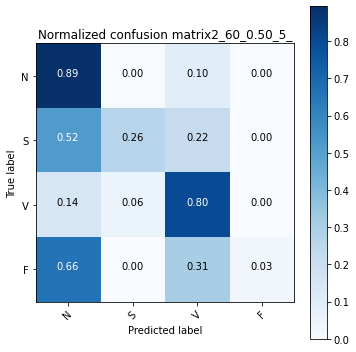

Number of leyers: 2, Number of filters: 72, Dropout rate: 0.25, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 49s 727us/step - loss: 0.1294 - f1_metric: 0.0772 - categorical_accuracy: 0.9607 - val_loss: 0.5263 - val_f1_metric: 0.0398 - val_categorical_accuracy: 0.7175

Epoch 00001: val_f1_metric improved from -inf to 0.03976, saving model to ../../models/2_72_0.25_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 48s 712us/step - loss: 0.0681 - f1_metric: 0.0943 - categorical_accuracy: 0.9798 - val_loss: 0.6798 - val_f1_metric: 0.0294 - val_categorical_accuracy: 0.6843

Epoch 00002: val_f1_metric did not improve from 0.03976
Epoch 3/200
66947/66947 [==============================] - 48s 721us/step - loss: 0.0578 - f1_metric: 0.0967 - categorical_accuracy: 0.9836 - val_loss: 0.5840 - val_f1_metric: 0.0468 - val_categorical_accuracy: 0.7320

Epoch 00003: val_f1_metric improved from 0.03

66947/66947 [==============================] - 52s 779us/step - loss: 0.0193 - f1_metric: 0.1041 - categorical_accuracy: 0.9940 - val_loss: 0.2940 - val_f1_metric: 0.0333 - val_categorical_accuracy: 0.9097

Epoch 00029: val_f1_metric did not improve from 0.05356
Epoch 30/200
66947/66947 [==============================] - 53s 786us/step - loss: 0.0191 - f1_metric: 0.1044 - categorical_accuracy: 0.9939 - val_loss: 0.3896 - val_f1_metric: 0.0502 - val_categorical_accuracy: 0.8461

Epoch 00030: val_f1_metric did not improve from 0.05356
Epoch 31/200
66947/66947 [==============================] - 49s 730us/step - loss: 0.0191 - f1_metric: 0.1043 - categorical_accuracy: 0.9941 - val_loss: 0.3083 - val_f1_metric: 0.0401 - val_categorical_accuracy: 0.9019

Epoch 00031: val_f1_metric did not improve from 0.05356
Epoch 32/200
66947/66947 [==============================] - 48s 718us/step - loss: 0.0190 - f1_metric: 0.1048 - categorical_accuracy: 0.9940 - val_loss: 0.3660 - val_f1_metric: 0.0338 -


Epoch 00058: val_f1_metric did not improve from 0.05374
Epoch 59/200
66947/66947 [==============================] - 48s 716us/step - loss: 0.0170 - f1_metric: 0.1049 - categorical_accuracy: 0.9947 - val_loss: 0.2315 - val_f1_metric: 0.0519 - val_categorical_accuracy: 0.9433

Epoch 00059: val_f1_metric did not improve from 0.05374
Epoch 60/200
66947/66947 [==============================] - 48s 714us/step - loss: 0.0161 - f1_metric: 0.1054 - categorical_accuracy: 0.9950 - val_loss: 0.3103 - val_f1_metric: 0.0412 - val_categorical_accuracy: 0.9081

Epoch 00060: val_f1_metric did not improve from 0.05374
Epoch 61/200
66947/66947 [==============================] - 46s 687us/step - loss: 0.0164 - f1_metric: 0.1050 - categorical_accuracy: 0.9947 - val_loss: 0.2053 - val_f1_metric: 0.0545 - val_categorical_accuracy: 0.9521

Epoch 00061: val_f1_metric improved from 0.05374 to 0.05448, saving model to ../../models/2_72_0.25_5_best_model.h5
Epoch 62/200
66947/66947 [=============================

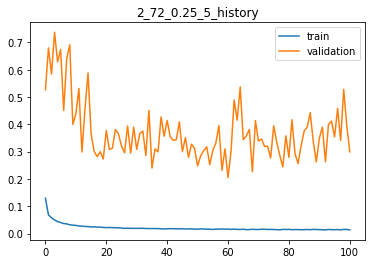

Train loss: 0.013, Val loss: 0.205, Test loss: 0.713
Train F1 metric: 0.106, Val F1 metric: 0.054, Test F1 metric: 0.053,
Train accuracy: 0.997, Val accuracy: 0.952, Test accuracy: 0.840
23911/23911 [==============================] - 3s 123us/step


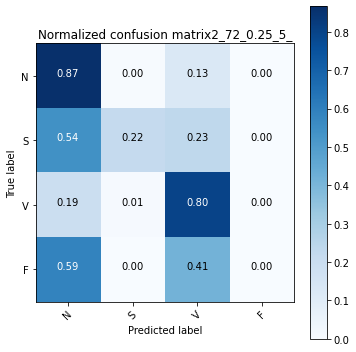

Number of leyers: 2, Number of filters: 72, Dropout rate: 0.37, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 51s 761us/step - loss: 0.1395 - f1_metric: 0.0743 - categorical_accuracy: 0.9578 - val_loss: 0.5179 - val_f1_metric: 0.0427 - val_categorical_accuracy: 0.7450

Epoch 00001: val_f1_metric improved from -inf to 0.04271, saving model to ../../models/2_72_0.37_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 52s 772us/step - loss: 0.0739 - f1_metric: 0.0926 - categorical_accuracy: 0.9777 - val_loss: 0.5662 - val_f1_metric: 0.0380 - val_categorical_accuracy: 0.7297

Epoch 00002: val_f1_metric did not improve from 0.04271
Epoch 3/200
66947/66947 [==============================] - 52s 781us/step - loss: 0.0609 - f1_metric: 0.0949 - categorical_accuracy: 0.9817 - val_loss: 0.7115 - val_f1_metric: 0.0483 - val_categorical_accuracy: 0.6873

Epoch 00003: val_f1_metric improved from 0.04

66947/66947 [==============================] - 47s 701us/step - loss: 0.0279 - f1_metric: 0.1020 - categorical_accuracy: 0.9917 - val_loss: 0.3723 - val_f1_metric: 0.0222 - val_categorical_accuracy: 0.8584

Epoch 00030: val_f1_metric did not improve from 0.04825
Epoch 31/200
66947/66947 [==============================] - 46s 689us/step - loss: 0.0282 - f1_metric: 0.1027 - categorical_accuracy: 0.9915 - val_loss: 0.2632 - val_f1_metric: 0.0426 - val_categorical_accuracy: 0.9412

Epoch 00031: val_f1_metric did not improve from 0.04825
Epoch 32/200
66947/66947 [==============================] - 46s 683us/step - loss: 0.0279 - f1_metric: 0.1025 - categorical_accuracy: 0.9917 - val_loss: 0.2368 - val_f1_metric: 0.0326 - val_categorical_accuracy: 0.9340

Epoch 00032: val_f1_metric did not improve from 0.04825
Epoch 33/200
66947/66947 [==============================] - 46s 682us/step - loss: 0.0282 - f1_metric: 0.1025 - categorical_accuracy: 0.9916 - val_loss: 0.3320 - val_f1_metric: 0.0334 -

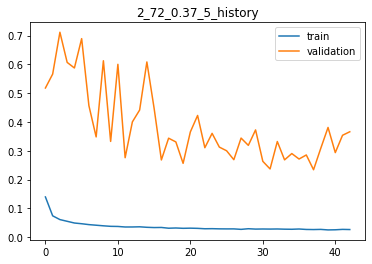

Train loss: 0.071, Val loss: 0.712, Test loss: 0.453
Train F1 metric: 0.097, Val F1 metric: 0.048, Test F1 metric: 0.050,
Train accuracy: 0.985, Val accuracy: 0.687, Test accuracy: 0.868
23911/23911 [==============================] - 3s 130us/step


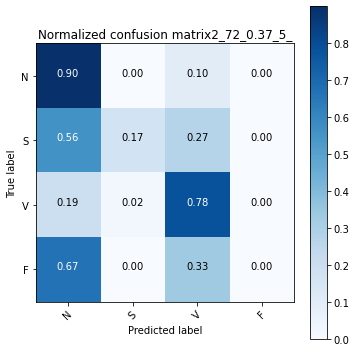

Number of leyers: 2, Number of filters: 72, Dropout rate: 0.5, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 49s 729us/step - loss: 0.1560 - f1_metric: 0.0692 - categorical_accuracy: 0.9510 - val_loss: 0.5186 - val_f1_metric: 0.0064 - val_categorical_accuracy: 0.6942

Epoch 00001: val_f1_metric improved from -inf to 0.00641, saving model to ../../models/2_72_0.50_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 57s 844us/step - loss: 0.0920 - f1_metric: 0.0882 - categorical_accuracy: 0.9712 - val_loss: 0.4777 - val_f1_metric: 0.0211 - val_categorical_accuracy: 0.7423

Epoch 00002: val_f1_metric improved from 0.00641 to 0.02109, saving model to ../../models/2_72_0.50_5_best_model.h5
Epoch 3/200
66947/66947 [==============================] - 59s 879us/step - loss: 0.0760 - f1_metric: 0.0917 - categorical_accuracy: 0.9776 - val_loss: 0.5184 - val_f1_metric: 0.0143 - val_categorical_accu


Epoch 00029: val_f1_metric did not improve from 0.02342
Epoch 30/200
66947/66947 [==============================] - 52s 780us/step - loss: 0.0412 - f1_metric: 0.0996 - categorical_accuracy: 0.9878 - val_loss: 0.3052 - val_f1_metric: 0.0156 - val_categorical_accuracy: 0.9271

Epoch 00030: val_f1_metric did not improve from 0.02342
Epoch 31/200
66947/66947 [==============================] - 47s 707us/step - loss: 0.0409 - f1_metric: 0.0993 - categorical_accuracy: 0.9879 - val_loss: 0.2933 - val_f1_metric: 0.0194 - val_categorical_accuracy: 0.9322

Epoch 00031: val_f1_metric did not improve from 0.02342
Epoch 32/200
66947/66947 [==============================] - 49s 727us/step - loss: 0.0407 - f1_metric: 0.0995 - categorical_accuracy: 0.9882 - val_loss: 0.3510 - val_f1_metric: 0.0105 - val_categorical_accuracy: 0.9231

Epoch 00032: val_f1_metric did not improve from 0.02342
Epoch 33/200
66947/66947 [==============================] - 52s 778us/step - loss: 0.0393 - f1_metric: 0.1002 - cat

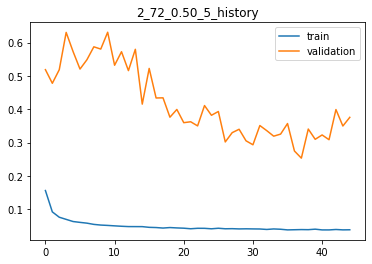

Train loss: 0.103, Val loss: 0.573, Test loss: 0.354
Train F1 metric: 0.094, Val F1 metric: 0.023, Test F1 metric: 0.043,
Train accuracy: 0.979, Val accuracy: 0.670, Test accuracy: 0.877
23911/23911 [==============================] - 3s 128us/step


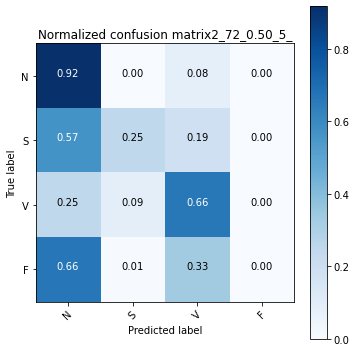

Number of leyers: 3, Number of filters: 48, Dropout rate: 0.25, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 41s 619us/step - loss: 0.1930 - f1_metric: 0.0584 - categorical_accuracy: 0.9417 - val_loss: 0.4342 - val_f1_metric: 0.0260 - val_categorical_accuracy: 0.7746

Epoch 00001: val_f1_metric improved from -inf to 0.02602, saving model to ../../models/3_48_0.25_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 40s 597us/step - loss: 0.0952 - f1_metric: 0.0870 - categorical_accuracy: 0.9707 - val_loss: 0.6023 - val_f1_metric: 0.0350 - val_categorical_accuracy: 0.6783

Epoch 00002: val_f1_metric improved from 0.02602 to 0.03505, saving model to ../../models/3_48_0.25_5_best_model.h5
Epoch 3/200
66947/66947 [==============================] - 39s 579us/step - loss: 0.0789 - f1_metric: 0.0910 - categorical_accuracy: 0.9765 - val_loss: 0.4447 - val_f1_metric: 0.0241 - val_categorical_acc

66947/66947 [==============================] - 38s 575us/step - loss: 0.0332 - f1_metric: 0.1013 - categorical_accuracy: 0.9900 - val_loss: 0.6078 - val_f1_metric: 0.0310 - val_categorical_accuracy: 0.7642

Epoch 00058: val_f1_metric did not improve from 0.05271
Epoch 59/200
66947/66947 [==============================] - 40s 596us/step - loss: 0.0348 - f1_metric: 0.1006 - categorical_accuracy: 0.9894 - val_loss: 0.2726 - val_f1_metric: 0.0333 - val_categorical_accuracy: 0.9368

Epoch 00059: val_f1_metric did not improve from 0.05271
Epoch 60/200
66947/66947 [==============================] - 38s 564us/step - loss: 0.0355 - f1_metric: 0.1009 - categorical_accuracy: 0.9896 - val_loss: 0.3834 - val_f1_metric: 0.0357 - val_categorical_accuracy: 0.8664

Epoch 00060: val_f1_metric did not improve from 0.05271
Epoch 61/200
66947/66947 [==============================] - 38s 564us/step - loss: 0.0348 - f1_metric: 0.1012 - categorical_accuracy: 0.9899 - val_loss: 0.3894 - val_f1_metric: 0.0262 -

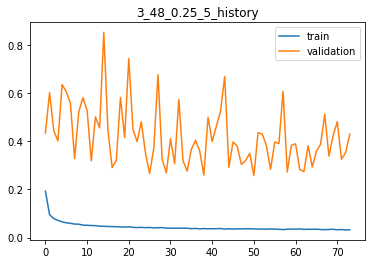

Train loss: 0.033, Val loss: 0.319, Test loss: 0.329
Train F1 metric: 0.099, Val F1 metric: 0.053, Test F1 metric: 0.051,
Train accuracy: 0.990, Val accuracy: 0.908, Test accuracy: 0.884
23911/23911 [==============================] - 2s 88us/step


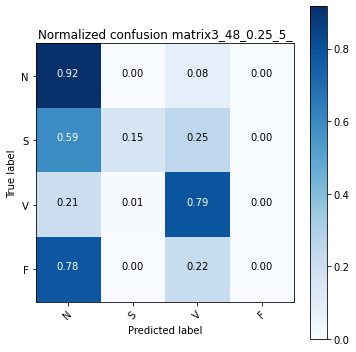

Number of leyers: 3, Number of filters: 48, Dropout rate: 0.37, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 38s 569us/step - loss: 0.2224 - f1_metric: 0.0499 - categorical_accuracy: 0.9322 - val_loss: 0.4814 - val_f1_metric: 0.0142 - val_categorical_accuracy: 0.7168

Epoch 00001: val_f1_metric improved from -inf to 0.01418, saving model to ../../models/3_48_0.37_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 38s 565us/step - loss: 0.1290 - f1_metric: 0.0755 - categorical_accuracy: 0.9581 - val_loss: 0.4939 - val_f1_metric: 0.0182 - val_categorical_accuracy: 0.6968

Epoch 00002: val_f1_metric improved from 0.01418 to 0.01816, saving model to ../../models/3_48_0.37_5_best_model.h5
Epoch 3/200
66947/66947 [==============================] - 37s 554us/step - loss: 0.1101 - f1_metric: 0.0812 - categorical_accuracy: 0.9646 - val_loss: 0.5285 - val_f1_metric: 0.0186 - val_categorical_acc

66947/66947 [==============================] - 38s 569us/step - loss: 0.0592 - f1_metric: 0.0949 - categorical_accuracy: 0.9824 - val_loss: 0.3617 - val_f1_metric: 0.0098 - val_categorical_accuracy: 0.8875

Epoch 00029: val_f1_metric did not improve from 0.03043
Epoch 30/200
66947/66947 [==============================] - 36s 544us/step - loss: 0.0571 - f1_metric: 0.0957 - categorical_accuracy: 0.9830 - val_loss: 0.3170 - val_f1_metric: 0.0119 - val_categorical_accuracy: 0.9031

Epoch 00030: val_f1_metric did not improve from 0.03043
Epoch 31/200
66947/66947 [==============================] - 37s 555us/step - loss: 0.0566 - f1_metric: 0.0961 - categorical_accuracy: 0.9829 - val_loss: 0.3960 - val_f1_metric: 0.0104 - val_categorical_accuracy: 0.8446

Epoch 00031: val_f1_metric did not improve from 0.03043
Epoch 32/200
66947/66947 [==============================] - 37s 555us/step - loss: 0.0566 - f1_metric: 0.0953 - categorical_accuracy: 0.9828 - val_loss: 0.3671 - val_f1_metric: 0.0146 -


Epoch 00087: val_f1_metric did not improve from 0.04171
Epoch 88/200
66947/66947 [==============================] - 38s 567us/step - loss: 0.0489 - f1_metric: 0.0973 - categorical_accuracy: 0.9852 - val_loss: 0.2849 - val_f1_metric: 0.0155 - val_categorical_accuracy: 0.9287

Epoch 00088: val_f1_metric did not improve from 0.04171
Epoch 89/200
66947/66947 [==============================] - 37s 551us/step - loss: 0.0507 - f1_metric: 0.0971 - categorical_accuracy: 0.9851 - val_loss: 0.2694 - val_f1_metric: 0.0234 - val_categorical_accuracy: 0.9320

Epoch 00089: val_f1_metric did not improve from 0.04171
Epoch 90/200
66947/66947 [==============================] - 36s 542us/step - loss: 0.0490 - f1_metric: 0.0977 - categorical_accuracy: 0.9857 - val_loss: 0.2993 - val_f1_metric: 0.0275 - val_categorical_accuracy: 0.9134

Epoch 00090: val_f1_metric did not improve from 0.04171
Epoch 91/200
66947/66947 [==============================] - 37s 550us/step - loss: 0.0494 - f1_metric: 0.0971 - cat

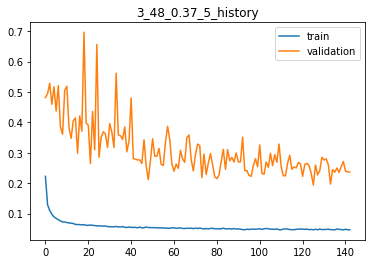

Train loss: 0.058, Val loss: 0.229, Test loss: 0.255
Train F1 metric: 0.094, Val F1 metric: 0.045, Test F1 metric: 0.043,
Train accuracy: 0.984, Val accuracy: 0.949, Test accuracy: 0.921
23911/23911 [==============================] - 2s 98us/step


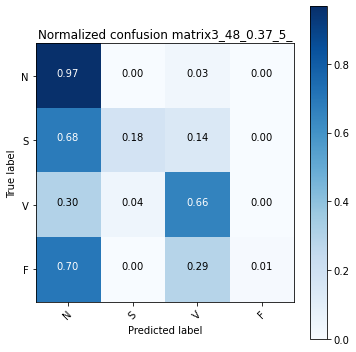

Number of leyers: 3, Number of filters: 48, Dropout rate: 0.5, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 38s 565us/step - loss: 0.2431 - f1_metric: 0.0458 - categorical_accuracy: 0.9264 - val_loss: 0.5983 - val_f1_metric: 0.0034 - val_categorical_accuracy: 0.7312

Epoch 00001: val_f1_metric improved from -inf to 0.00339, saving model to ../../models/3_48_0.50_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 37s 553us/step - loss: 0.1587 - f1_metric: 0.0665 - categorical_accuracy: 0.9464 - val_loss: 0.5145 - val_f1_metric: 0.0016 - val_categorical_accuracy: 0.7152

Epoch 00002: val_f1_metric did not improve from 0.00339
Epoch 3/200
66947/66947 [==============================] - 37s 553us/step - loss: 0.1384 - f1_metric: 0.0731 - categorical_accuracy: 0.9543 - val_loss: 0.4463 - val_f1_metric: 7.0774e-04 - val_categorical_accuracy: 0.8341

Epoch 00003: val_f1_metric did not improve

66947/66947 [==============================] - 38s 567us/step - loss: 0.0813 - f1_metric: 0.0896 - categorical_accuracy: 0.9754 - val_loss: 0.3860 - val_f1_metric: 0.0032 - val_categorical_accuracy: 0.8934

Epoch 00058: val_f1_metric did not improve from 0.01179
Epoch 59/200
66947/66947 [==============================] - 38s 569us/step - loss: 0.0767 - f1_metric: 0.0907 - categorical_accuracy: 0.9763 - val_loss: 0.3800 - val_f1_metric: 0.0027 - val_categorical_accuracy: 0.8844

Epoch 00059: val_f1_metric did not improve from 0.01179
Epoch 60/200
66947/66947 [==============================] - 37s 555us/step - loss: 0.0806 - f1_metric: 0.0902 - categorical_accuracy: 0.9754 - val_loss: 0.3467 - val_f1_metric: 0.0019 - val_categorical_accuracy: 0.9109

Epoch 00060: val_f1_metric did not improve from 0.01179
Epoch 61/200
66947/66947 [==============================] - 38s 571us/step - loss: 0.0780 - f1_metric: 0.0913 - categorical_accuracy: 0.9767 - val_loss: 0.3782 - val_f1_metric: 0.0061 -

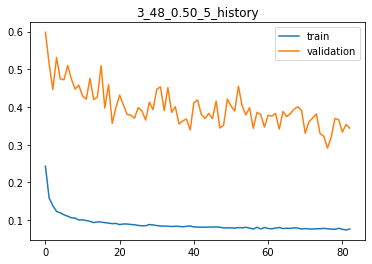

Train loss: 0.168, Val loss: 0.380, Test loss: 0.279
Train F1 metric: 0.066, Val F1 metric: 0.012, Test F1 metric: 0.029,
Train accuracy: 0.957, Val accuracy: 0.870, Test accuracy: 0.934
23911/23911 [==============================] - 2s 102us/step


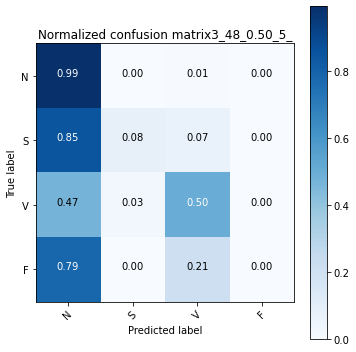

Number of leyers: 3, Number of filters: 60, Dropout rate: 0.25, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 49s 726us/step - loss: 0.1807 - f1_metric: 0.0610 - categorical_accuracy: 0.9445 - val_loss: 0.4705 - val_f1_metric: 0.0417 - val_categorical_accuracy: 0.7157

Epoch 00001: val_f1_metric improved from -inf to 0.04172, saving model to ../../models/3_60_0.25_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 47s 701us/step - loss: 0.0932 - f1_metric: 0.0871 - categorical_accuracy: 0.9708 - val_loss: 0.5509 - val_f1_metric: 0.0320 - val_categorical_accuracy: 0.7102

Epoch 00002: val_f1_metric did not improve from 0.04172
Epoch 3/200
66947/66947 [==============================] - 52s 777us/step - loss: 0.0770 - f1_metric: 0.0916 - categorical_accuracy: 0.9765 - val_loss: 0.5080 - val_f1_metric: 0.0395 - val_categorical_accuracy: 0.7263

Epoch 00003: val_f1_metric did not improve fr


Epoch 00058: val_f1_metric did not improve from 0.05044
Epoch 59/200
66947/66947 [==============================] - 42s 627us/step - loss: 0.0330 - f1_metric: 0.1015 - categorical_accuracy: 0.9905 - val_loss: 0.2890 - val_f1_metric: 0.0360 - val_categorical_accuracy: 0.9199

Epoch 00059: val_f1_metric did not improve from 0.05044
Epoch 60/200
66947/66947 [==============================] - 44s 654us/step - loss: 0.0315 - f1_metric: 0.1011 - categorical_accuracy: 0.9909 - val_loss: 0.3151 - val_f1_metric: 0.0233 - val_categorical_accuracy: 0.9326

Epoch 00060: val_f1_metric did not improve from 0.05044
Epoch 61/200
66947/66947 [==============================] - 43s 640us/step - loss: 0.0314 - f1_metric: 0.1018 - categorical_accuracy: 0.9907 - val_loss: 0.2922 - val_f1_metric: 0.0330 - val_categorical_accuracy: 0.9197

Epoch 00061: val_f1_metric did not improve from 0.05044
Epoch 00061: early stopping


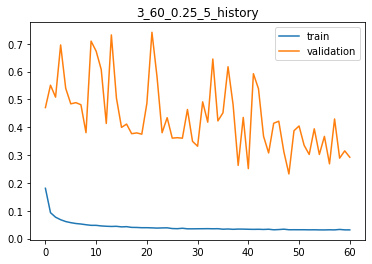

Train loss: 0.034, Val loss: 0.486, Test loss: 0.485
Train F1 metric: 0.099, Val F1 metric: 0.050, Test F1 metric: 0.050,
Train accuracy: 0.990, Val accuracy: 0.804, Test accuracy: 0.873
23911/23911 [==============================] - 3s 111us/step


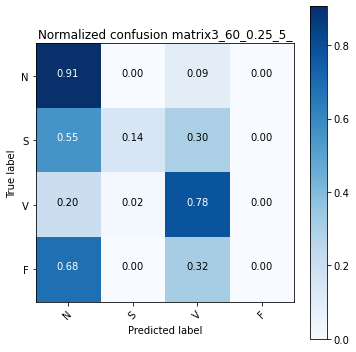

Number of leyers: 3, Number of filters: 60, Dropout rate: 0.37, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 45s 673us/step - loss: 0.2013 - f1_metric: 0.0566 - categorical_accuracy: 0.9380 - val_loss: 0.4496 - val_f1_metric: 0.0184 - val_categorical_accuracy: 0.7364

Epoch 00001: val_f1_metric improved from -inf to 0.01838, saving model to ../../models/3_60_0.37_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 45s 679us/step - loss: 0.1092 - f1_metric: 0.0826 - categorical_accuracy: 0.9655 - val_loss: 0.6234 - val_f1_metric: 0.0171 - val_categorical_accuracy: 0.6530

Epoch 00002: val_f1_metric did not improve from 0.01838
Epoch 3/200
66947/66947 [==============================] - 67s 999us/step - loss: 0.0939 - f1_metric: 0.0864 - categorical_accuracy: 0.9709 - val_loss: 0.5374 - val_f1_metric: 0.0177 - val_categorical_accuracy: 0.6849

Epoch 00003: val_f1_metric did not improve fr


Epoch 00029: val_f1_metric did not improve from 0.02775
Epoch 30/200
66947/66947 [==============================] - 46s 690us/step - loss: 0.0528 - f1_metric: 0.0964 - categorical_accuracy: 0.9845 - val_loss: 0.3761 - val_f1_metric: 0.0162 - val_categorical_accuracy: 0.8557

Epoch 00030: val_f1_metric did not improve from 0.02775
Epoch 31/200
66947/66947 [==============================] - 47s 699us/step - loss: 0.0524 - f1_metric: 0.0969 - categorical_accuracy: 0.9846 - val_loss: 0.3338 - val_f1_metric: 0.0144 - val_categorical_accuracy: 0.9037

Epoch 00031: val_f1_metric did not improve from 0.02775
Epoch 32/200
66947/66947 [==============================] - 51s 768us/step - loss: 0.0532 - f1_metric: 0.0970 - categorical_accuracy: 0.9846 - val_loss: 0.3796 - val_f1_metric: 0.0168 - val_categorical_accuracy: 0.8689

Epoch 00032: val_f1_metric did not improve from 0.02775
Epoch 33/200
66947/66947 [==============================] - 50s 744us/step - loss: 0.0521 - f1_metric: 0.0972 - cat

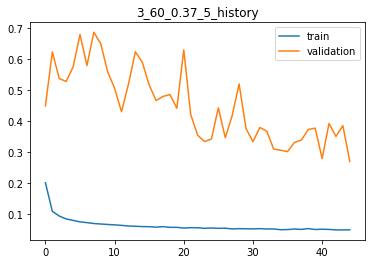

Train loss: 0.109, Val loss: 0.575, Test loss: 0.365
Train F1 metric: 0.093, Val F1 metric: 0.028, Test F1 metric: 0.042,
Train accuracy: 0.972, Val accuracy: 0.687, Test accuracy: 0.880
23911/23911 [==============================] - 3s 124us/step


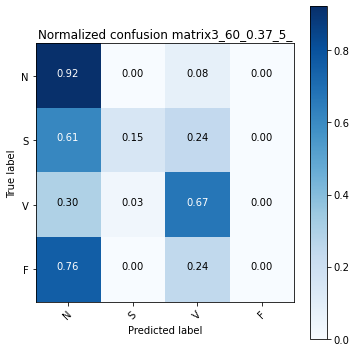

Number of leyers: 3, Number of filters: 60, Dropout rate: 0.5, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 47s 699us/step - loss: 0.2584 - f1_metric: 0.0421 - categorical_accuracy: 0.9217 - val_loss: 0.5006 - val_f1_metric: 6.5104e-04 - val_categorical_accuracy: 0.8994

Epoch 00001: val_f1_metric improved from -inf to 0.00065, saving model to ../../models/3_60_0.50_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 58s 865us/step - loss: 0.1561 - f1_metric: 0.0681 - categorical_accuracy: 0.9480 - val_loss: 0.5049 - val_f1_metric: 8.3476e-04 - val_categorical_accuracy: 0.7512

Epoch 00002: val_f1_metric improved from 0.00065 to 0.00083, saving model to ../../models/3_60_0.50_5_best_model.h5
Epoch 3/200
66947/66947 [==============================] - 49s 729us/step - loss: 0.1340 - f1_metric: 0.0750 - categorical_accuracy: 0.9564 - val_loss: 0.4320 - val_f1_metric: 0.0026 - val_categori

66947/66947 [==============================] - 43s 641us/step - loss: 0.0723 - f1_metric: 0.0922 - categorical_accuracy: 0.9780 - val_loss: 0.3436 - val_f1_metric: 0.0037 - val_categorical_accuracy: 0.8875

Epoch 00058: val_f1_metric did not improve from 0.00596
Epoch 59/200
66947/66947 [==============================] - 43s 644us/step - loss: 0.0731 - f1_metric: 0.0917 - categorical_accuracy: 0.9781 - val_loss: 0.3313 - val_f1_metric: 0.0014 - val_categorical_accuracy: 0.9035

Epoch 00059: val_f1_metric did not improve from 0.00596
Epoch 60/200
66947/66947 [==============================] - 42s 630us/step - loss: 0.0723 - f1_metric: 0.0921 - categorical_accuracy: 0.9782 - val_loss: 0.3267 - val_f1_metric: 0.0049 - val_categorical_accuracy: 0.9088

Epoch 00060: val_f1_metric did not improve from 0.00596
Epoch 61/200
66947/66947 [==============================] - 43s 637us/step - loss: 0.0736 - f1_metric: 0.0923 - categorical_accuracy: 0.9783 - val_loss: 0.2914 - val_f1_metric: 0.0029 -


Epoch 00087: val_f1_metric did not improve from 0.00690
Epoch 88/200
66947/66947 [==============================] - 46s 684us/step - loss: 0.0689 - f1_metric: 0.0932 - categorical_accuracy: 0.9791 - val_loss: 0.3372 - val_f1_metric: 0.0030 - val_categorical_accuracy: 0.9105

Epoch 00088: val_f1_metric did not improve from 0.00690
Epoch 89/200
66947/66947 [==============================] - 47s 696us/step - loss: 0.0710 - f1_metric: 0.0923 - categorical_accuracy: 0.9785 - val_loss: 0.3277 - val_f1_metric: 0.0030 - val_categorical_accuracy: 0.9058

Epoch 00089: val_f1_metric did not improve from 0.00690
Epoch 90/200
66947/66947 [==============================] - 47s 702us/step - loss: 0.0700 - f1_metric: 0.0923 - categorical_accuracy: 0.9787 - val_loss: 0.3259 - val_f1_metric: 0.0026 - val_categorical_accuracy: 0.9133

Epoch 00090: val_f1_metric did not improve from 0.00690
Epoch 91/200
66947/66947 [==============================] - 48s 710us/step - loss: 0.0703 - f1_metric: 0.0926 - cat

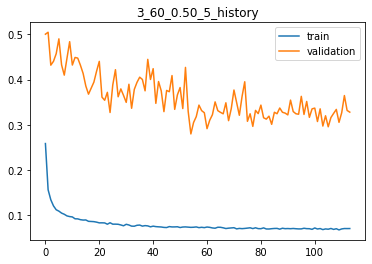

Train loss: 0.160, Val loss: 0.362, Test loss: 0.276
Train F1 metric: 0.069, Val F1 metric: 0.007, Test F1 metric: 0.024,
Train accuracy: 0.953, Val accuracy: 0.874, Test accuracy: 0.932
23911/23911 [==============================] - 3s 142us/step


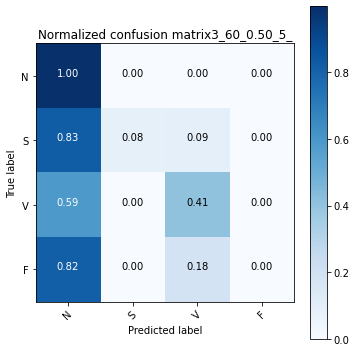

Number of leyers: 3, Number of filters: 72, Dropout rate: 0.25, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 60s 898us/step - loss: 0.1687 - f1_metric: 0.0655 - categorical_accuracy: 0.9486 - val_loss: 0.4721 - val_f1_metric: 0.0378 - val_categorical_accuracy: 0.7680

Epoch 00001: val_f1_metric improved from -inf to 0.03781, saving model to ../../models/3_72_0.25_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 70s 1ms/step - loss: 0.0864 - f1_metric: 0.0886 - categorical_accuracy: 0.9737 - val_loss: 0.6325 - val_f1_metric: 0.0262 - val_categorical_accuracy: 0.6977

Epoch 00002: val_f1_metric did not improve from 0.03781
Epoch 3/200
66947/66947 [==============================] - 67s 1ms/step - loss: 0.0719 - f1_metric: 0.0929 - categorical_accuracy: 0.9789 - val_loss: 0.6247 - val_f1_metric: 0.0200 - val_categorical_accuracy: 0.7249

Epoch 00003: val_f1_metric did not improve from 0

66947/66947 [==============================] - 52s 777us/step - loss: 0.0291 - f1_metric: 0.1017 - categorical_accuracy: 0.9913 - val_loss: 0.2771 - val_f1_metric: 0.0465 - val_categorical_accuracy: 0.9103

Epoch 00058: val_f1_metric did not improve from 0.05337
Epoch 59/200
66947/66947 [==============================] - 49s 730us/step - loss: 0.0295 - f1_metric: 0.1020 - categorical_accuracy: 0.9913 - val_loss: 0.5187 - val_f1_metric: 0.0478 - val_categorical_accuracy: 0.7802

Epoch 00059: val_f1_metric did not improve from 0.05337
Epoch 60/200
66947/66947 [==============================] - 49s 725us/step - loss: 0.0290 - f1_metric: 0.1021 - categorical_accuracy: 0.9917 - val_loss: 0.4249 - val_f1_metric: 0.0323 - val_categorical_accuracy: 0.8458

Epoch 00060: val_f1_metric did not improve from 0.05337
Epoch 61/200
66947/66947 [==============================] - 48s 721us/step - loss: 0.0300 - f1_metric: 0.1021 - categorical_accuracy: 0.9913 - val_loss: 0.2433 - val_f1_metric: 0.0374 -

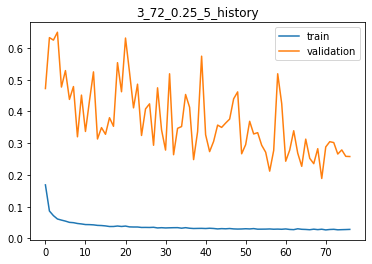

Train loss: 0.023, Val loss: 0.413, Test loss: 0.602
Train F1 metric: 0.103, Val F1 metric: 0.053, Test F1 metric: 0.052,
Train accuracy: 0.994, Val accuracy: 0.826, Test accuracy: 0.843
23911/23911 [==============================] - 4s 186us/step


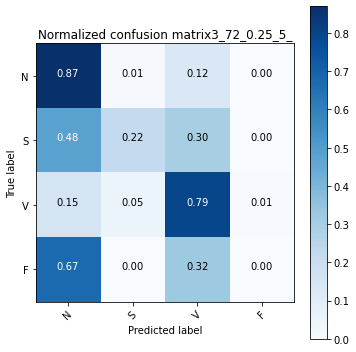

Number of leyers: 3, Number of filters: 72, Dropout rate: 0.37, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 62s 924us/step - loss: 0.1890 - f1_metric: 0.0599 - categorical_accuracy: 0.9418 - val_loss: 0.6586 - val_f1_metric: 0.0151 - val_categorical_accuracy: 0.6234

Epoch 00001: val_f1_metric improved from -inf to 0.01513, saving model to ../../models/3_72_0.37_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 54s 805us/step - loss: 0.1050 - f1_metric: 0.0839 - categorical_accuracy: 0.9663 - val_loss: 0.5494 - val_f1_metric: 0.0235 - val_categorical_accuracy: 0.6698

Epoch 00002: val_f1_metric improved from 0.01513 to 0.02353, saving model to ../../models/3_72_0.37_5_best_model.h5
Epoch 3/200
66947/66947 [==============================] - 66s 988us/step - loss: 0.0888 - f1_metric: 0.0880 - categorical_accuracy: 0.9723 - val_loss: 0.6145 - val_f1_metric: 0.0123 - val_categorical_acc

66947/66947 [==============================] - 58s 860us/step - loss: 0.0438 - f1_metric: 0.0992 - categorical_accuracy: 0.9873 - val_loss: 0.2559 - val_f1_metric: 0.0287 - val_categorical_accuracy: 0.9398

Epoch 00058: val_f1_metric did not improve from 0.04556
Epoch 59/200
66947/66947 [==============================] - 56s 833us/step - loss: 0.0437 - f1_metric: 0.0991 - categorical_accuracy: 0.9873 - val_loss: 0.2943 - val_f1_metric: 0.0219 - val_categorical_accuracy: 0.9236

Epoch 00059: val_f1_metric did not improve from 0.04556
Epoch 60/200
66947/66947 [==============================] - 56s 830us/step - loss: 0.0452 - f1_metric: 0.0987 - categorical_accuracy: 0.9867 - val_loss: 0.2351 - val_f1_metric: 0.0249 - val_categorical_accuracy: 0.9409

Epoch 00060: val_f1_metric did not improve from 0.04556
Epoch 61/200
66947/66947 [==============================] - 58s 872us/step - loss: 0.0441 - f1_metric: 0.0986 - categorical_accuracy: 0.9870 - val_loss: 0.3037 - val_f1_metric: 0.0247 -

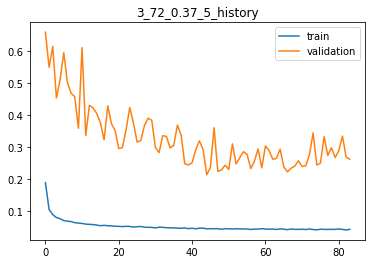

Train loss: 0.044, Val loss: 0.292, Test loss: 0.405
Train F1 metric: 0.098, Val F1 metric: 0.046, Test F1 metric: 0.046,
Train accuracy: 0.989, Val accuracy: 0.899, Test accuracy: 0.874
23911/23911 [==============================] - 3s 122us/step


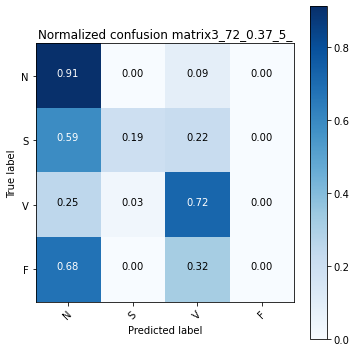

Number of leyers: 3, Number of filters: 72, Dropout rate: 0.5, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 50s 739us/step - loss: 0.2351 - f1_metric: 0.0482 - categorical_accuracy: 0.9282 - val_loss: 0.5101 - val_f1_metric: 0.0021 - val_categorical_accuracy: 0.8015

Epoch 00001: val_f1_metric improved from -inf to 0.00205, saving model to ../../models/3_72_0.50_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 49s 734us/step - loss: 0.1427 - f1_metric: 0.0721 - categorical_accuracy: 0.9536 - val_loss: 0.4694 - val_f1_metric: 7.1201e-04 - val_categorical_accuracy: 0.7562

Epoch 00002: val_f1_metric did not improve from 0.00205
Epoch 3/200
66947/66947 [==============================] - 49s 733us/step - loss: 0.1229 - f1_metric: 0.0781 - categorical_accuracy: 0.9607 - val_loss: 0.5050 - val_f1_metric: 0.0026 - val_categorical_accuracy: 0.6955

Epoch 00003: val_f1_metric improved from 0


Epoch 00028: val_f1_metric did not improve from 0.01419
Epoch 29/200
66947/66947 [==============================] - 47s 699us/step - loss: 0.0764 - f1_metric: 0.0910 - categorical_accuracy: 0.9763 - val_loss: 0.3383 - val_f1_metric: 0.0077 - val_categorical_accuracy: 0.9227

Epoch 00029: val_f1_metric did not improve from 0.01419
Epoch 30/200
66947/66947 [==============================] - 47s 702us/step - loss: 0.0785 - f1_metric: 0.0905 - categorical_accuracy: 0.9762 - val_loss: 0.4237 - val_f1_metric: 0.0054 - val_categorical_accuracy: 0.7965

Epoch 00030: val_f1_metric did not improve from 0.01419
Epoch 31/200
66947/66947 [==============================] - 47s 700us/step - loss: 0.0744 - f1_metric: 0.0914 - categorical_accuracy: 0.9773 - val_loss: 0.4167 - val_f1_metric: 0.0065 - val_categorical_accuracy: 0.8027

Epoch 00031: val_f1_metric did not improve from 0.01419
Epoch 32/200
66947/66947 [==============================] - 47s 706us/step - loss: 0.0763 - f1_metric: 0.0908 - cat

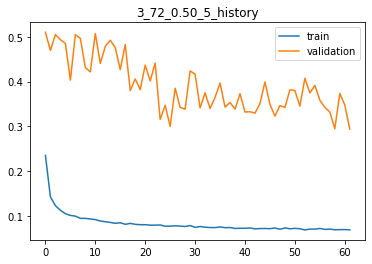

Train loss: 0.142, Val loss: 0.401, Test loss: 0.259
Train F1 metric: 0.061, Val F1 metric: 0.014, Test F1 metric: 0.029,
Train accuracy: 0.951, Val accuracy: 0.805, Test accuracy: 0.929
23911/23911 [==============================] - 3s 126us/step


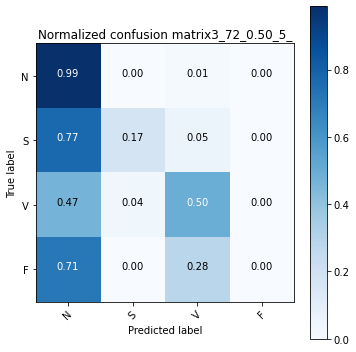

In [106]:
# monitoring F1 metric without N class
filters = [48, 60, 72]
dropout_rates = [0.25, 0.37, 0.5]
layers = [2, 3]
kernel_size = [5]
for l in layers:
    for n in filters:
        for d in dropout_rates:
            for k in kernel_size:
                print("Number of leyers: {}, Number of filters: {}, Dropout rate: {}, Kernel size: {}.".format(l, n, d, k))
                sff.full_process(train_df, val_df, test_df, l, n, d, k, 'cnn', with_standard=False)

Number of leyers: 2, Number of filters: 16, Dropout rate: 0.25, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 19s 288us/step - loss: 0.2025 - sClassRecall: 0.1413 - f1_metric: 0.5593 - categorical_accuracy: 0.9410 - val_loss: 0.3288 - val_sClassRecall: 0.0032 - val_f1_metric: 0.3050 - val_categorical_accuracy: 0.9069

Epoch 00001: val_sClassRecall improved from -inf to 0.00324, saving model to ../../models/2_16_0.25_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 19s 281us/step - loss: 0.0979 - sClassRecall: 0.4011 - f1_metric: 0.7967 - categorical_accuracy: 0.9691 - val_loss: 0.5282 - val_sClassRecall: 0.0097 - val_f1_metric: 0.1695 - val_categorical_accuracy: 0.7299

Epoch 00002: val_sClassRecall improved from 0.00324 to 0.00971, saving model to ../../models/2_16_0.25_5_best_model.h5
Epoch 3/200
66947/66947 [==============================] - 21s 314us/step - loss: 0.0821 - sClassR


Epoch 00024: val_sClassRecall did not improve from 0.01834
Epoch 25/200
66947/66947 [==============================] - 21s 308us/step - loss: 0.0410 - sClassRecall: 0.5724 - f1_metric: 0.9087 - categorical_accuracy: 0.9879 - val_loss: 0.5476 - val_sClassRecall: 0.0108 - val_f1_metric: 0.1519 - val_categorical_accuracy: 0.7507

Epoch 00025: val_sClassRecall did not improve from 0.01834
Epoch 26/200
66947/66947 [==============================] - 19s 284us/step - loss: 0.0396 - sClassRecall: 0.5710 - f1_metric: 0.9112 - categorical_accuracy: 0.9881 - val_loss: 0.4837 - val_sClassRecall: 0.0000e+00 - val_f1_metric: 0.1783 - val_categorical_accuracy: 0.7953

Epoch 00026: val_sClassRecall did not improve from 0.01834
Epoch 27/200
66947/66947 [==============================] - 21s 310us/step - loss: 0.0414 - sClassRecall: 0.5733 - f1_metric: 0.9024 - categorical_accuracy: 0.9878 - val_loss: 0.6610 - val_sClassRecall: 0.0194 - val_f1_metric: 0.1092 - val_categorical_accuracy: 0.6760

Epoch 00

66947/66947 [==============================] - 18s 275us/step - loss: 0.0360 - sClassRecall: 0.5936 - f1_metric: 0.9196 - categorical_accuracy: 0.9896 - val_loss: 0.5539 - val_sClassRecall: 0.0140 - val_f1_metric: 0.1150 - val_categorical_accuracy: 0.7428

Epoch 00049: val_sClassRecall did not improve from 0.03344
Epoch 50/200
66947/66947 [==============================] - 18s 269us/step - loss: 0.0358 - sClassRecall: 0.5900 - f1_metric: 0.9136 - categorical_accuracy: 0.9889 - val_loss: 0.3675 - val_sClassRecall: 0.0183 - val_f1_metric: 0.1881 - val_categorical_accuracy: 0.8741

Epoch 00050: val_sClassRecall did not improve from 0.03344
Epoch 51/200
66947/66947 [==============================] - 17s 255us/step - loss: 0.0353 - sClassRecall: 0.5855 - f1_metric: 0.9234 - categorical_accuracy: 0.9895 - val_loss: 0.4587 - val_sClassRecall: 0.0124 - val_f1_metric: 0.1438 - val_categorical_accuracy: 0.7795

Epoch 00051: val_sClassRecall did not improve from 0.03344
Epoch 52/200
66947/66947 [


Epoch 00073: val_sClassRecall did not improve from 0.03452
Epoch 74/200
66947/66947 [==============================] - 17s 260us/step - loss: 0.0342 - sClassRecall: 0.5956 - f1_metric: 0.9243 - categorical_accuracy: 0.9899 - val_loss: 0.6971 - val_sClassRecall: 0.0270 - val_f1_metric: 0.1475 - val_categorical_accuracy: 0.6885

Epoch 00074: val_sClassRecall did not improve from 0.03452
Epoch 75/200
66947/66947 [==============================] - 17s 256us/step - loss: 0.0336 - sClassRecall: 0.5849 - f1_metric: 0.9173 - categorical_accuracy: 0.9902 - val_loss: 0.5736 - val_sClassRecall: 0.0227 - val_f1_metric: 0.1207 - val_categorical_accuracy: 0.7526

Epoch 00075: val_sClassRecall did not improve from 0.03452
Epoch 76/200
66947/66947 [==============================] - 17s 256us/step - loss: 0.0338 - sClassRecall: 0.5958 - f1_metric: 0.9287 - categorical_accuracy: 0.9900 - val_loss: 0.4473 - val_sClassRecall: 0.0275 - val_f1_metric: 0.1552 - val_categorical_accuracy: 0.8214

Epoch 00076:


Epoch 00098: val_sClassRecall did not improve from 0.03614
Epoch 99/200
66947/66947 [==============================] - 17s 252us/step - loss: 0.0329 - sClassRecall: 0.5852 - f1_metric: 0.9158 - categorical_accuracy: 0.9899 - val_loss: 0.4298 - val_sClassRecall: 0.0383 - val_f1_metric: 0.1801 - val_categorical_accuracy: 0.8022

Epoch 00099: val_sClassRecall improved from 0.03614 to 0.03830, saving model to ../../models/2_16_0.25_5_best_model.h5
Epoch 100/200
66947/66947 [==============================] - 19s 280us/step - loss: 0.0326 - sClassRecall: 0.6025 - f1_metric: 0.9206 - categorical_accuracy: 0.9903 - val_loss: 0.4905 - val_sClassRecall: 0.0097 - val_f1_metric: 0.1277 - val_categorical_accuracy: 0.7783

Epoch 00100: val_sClassRecall did not improve from 0.03830
Epoch 101/200
66947/66947 [==============================] - 18s 263us/step - loss: 0.0336 - sClassRecall: 0.5954 - f1_metric: 0.9209 - categorical_accuracy: 0.9900 - val_loss: 0.5186 - val_sClassRecall: 0.0313 - val_f1_m


Epoch 00147: val_sClassRecall did not improve from 0.04423
Epoch 148/200
66947/66947 [==============================] - 16s 245us/step - loss: 0.0320 - sClassRecall: 0.5942 - f1_metric: 0.9187 - categorical_accuracy: 0.9905 - val_loss: 0.2852 - val_sClassRecall: 0.0307 - val_f1_metric: 0.2278 - val_categorical_accuracy: 0.9273

Epoch 00148: val_sClassRecall did not improve from 0.04423
Epoch 149/200
66947/66947 [==============================] - 17s 249us/step - loss: 0.0304 - sClassRecall: 0.5965 - f1_metric: 0.9252 - categorical_accuracy: 0.9908 - val_loss: 0.4107 - val_sClassRecall: 0.0334 - val_f1_metric: 0.1521 - val_categorical_accuracy: 0.8343

Epoch 00149: val_sClassRecall did not improve from 0.04423
Epoch 150/200
66947/66947 [==============================] - 17s 250us/step - loss: 0.0323 - sClassRecall: 0.5959 - f1_metric: 0.9205 - categorical_accuracy: 0.9904 - val_loss: 0.2531 - val_sClassRecall: 0.0340 - val_f1_metric: 0.2980 - val_categorical_accuracy: 0.9493

Epoch 001

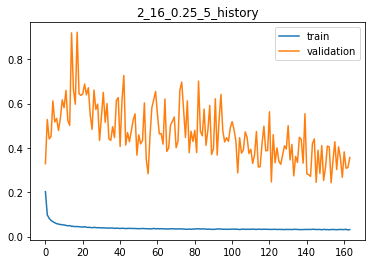

Train loss: 0.031, Val loss: 0.333, Test loss: 0.263
Train S class recall: 0.081, Val S class recall: 0.044, Test S class recall: 0.029,
Train F1 metric: 0.385, Val F1 metric: 0.184, Test F1 metric: 0.331,
Train accuracy: 0.991, Val accuracy: 0.896, Test accuracy: 0.934
23911/23911 [==============================] - 1s 59us/step


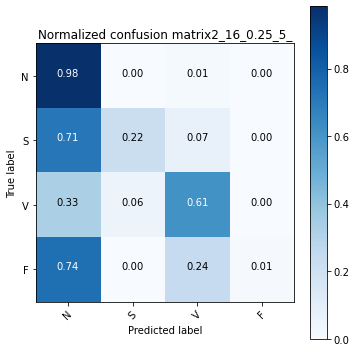

Number of leyers: 2, Number of filters: 16, Dropout rate: 0.5, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 17s 258us/step - loss: 0.2494 - sClassRecall: 0.0537 - f1_metric: 0.4733 - categorical_accuracy: 0.9276 - val_loss: 0.4665 - val_sClassRecall: 0.0000e+00 - val_f1_metric: 0.0150 - val_categorical_accuracy: 0.8500

Epoch 00001: val_sClassRecall improved from -inf to 0.00000, saving model to ../../models/2_16_0.50_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 17s 248us/step - loss: 0.1527 - sClassRecall: 0.2352 - f1_metric: 0.6649 - categorical_accuracy: 0.9493 - val_loss: 0.4373 - val_sClassRecall: 0.0065 - val_f1_metric: 0.0339 - val_categorical_accuracy: 0.8348

Epoch 00002: val_sClassRecall improved from 0.00000 to 0.00647, saving model to ../../models/2_16_0.50_5_best_model.h5
Epoch 3/200
66947/66947 [==============================] - 17s 250us/step - loss: 0.1279 - sCla

66947/66947 [==============================] - 17s 247us/step - loss: 0.0780 - sClassRecall: 0.4675 - f1_metric: 0.8366 - categorical_accuracy: 0.9767 - val_loss: 0.3962 - val_sClassRecall: 0.0065 - val_f1_metric: 0.0430 - val_categorical_accuracy: 0.8512

Epoch 00025: val_sClassRecall did not improve from 0.00971
Epoch 26/200
66947/66947 [==============================] - 17s 248us/step - loss: 0.0764 - sClassRecall: 0.4737 - f1_metric: 0.8462 - categorical_accuracy: 0.9767 - val_loss: 0.4252 - val_sClassRecall: 0.0097 - val_f1_metric: 0.0339 - val_categorical_accuracy: 0.7915

Epoch 00026: val_sClassRecall did not improve from 0.00971
Epoch 27/200
66947/66947 [==============================] - 17s 251us/step - loss: 0.0769 - sClassRecall: 0.4698 - f1_metric: 0.8427 - categorical_accuracy: 0.9771 - val_loss: 0.4087 - val_sClassRecall: 0.0097 - val_f1_metric: 0.0419 - val_categorical_accuracy: 0.8058

Epoch 00027: val_sClassRecall did not improve from 0.00971
Epoch 28/200
66947/66947 [


Epoch 00073: val_sClassRecall did not improve from 0.01834
Epoch 74/200
66947/66947 [==============================] - 22s 336us/step - loss: 0.0663 - sClassRecall: 0.4999 - f1_metric: 0.8547 - categorical_accuracy: 0.9794 - val_loss: 0.2767 - val_sClassRecall: 0.0000e+00 - val_f1_metric: 0.1493 - val_categorical_accuracy: 0.9264

Epoch 00074: val_sClassRecall did not improve from 0.01834
Epoch 75/200
66947/66947 [==============================] - 23s 337us/step - loss: 0.0683 - sClassRecall: 0.4964 - f1_metric: 0.8584 - categorical_accuracy: 0.9797 - val_loss: 0.3045 - val_sClassRecall: 0.0000e+00 - val_f1_metric: 0.1429 - val_categorical_accuracy: 0.9255

Epoch 00075: val_sClassRecall did not improve from 0.01834
Epoch 76/200
66947/66947 [==============================] - 23s 346us/step - loss: 0.0661 - sClassRecall: 0.4985 - f1_metric: 0.8568 - categorical_accuracy: 0.9796 - val_loss: 0.3199 - val_sClassRecall: 0.0000e+00 - val_f1_metric: 0.1064 - val_categorical_accuracy: 0.9209



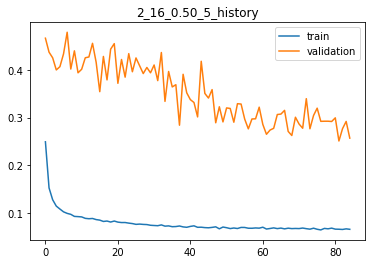

Train loss: 0.102, Val loss: 0.351, Test loss: 0.237
Train S class recall: 0.039, Val S class recall: 0.018, Test S class recall: 0.017,
Train F1 metric: 0.296, Val F1 metric: 0.103, Test F1 metric: 0.252,
Train accuracy: 0.973, Val accuracy: 0.911, Test accuracy: 0.936
23911/23911 [==============================] - 2s 82us/step


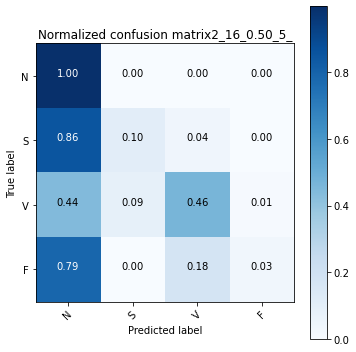

Number of leyers: 2, Number of filters: 16, Dropout rate: 0.75, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 22s 335us/step - loss: 0.3066 - sClassRecall: 0.0283 - f1_metric: 0.3839 - categorical_accuracy: 0.9157 - val_loss: 0.6097 - val_sClassRecall: 0.0000e+00 - val_f1_metric: 0.0000e+00 - val_categorical_accuracy: 0.9143

Epoch 00001: val_sClassRecall improved from -inf to 0.00000, saving model to ../../models/2_16_0.75_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 21s 311us/step - loss: 0.2344 - sClassRecall: 0.0591 - f1_metric: 0.5062 - categorical_accuracy: 0.9294 - val_loss: 0.4867 - val_sClassRecall: 0.0000e+00 - val_f1_metric: 0.0000e+00 - val_categorical_accuracy: 0.9145

Epoch 00002: val_sClassRecall did not improve from 0.00000
Epoch 3/200
66947/66947 [==============================] - 17s 261us/step - loss: 0.2162 - sClassRecall: 0.0716 - f1_metric: 0.5424 - categori

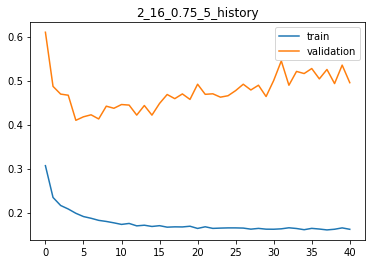

Train loss: 0.591, Val loss: 0.610, Test loss: 0.621
Train S class recall: 0.000, Val S class recall: 0.000, Test S class recall: 0.000,
Train F1 metric: 0.020, Val F1 metric: 0.000, Test F1 metric: 0.036,
Train accuracy: 0.911, Val accuracy: 0.914, Test accuracy: 0.914
23911/23911 [==============================] - 2s 66us/step


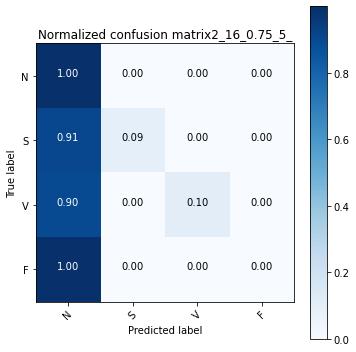

Number of leyers: 2, Number of filters: 32, Dropout rate: 0.25, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 26s 385us/step - loss: 0.1621 - sClassRecall: 0.2828 - f1_metric: 0.6573 - categorical_accuracy: 0.9518 - val_loss: 0.6291 - val_sClassRecall: 0.0129 - val_f1_metric: 0.1153 - val_categorical_accuracy: 0.6664

Epoch 00001: val_sClassRecall improved from -inf to 0.01294, saving model to ../../models/2_32_0.25_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 26s 384us/step - loss: 0.0792 - sClassRecall: 0.4811 - f1_metric: 0.8407 - categorical_accuracy: 0.9763 - val_loss: 0.7318 - val_sClassRecall: 0.0140 - val_f1_metric: 0.1451 - val_categorical_accuracy: 0.6728

Epoch 00002: val_sClassRecall improved from 0.01294 to 0.01402, saving model to ../../models/2_32_0.25_5_best_model.h5
Epoch 3/200
66947/66947 [==============================] - 25s 374us/step - loss: 0.0651 - sClassR


Epoch 00024: val_sClassRecall did not improve from 0.03533
Epoch 25/200
66947/66947 [==============================] - 25s 375us/step - loss: 0.0296 - sClassRecall: 0.6035 - f1_metric: 0.9289 - categorical_accuracy: 0.9910 - val_loss: 0.6882 - val_sClassRecall: 0.0302 - val_f1_metric: 0.1306 - val_categorical_accuracy: 0.7228

Epoch 00025: val_sClassRecall did not improve from 0.03533
Epoch 26/200
66947/66947 [==============================] - 25s 375us/step - loss: 0.0287 - sClassRecall: 0.6046 - f1_metric: 0.9338 - categorical_accuracy: 0.9915 - val_loss: 0.7257 - val_sClassRecall: 0.0318 - val_f1_metric: 0.1384 - val_categorical_accuracy: 0.7263

Epoch 00026: val_sClassRecall did not improve from 0.03533
Epoch 27/200
66947/66947 [==============================] - 25s 373us/step - loss: 0.0284 - sClassRecall: 0.6111 - f1_metric: 0.9314 - categorical_accuracy: 0.9913 - val_loss: 0.5570 - val_sClassRecall: 0.0200 - val_f1_metric: 0.1096 - val_categorical_accuracy: 0.7526

Epoch 00027:

66947/66947 [==============================] - 25s 376us/step - loss: 0.0200 - sClassRecall: 0.6131 - f1_metric: 0.9334 - categorical_accuracy: 0.9938 - val_loss: 0.3781 - val_sClassRecall: 0.0216 - val_f1_metric: 0.1908 - val_categorical_accuracy: 0.8698

Epoch 00074: val_sClassRecall did not improve from 0.04207
Epoch 75/200
66947/66947 [==============================] - 25s 376us/step - loss: 0.0204 - sClassRecall: 0.6112 - f1_metric: 0.9357 - categorical_accuracy: 0.9936 - val_loss: 0.3909 - val_sClassRecall: 0.0232 - val_f1_metric: 0.1996 - val_categorical_accuracy: 0.8503

Epoch 00075: val_sClassRecall did not improve from 0.04207
Epoch 00075: early stopping


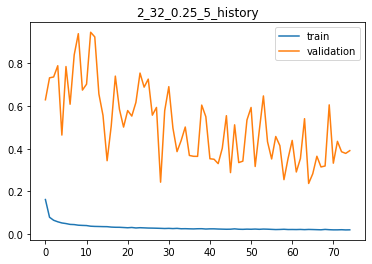

Train loss: 0.023, Val loss: 0.502, Test loss: 0.630
Train S class recall: 0.101, Val S class recall: 0.042, Test S class recall: 0.047,
Train F1 metric: 0.404, Val F1 metric: 0.142, Test F1 metric: 0.336,
Train accuracy: 0.994, Val accuracy: 0.756, Test accuracy: 0.838
23911/23911 [==============================] - 2s 76us/step


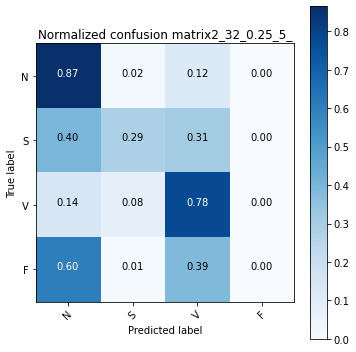

Number of leyers: 2, Number of filters: 32, Dropout rate: 0.5, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 25s 376us/step - loss: 0.1890 - sClassRecall: 0.1584 - f1_metric: 0.5844 - categorical_accuracy: 0.9421 - val_loss: 0.5418 - val_sClassRecall: 0.0097 - val_f1_metric: 0.0248 - val_categorical_accuracy: 0.7043

Epoch 00001: val_sClassRecall improved from -inf to 0.00971, saving model to ../../models/2_32_0.50_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 24s 363us/step - loss: 0.1076 - sClassRecall: 0.3858 - f1_metric: 0.7836 - categorical_accuracy: 0.9658 - val_loss: 0.5841 - val_sClassRecall: 0.0097 - val_f1_metric: 0.0292 - val_categorical_accuracy: 0.6505

Epoch 00002: val_sClassRecall did not improve from 0.00971
Epoch 3/200
66947/66947 [==============================] - 25s 377us/step - loss: 0.0941 - sClassRecall: 0.4352 - f1_metric: 0.8173 - categorical_accuracy: 0.9

66947/66947 [==============================] - 27s 399us/step - loss: 0.0457 - sClassRecall: 0.5466 - f1_metric: 0.8968 - categorical_accuracy: 0.9866 - val_loss: 0.2941 - val_sClassRecall: 0.0000e+00 - val_f1_metric: 0.1250 - val_categorical_accuracy: 0.9245

Epoch 00049: val_sClassRecall did not improve from 0.02751
Epoch 50/200
66947/66947 [==============================] - 29s 429us/step - loss: 0.0483 - sClassRecall: 0.5594 - f1_metric: 0.8924 - categorical_accuracy: 0.9857 - val_loss: 0.2674 - val_sClassRecall: 0.0000e+00 - val_f1_metric: 0.1552 - val_categorical_accuracy: 0.9372

Epoch 00050: val_sClassRecall did not improve from 0.02751
Epoch 51/200
66947/66947 [==============================] - 28s 419us/step - loss: 0.0482 - sClassRecall: 0.5612 - f1_metric: 0.8930 - categorical_accuracy: 0.9859 - val_loss: 0.2834 - val_sClassRecall: 0.0000e+00 - val_f1_metric: 0.1134 - val_categorical_accuracy: 0.9294

Epoch 00051: val_sClassRecall did not improve from 0.02751
Epoch 52/200
6

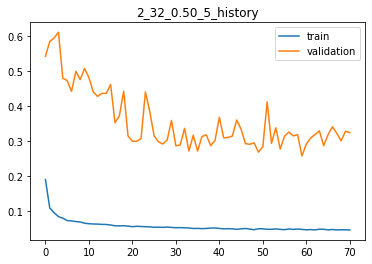

Train loss: 0.068, Val loss: 0.286, Test loss: 0.213
Train S class recall: 0.046, Val S class recall: 0.028, Test S class recall: 0.007,
Train F1 metric: 0.324, Val F1 metric: 0.159, Test F1 metric: 0.269,
Train accuracy: 0.980, Val accuracy: 0.934, Test accuracy: 0.941
23911/23911 [==============================] - 4s 184us/step


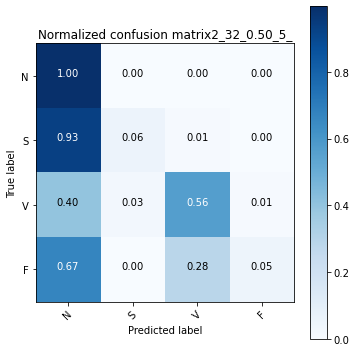

Number of leyers: 2, Number of filters: 32, Dropout rate: 0.75, Kernel size: 5.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 46s 693us/step - loss: 0.2690 - sClassRecall: 0.0441 - f1_metric: 0.4497 - categorical_accuracy: 0.9227 - val_loss: 0.5660 - val_sClassRecall: 0.0000e+00 - val_f1_metric: 0.0000e+00 - val_categorical_accuracy: 0.9117

Epoch 00001: val_sClassRecall improved from -inf to 0.00000, saving model to ../../models/2_32_0.75_5_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 42s 633us/step - loss: 0.1990 - sClassRecall: 0.0980 - f1_metric: 0.5676 - categorical_accuracy: 0.9363 - val_loss: 0.5094 - val_sClassRecall: 0.0000e+00 - val_f1_metric: 0.0000e+00 - val_categorical_accuracy: 0.8569

Epoch 00002: val_sClassRecall did not improve from 0.00000
Epoch 3/200
66947/66947 [==============================] - 46s 688us/step - loss: 0.1813 - sClassRecall: 0.1456 - f1_metric: 0.6197 - categori


Epoch 00024: val_sClassRecall did not improve from 0.00000
Epoch 25/200
66947/66947 [==============================] - 26s 393us/step - loss: 0.1329 - sClassRecall: 0.2964 - f1_metric: 0.7355 - categorical_accuracy: 0.9590 - val_loss: 0.4500 - val_sClassRecall: 0.0000e+00 - val_f1_metric: 0.0000e+00 - val_categorical_accuracy: 0.9143

Epoch 00025: val_sClassRecall did not improve from 0.00000
Epoch 26/200
66947/66947 [==============================] - 26s 394us/step - loss: 0.1329 - sClassRecall: 0.2961 - f1_metric: 0.7349 - categorical_accuracy: 0.9583 - val_loss: 0.4546 - val_sClassRecall: 0.0000e+00 - val_f1_metric: 0.0000e+00 - val_categorical_accuracy: 0.9143

Epoch 00026: val_sClassRecall did not improve from 0.00000
Epoch 27/200
66947/66947 [==============================] - 26s 393us/step - loss: 0.1288 - sClassRecall: 0.2961 - f1_metric: 0.7310 - categorical_accuracy: 0.9591 - val_loss: 0.4700 - val_sClassRecall: 0.0000e+00 - val_f1_metric: 0.0000e+00 - val_categorical_accura

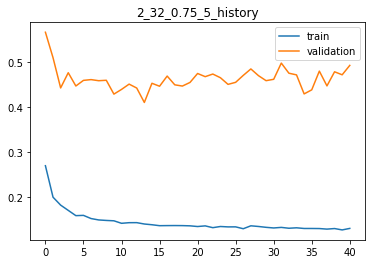

Train loss: 0.498, Val loss: 0.566, Test loss: 0.547
Train S class recall: 0.003, Val S class recall: 0.000, Test S class recall: 0.000,
Train F1 metric: 0.054, Val F1 metric: 0.000, Test F1 metric: 0.045,
Train accuracy: 0.922, Val accuracy: 0.912, Test accuracy: 0.915
23911/23911 [==============================] - 2s 80us/step


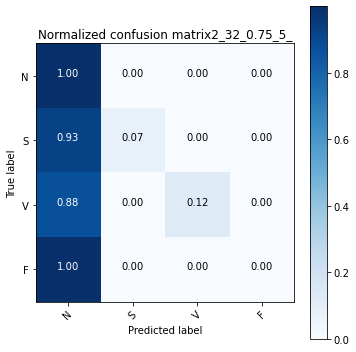

In [11]:
# monitoring S class recall
filters = [16, 32]
dropout_rates = [0.25, 0.5, 0.75]
layers = [2]
kernel_size = [5]
for l in layers:
    for n in filters:
        for d in dropout_rates:
            for k in kernel_size:
                print("Number of leyers: {}, Number of filters: {}, Dropout rate: {}, Kernel size: {}.".format(l, n, d, k))
                sff.full_process(train_df, val_df, test_df, l, n, d, k, 'cnn', with_standard=False)

Number of leyers: 1, Number of filters: 32, Dropout rate: 0.5, Kernel size: 6.
Train on 66947 samples, validate on 9860 samples
Epoch 1/200
66947/66947 [==============================] - 51s 768us/step - loss: 0.1322 - sClassRecall: 0.3597 - f1_metric: 0.7195 - categorical_accuracy: 0.9623 - val_loss: 0.6806 - val_sClassRecall: 0.0129 - val_f1_metric: 0.1607 - val_categorical_accuracy: 0.7370

Epoch 00001: val_sClassRecall improved from -inf to 0.01294, saving model to ../../models/1_32_0.50_6_best_model.h5
Epoch 2/200
66947/66947 [==============================] - 53s 789us/step - loss: 0.0631 - sClassRecall: 0.5266 - f1_metric: 0.8777 - categorical_accuracy: 0.9819 - val_loss: 0.6702 - val_sClassRecall: 0.0140 - val_f1_metric: 0.1597 - val_categorical_accuracy: 0.7972

Epoch 00002: val_sClassRecall improved from 0.01294 to 0.01402, saving model to ../../models/1_32_0.50_6_best_model.h5
Epoch 3/200
66947/66947 [==============================] - 52s 775us/step - loss: 0.0506 - sClassRe

66947/66947 [==============================] - 85s 1ms/step - loss: 0.0153 - sClassRecall: 0.6206 - f1_metric: 0.9479 - categorical_accuracy: 0.9952 - val_loss: 0.8029 - val_sClassRecall: 0.0763 - val_f1_metric: 0.1450 - val_categorical_accuracy: 0.7598

Epoch 00024: val_sClassRecall improved from 0.04542 to 0.07627, saving model to ../../models/1_32_0.50_6_best_model.h5
Epoch 25/200
66947/66947 [==============================] - 80s 1ms/step - loss: 0.0158 - sClassRecall: 0.6351 - f1_metric: 0.9444 - categorical_accuracy: 0.9951 - val_loss: 0.5307 - val_sClassRecall: 0.0406 - val_f1_metric: 0.1950 - val_categorical_accuracy: 0.8399

Epoch 00025: val_sClassRecall did not improve from 0.07627
Epoch 26/200
66947/66947 [==============================] - 89s 1ms/step - loss: 0.0148 - sClassRecall: 0.6293 - f1_metric: 0.9434 - categorical_accuracy: 0.9956 - val_loss: 0.4214 - val_sClassRecall: 0.0557 - val_f1_metric: 0.2221 - val_categorical_accuracy: 0.8796

Epoch 00026: val_sClassRecall d


Epoch 00048: val_sClassRecall did not improve from 0.08236
Epoch 49/200
66947/66947 [==============================] - 75s 1ms/step - loss: 0.0104 - sClassRecall: 0.6582 - f1_metric: 0.9592 - categorical_accuracy: 0.9968 - val_loss: 0.4047 - val_sClassRecall: 0.0631 - val_f1_metric: 0.2782 - val_categorical_accuracy: 0.8895

Epoch 00049: val_sClassRecall did not improve from 0.08236
Epoch 50/200
66947/66947 [==============================] - 66s 986us/step - loss: 0.0092 - sClassRecall: 0.6488 - f1_metric: 0.9557 - categorical_accuracy: 0.9971 - val_loss: 0.3497 - val_sClassRecall: 0.0388 - val_f1_metric: 0.2825 - val_categorical_accuracy: 0.9251

Epoch 00050: val_sClassRecall did not improve from 0.08236
Epoch 51/200
66947/66947 [==============================] - 71s 1ms/step - loss: 0.0109 - sClassRecall: 0.6480 - f1_metric: 0.9528 - categorical_accuracy: 0.9964 - val_loss: 0.5468 - val_sClassRecall: 0.0718 - val_f1_metric: 0.2131 - val_categorical_accuracy: 0.8616

Epoch 00051: val

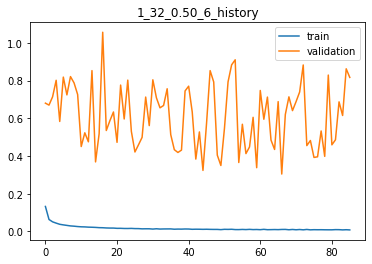

Train loss: 0.008, Val loss: 0.574, Test loss: 0.764
Train S class recall: 0.124, Val S class recall: 0.082, Test S class recall: 0.054,
Train F1 metric: 0.425, Val F1 metric: 0.243, Test F1 metric: 0.326,
Train accuracy: 0.998, Val accuracy: 0.861, Test accuracy: 0.831
23911/23911 [==============================] - 3s 130us/step


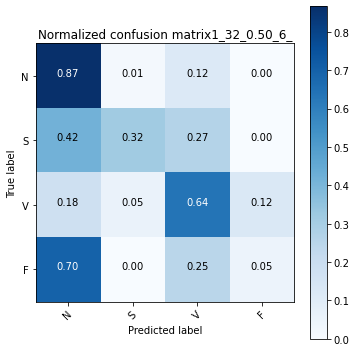

In [13]:
filters = [32]
dropout_rates = [0.5]
layers = [1]
kernel_size = [6]
for l in layers:
    for n in filters:
        for d in dropout_rates:
            for k in kernel_size:
                print("Number of leyers: {}, Number of filters: {}, Dropout rate: {}, Kernel size: {}.".format(l, n, d, k))
                sff.full_process(train_df, val_df, test_df, l, n, d, k, 'cnn', with_standard=False)

In [14]:
def sClassRecall(y_true, y_pred):
    true_positive_s = K.sum(K.round(K.clip(y_true[:,1] * y_pred[:,1], 0, 1)))
    possible_positive_s = K.sum(K.round(K.clip(y_true[:,1], 0, 1)))
    recall_s = true_positive_s / (possible_positive_s + K.epsilon())
    return recall_s

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true[:,1:] * y_pred[:,1:], 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true[:,1:], 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred[:,1:], 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [19]:
from keras.models import load_model
import keras.backend as K
saved_model = load_model('../../models/1_32_0.50_6_best_model.h5', custom_objects={'f1_metric': f1_metric, 'sClassRecall': sClassRecall})

In [21]:
from keras.utils.np_utils import to_categorical
x_test = test_df.drop(columns=['Patient_number', 'Label', 'Label_class', 'Output_label']).values
import numpy as np
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = to_categorical(test_df.Output_label)

In [23]:
from sklearn.metrics import confusion_matrix
y_pred = saved_model.predict_proba(x_test, batch_size=32, verbose=1)
# Compute confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

23911/23911 [==============================] - 3s 115us/step


In [24]:
cm

array([[18770,   307,  2515,    72],
       [  130,    98,    83,     0],
       [  284,    85,   993,   194],
       [  265,     1,    95,    19]])

In [25]:
def modelEvaluator(cm):
    # actual normal
    Nn = cm[0,0]
    Ns = cm[0,1]
    Nv = cm[0,2]
    Nf = cm[0,3]
    # actual Supraventricular
    Sn = cm[1,0]
    Ss = cm[1,1]
    Sv = cm[1,2]
    Sf = cm[1,3]
    # actual Ventricular
    Vn = cm[2,0]
    Vs = cm[2,1]
    Vv = cm[2,2]
    Vf = cm[2,3]
    # actual Fusion
    Fn = cm[3,0]
    Fs = cm[3,1]
    Fv = cm[3,2]
    Ff = cm[3,3]
    
    sum_all = np.sum(cm)
    
    # metrics for distinguishing ventricular ectopic beats
    TNv = Nn + Ns + Nf + Sn + Ss + Sf + Fn + Fs + Ff # (True negative V)
    FPv = Nv + Sv #(False positive V)
    fprV = FPv / (TNv + FPv) #(false positive rate V)
    FNv = Vn + Vs +Vf # (False negative V)
    TPv = Vv #(True positive V)
    SeV = TPv / (TPv + FNv) #(sensitivity or recall V)
    PrV = TPv / (TPv + FPv) #(positive predictivity or precision V)
    AccV = (TPv + TNv) / (TPv + TNv + FPv + FNv) #(Accuracy V)
    
    
    # metrics for distinguishing supraventricular ectopic beats
    TNs = Nn + Nv + Nf + Vn + Vv + Vf + Fn + Fv + Ff #(True negative S)
    FPs= Ns + Vs + Fs #(False positive S)
    fprS = FPs / (TNs + FPs) #(false positive rate S)
    FNs = Sn + Sv +Sf #(False negative S)
    TPs = Ss #(True positive S)
    SeS = TPs / (TPs + FNs) #( sensitivity or recall S)
    PrS = TPs / (TPs + FPs) #(positive predictivity or precision S)
    AccS = (TPs + TNs) / (TPs + TNs + FPs + FNs) #(Accuracy S)
    
    # metrics for distinguishing all beats
    TN = Nn #(True negative)
    TPf = Ff
    Sp = TN/sum_all
    sum_f = Fn + Fs + Fv + Ff
    SeF = TPf/sum_f
    Acc = (TN + TPs + TPv + TPf)/sum_all
    
    return_array = [SeV, PrV, fprV, AccV, SeS, PrS, fprS, AccS, SeF, Sp, Acc]
    return return_array

In [26]:
return_array = modelEvaluator(cm)
return_array = pd.Series(return_array, index=['SeV', 'PrV', 'fprV', 'AccV', 'SeS', 'PrS', 'fprS', 'AccS', 'SeF', 'Sp', 'Acc'])
return_array

SeV     0.638175
PrV     0.276525
fprV    0.116712
AccV    0.867274
SeS     0.315113
PrS     0.199593
fprS    0.016653
AccS    0.974656
SeF     0.050000
Sp      0.784994
Acc     0.831417
dtype: float64

Although the sensitivity of both S and V are low, it would have been acceptable if the precision was higher. Next I will try balancing the labels by introducing 'synthetic' heartbeats. To generate the synthetic heartbeat each point was drown from a normal distribution having a mean and standard deviation the same as the corresponding feature in the training data. See Jupyter_notebooks/Processing/synthetic_beats.ipynb notebook for more details.

In [12]:
synthetic_S = pd.read_csv('../../Data_processed/synthetic_Sclass_014162020.csv')
synthetic_V = pd.read_csv('../../Data_processed/synthetic_Vclass_04162020.csv')
synthetic_F = pd.read_csv('../../Data_processed/synthetic_Fclass_04162020.csv')
synthetic_S.head()

0         1         2         3         4         5         6  \
0  0.084757 -0.070643  0.110277  0.069116 -0.039138  0.031921  0.025804   
1  0.051710  0.061272 -0.015748  0.038564 -0.079247 -0.019047 -0.022060   
2 -0.002375  0.011965  0.065063  0.014568  0.003665 -0.062821 -0.036320   
3 -0.025367  0.000168  0.075456  0.074969 -0.056863  0.029478  0.143039   
4  0.020416 -0.010197  0.038595  0.031694  0.079895 -0.017295  0.028758   

          7         8         9  ...       354       355       356       357  \
0  0.079907  0.061559  0.027457  ...  0.062552 -0.069552 -0.010937 -0.020982   
1  0.001146 -0.037685  0.005643  ... -0.014346 -0.003737 -0.016546  0.048513   
2 -0.014266 -0.038762 -0.023715  ...  0.029766 -0.044652 -0.010059  0.003651   
3  0.037390 -0.049509  0.015680  ... -0.019176  0.063177  0.023867 -0.024549   
4 -0.102490 -0.049936  0.086480  ... -0.001716  0.024276 -0.026581  0.024120   

        358       359  Patient_number  Label  Label_class  Output_label  
0  0.014352  0.031253             999   SynS            S           1.0  
1  0.041356  0.003243             999   SynS            S           1.0  
2  0.033146  0.005744             999   SynS            S           1.0  
3  0.039928  0.008647             999   SynS            S           1.0  
4  0.004354  0.036099             999   SynS            S           1.0  

[5 rows x 364 columns]

In [13]:
# concatenate synthetic beat classes to the training data and make sure the resulting dataframe has a correct shape.
train_len = len(train_df)
synth_S = len(synthetic_S)
synth_V = len(synthetic_V)
synth_F = len(synthetic_F)
train_df = pd.concat([train_df, synthetic_S, synthetic_V, synthetic_F], axis=0, ignore_index=True)
assert len(train_df) == train_len+synth_S+synth_V+synth_F

In [14]:
len(train_df)

237784

Number of leyers: 2, Number of filters: 60, Dropout rate: 0.33, Kernel size: 6.
Class weights [(1, 0.0), (1, 1.0), (1, 2.0), (1, 3.0)]
Train on 237784 samples, validate on 9860 samples
Epoch 1/200
237784/237784 [==============================] - 239s 1ms/step - loss: 0.0782 - sClassRecall: 0.9680 - f1_metric: 0.9821 - categorical_accuracy: 0.9780 - val_loss: 0.7290 - val_sClassRecall: 0.0883 - val_f1_metric: 0.0354 - val_categorical_accuracy: 0.6599

Epoch 00001: val_f1_metric improved from -inf to 0.03540, saving model to ../../models/2_60_0.33_6_best_model.h5
Epoch 2/200
237784/237784 [==============================] - 277s 1ms/step - loss: 0.0307 - sClassRecall: 0.9852 - f1_metric: 0.9936 - categorical_accuracy: 0.9911 - val_loss: 0.5224 - val_sClassRecall: 0.1474 - val_f1_metric: 0.2235 - val_categorical_accuracy: 0.7293

Epoch 00002: val_f1_metric improved from 0.03540 to 0.22346, saving model to ../../models/2_60_0.33_6_best_model.h5
Epoch 3/200
237784/237784 [===================


Epoch 00023: val_f1_metric did not improve from 0.62358
Epoch 24/200
237784/237784 [==============================] - 247s 1ms/step - loss: 0.0122 - sClassRecall: 0.9930 - f1_metric: 0.9973 - categorical_accuracy: 0.9963 - val_loss: 0.2106 - val_sClassRecall: 0.1026 - val_f1_metric: 0.6047 - val_categorical_accuracy: 0.9484

Epoch 00024: val_f1_metric did not improve from 0.62358
Epoch 25/200
237784/237784 [==============================] - 250s 1ms/step - loss: 0.0118 - sClassRecall: 0.9933 - f1_metric: 0.9975 - categorical_accuracy: 0.9965 - val_loss: 0.1650 - val_sClassRecall: 0.0776 - val_f1_metric: 0.6344 - val_categorical_accuracy: 0.9683

Epoch 00025: val_f1_metric improved from 0.62358 to 0.63438, saving model to ../../models/2_60_0.33_6_best_model.h5
Epoch 26/200
237784/237784 [==============================] - 352s 1ms/step - loss: 0.0120 - sClassRecall: 0.9933 - f1_metric: 0.9974 - categorical_accuracy: 0.9965 - val_loss: 0.2165 - val_sClassRecall: 0.1137 - val_f1_metric: 0

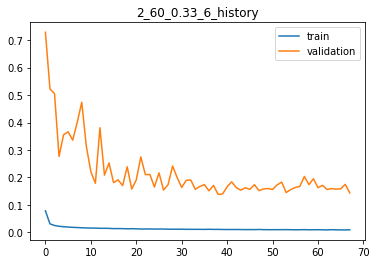

Train loss: 0.031, Val loss: 0.174, Test loss: 0.812
Train S class recall: 0.252, Val S class recall: 0.006, Test S class recall: 0.013,
Train F1 metric: 0.816, Val F1 metric: 0.415, Test F1 metric: 0.274,
Train accuracy: 0.991, Val accuracy: 0.962, Test accuracy: 0.749
23911/23911 [==============================] - 5s 198us/step
[[16611     5  5040     8]
 [  185    43    83     0]
 [  297     3  1256     0]
 [  218     0   162     0]]


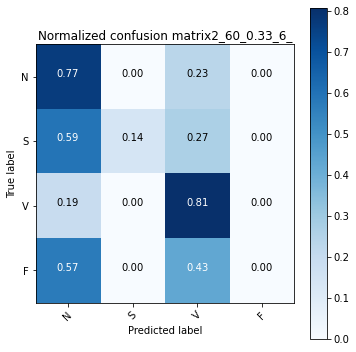

In [70]:
# drop out layer in the final dense layer, validation weights are 1 for all classses
filters = [60]
dropout_rates = [0.33]
layers = [2]
kernel_size = [6]
for l in layers:
    for n in filters:
        for d in dropout_rates:
            for k in kernel_size:
                print("Number of leyers: {}, Number of filters: {}, Dropout rate: {}, Kernel size: {}.".format(l, n, d, k))
                sff.full_process(train_df, val_df, test_df, l, n, d, k, 'cnn', with_standard=False)

In [72]:
cm = np.array([[16611, 5, 5040, 8],
 [185, 43, 83, 0],
 [297, 3, 1256, 0],
 [218, 0, 162, 0]])
return_array = modelEvaluator(cm)
return_array = pd.Series(return_array, index=['SeV', 'PrV', 'fprV', 'AccV', 'SeS', 'PrS', 'fprS', 'AccS', 'SeF', 'Sp', 'Acc'])
return_array

SeV     0.807198
PrV     0.196896
fprV    0.230839
AccV    0.771654
SeS     0.138264
PrS     0.843137
fprS    0.000339
AccS    0.988457
SeF     0.000000
Sp      0.694701
Acc     0.749028
dtype: float64

Number of leyers: 3, Number of filters: 32, Dropout rate: 0.25, Kernel size: 5.
Class weights [(1, 0.0), (1, 1.0), (1, 2.0), (1, 3.0)]
Train on 237784 samples, validate on 9860 samples
Epoch 1/100
237784/237784 [==============================] - 127s 532us/step - loss: 0.1692 - sClassRecall: 0.9068 - f1_metric: 0.9475 - categorical_accuracy: 0.9519 - val_loss: 0.9196 - val_sClassRecall: 0.2373 - val_f1_metric: 0.0476 - val_categorical_accuracy: 0.4170

Epoch 00001: val_f1_metric improved from -inf to 0.04761, saving model to ../../models/3_32_0.25_5_best_model.h5
Epoch 2/100
237784/237784 [==============================] - 134s 564us/step - loss: 0.0443 - sClassRecall: 0.9817 - f1_metric: 0.9905 - categorical_accuracy: 0.9868 - val_loss: 0.6458 - val_sClassRecall: 0.1997 - val_f1_metric: 0.1747 - val_categorical_accuracy: 0.7126

Epoch 00002: val_f1_metric improved from 0.04761 to 0.17467, saving model to ../../models/3_32_0.25_5_best_model.h5
Epoch 3/100
237784/237784 [===============

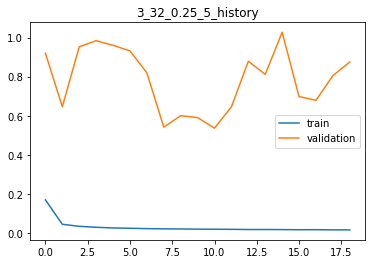

Train loss: 0.084, Val loss: 0.600, Test loss: 0.697
Train S class recall: 0.260, Val S class recall: 0.004, Test S class recall: 0.023,
Train F1 metric: 0.815, Val F1 metric: 0.194, Test F1 metric: 0.313,
Train accuracy: 0.982, Val accuracy: 0.749, Test accuracy: 0.740
23911/23911 [==============================] - 3s 146us/step
[[16405   451  2727  2081]
 [  147    56    96    12]
 [  298    38  1215     5]
 [  181     3   189     7]]


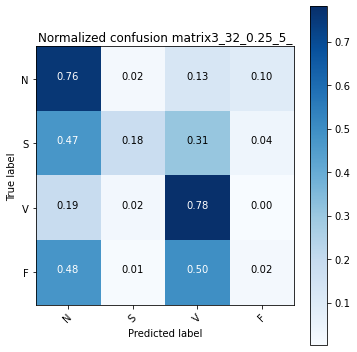

In [76]:
filters = [32]
dropout_rates = [0.25]
layers = [3]
kernel_size = [5]
for l in layers:
    for n in filters:
        for d in dropout_rates:
            for k in kernel_size:
                print("Number of leyers: {}, Number of filters: {}, Dropout rate: {}, Kernel size: {}.".format(l, n, d, k))
                sff.full_process(train_df, val_df, test_df, l, n, d, k, 'cnn', with_standard=False)

Number of leyers: 2, Number of filters: 60, Dropout rate: 0.25, Kernel size: 6.
Class weights [(1, 0.0), (1, 1.0), (1, 2.0), (1, 3.0)]


/Users/zhannahakhverdyan/anaconda3/envs/mit-bih-arrhythmia-database-1.0.0/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Train on 237784 samples, validate on 9860 samples
Epoch 1/100
237784/237784 [==============================] - 237s 995us/step - loss: 0.0646 - sClassRecall: 0.9732 - f1_metric: 0.9845 - categorical_accuracy: 0.9815 - val_loss: 4.3844 - val_sClassRecall: 0.1364 - val_f1_metric: 0.0122 - val_categorical_accuracy: 0.6974

Epoch 00001: val_f1_metric improved from -inf to 0.01216, saving model to ../../models/2_60_0.25_6_best_model.h5
Epoch 2/100
237784/237784 [==============================] - 245s 1ms/step - loss: 0.0209 - sClassRecall: 0.9901 - f1_metric: 0.9958 - categorical_accuracy: 0.9941 - val_loss: 6.4749 - val_sClassRecall: 0.0776 - val_f1_metric: 0.3138 - val_categorical_accuracy: 0.8387

Epoch 00002: val_f1_metric improved from 0.01216 to 0.31377, saving model to ../../models/2_60_0.25_6_best_model.h5
Epoch 3/100
237784/237784 [==============================] - 247s 1ms/step - loss: 0.0166 - sClassRecall: 0.9918 - f1_metric: 0.9966 - categorical_accuracy: 0.9953 - val_loss: 6.7

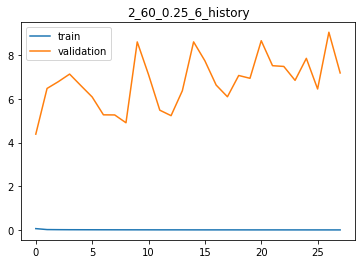

Train loss: 0.009, Val loss: 0.157, Test loss: 0.556
Train S class recall: 0.259, Val S class recall: 0.010, Test S class recall: 0.021,
Train F1 metric: 0.827, Val F1 metric: 0.384, Test F1 metric: 0.310,
Train accuracy: 0.997, Val accuracy: 0.970, Test accuracy: 0.824
23911/23911 [==============================] - 9s 389us/step
[[18357     7  3215    85]
 [  178    57    76     0]
 [  249    56  1244     7]
 [  250     0    79    51]]


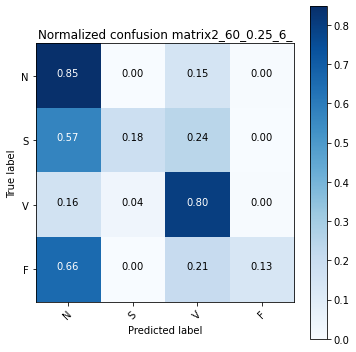

In [104]:
# eliminated the dropout from the last dense layer and adjusted class weights for Val loss claculation 
# [0:1, 1:70, 2:14, 3:1]
filters = [60]
dropout_rates = [0.25]
layers = [2]
kernel_size = [6]
for l in layers:
    for n in filters:
        for d in dropout_rates:
            for k in kernel_size:
                print("Number of leyers: {}, Number of filters: {}, Dropout rate: {}, Kernel size: {}.".format(l, n, d, k))
                sff.full_process(train_df, val_df, test_df, l, n, d, k, 'cnn', with_standard=False)

In [113]:
importlib.reload(sff)

<module 'standard_mlp_cnn_fitting_funcs' from '/Users/zhannahakhverdyan/Springboard/Capstone2/src/standard_mlp_cnn_fitting_funcs.py'>

Number of leyers: 2, Number of filters: 32, Dropout rate: 0.33, Kernel size: 6.


/Users/zhannahakhverdyan/anaconda3/envs/mit-bih-arrhythmia-database-1.0.0/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Class weights [(1, 0.0), (1, 1.0), (1, 2.0), (1, 3.0)]
Train on 237784 samples, validate on 9860 samples
Epoch 1/100
237784/237784 [==============================] - 239s 1ms/step - loss: 0.1238 - sClassRecall: 0.9539 - f1_metric: 0.9720 - categorical_accuracy: 0.9678 - val_loss: 11.4828 - val_sClassRecall: 0.0000e+00 - val_f1_metric: 0.0000e+00 - val_categorical_accuracy: 0.9142

Epoch 00001: val_loss improved from inf to 11.48279, saving model to ../../models/2_32_0.33_6_best_model.h5
Epoch 2/100
237784/237784 [==============================] - 205s 863us/step - loss: 0.0298 - sClassRecall: 0.9861 - f1_metric: 0.9941 - categorical_accuracy: 0.9918 - val_loss: 11.4156 - val_sClassRecall: 0.0750 - val_f1_metric: 0.1196 - val_categorical_accuracy: 0.8903

Epoch 00002: val_loss improved from 11.48279 to 11.41563, saving model to ../../models/2_32_0.33_6_best_model.h5
Epoch 3/100
237784/237784 [==============================] - 205s 864us/step - loss: 0.0230 - sClassRecall: 0.9886 - f1_me

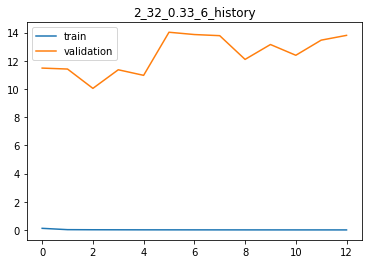

Train loss: 0.032, Val loss: 0.313, Test loss: 0.266
Train S class recall: 0.256, Val S class recall: 0.013, Test S class recall: 0.009,
Train F1 metric: 0.813, Val F1 metric: 0.178, Test F1 metric: 0.326,
Train accuracy: 0.994, Val accuracy: 0.863, Test accuracy: 0.902
23911/23911 [==============================] - 5s 194us/step
[[20452    23  1182     7]
 [  215    38    58     0]
 [  468    34  1053     1]
 [  236     0   128    16]]


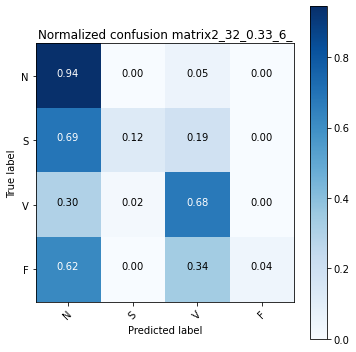

In [115]:
# eliminated the dropout from the last dense layer and adjusted class weights for Val loss claculation 
# [0:1, 1:70, 2:14, 3:493]
# added a conv layer without fropout right after input with k/2 kernel size
filters = [32]
dropout_rates = [0.33]
layers = [2]
kernel_size = [6]
for l in layers:
    for n in filters:
        for d in dropout_rates:
            for k in kernel_size:
                print("Number of leyers: {}, Number of filters: {}, Dropout rate: {}, Kernel size: {}.".format(l, n, d, k))
                sff.full_process(train_df, val_df, test_df, l, n, d, k, 'cnn', with_standard=False)

Number of leyers: 2, Number of filters: 32, Dropout rate: 0.4, Kernel size: 6.


/Users/zhannahakhverdyan/anaconda3/envs/mit-bih-arrhythmia-database-1.0.0/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Class weights [(1, 0.0), (1, 1.0), (1, 2.0), (1, 3.0)]
Train on 237784 samples, validate on 9860 samples
Epoch 1/100
237784/237784 [==============================] - 255s 1ms/step - loss: 0.1343 - sClassRecall: 0.9580 - f1_metric: 0.9702 - categorical_accuracy: 0.9658 - val_loss: 7.4011 - val_sClassRecall: 0.7500 - val_f1_metric: 0.0267 - val_categorical_accuracy: 0.0147

Epoch 00001: val_loss improved from inf to 7.40106, saving model to ../../models/2_32_0.40_6_best_model.h5
Epoch 2/100
237784/237784 [==============================] - 254s 1ms/step - loss: 0.0348 - sClassRecall: 0.9842 - f1_metric: 0.9930 - categorical_accuracy: 0.9902 - val_loss: 5.2768 - val_sClassRecall: 0.4197 - val_f1_metric: 0.1028 - val_categorical_accuracy: 0.5933

Epoch 00002: val_loss improved from 7.40106 to 5.27677, saving model to ../../models/2_32_0.40_6_best_model.h5
Epoch 3/100
237784/237784 [==============================] - 234s 983us/step - loss: 0.0273 - sClassRecall: 0.9866 - f1_metric: 0.9943 - 

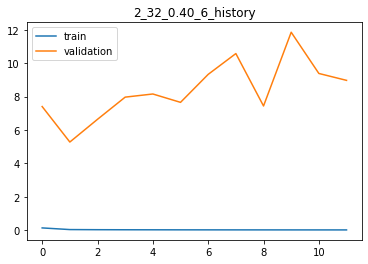

Train loss: 0.342, Val loss: 0.995, Test loss: 0.893
Train S class recall: 0.271, Val S class recall: 0.144, Test S class recall: 0.077,
Train F1 metric: 0.733, Val F1 metric: 0.074, Test F1 metric: 0.189,
Train accuracy: 0.853, Val accuracy: 0.593, Test accuracy: 0.523
23911/23911 [==============================] - 8s 351us/step
[[11459  7420  1137  1648]
 [   63   204    40     4]
 [  228   398   621   309]
 [  113    16    25   226]]


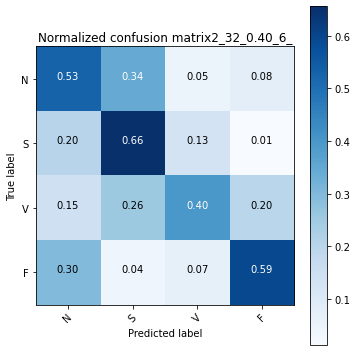

In [116]:
# eliminated the dropout from the last dense layer and adjusted class weights for Val loss claculation 
# [0:1, 1:70, 2:14, 3:493]
# added a conv layer without fropout right after input with k/2 kernel size
filters = [32]
dropout_rates = [0.4]
layers = [2]
kernel_size = [6]
for l in layers:
    for n in filters:
        for d in dropout_rates:
            for k in kernel_size:
                print("Number of leyers: {}, Number of filters: {}, Dropout rate: {}, Kernel size: {}.".format(l, n, d, k))
                sff.full_process(train_df, val_df, test_df, l, n, d, k, 'cnn', with_standard=False)

Number of leyers: 2, Number of filters: 32, Dropout rate: 0.5, Kernel size: 6.
Class weights [(1, 0.0), (1, 1.0), (1, 2.0), (1, 3.0)]


/Users/zhannahakhverdyan/anaconda3/envs/mit-bih-arrhythmia-database-1.0.0/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Train on 237784 samples, validate on 9860 samples
Epoch 1/100
237784/237784 [==============================] - 222s 932us/step - loss: 0.1472 - sClassRecall: 0.9356 - f1_metric: 0.9645 - categorical_accuracy: 0.9589 - val_loss: 7.7393 - val_sClassRecall: 0.1000 - val_f1_metric: 0.0052 - val_categorical_accuracy: 0.0029

Epoch 00001: val_loss improved from inf to 7.73928, saving model to ../../models/2_32_0.50_6_best_model.h5
Epoch 2/100
237784/237784 [==============================] - 206s 865us/step - loss: 0.0437 - sClassRecall: 0.9800 - f1_metric: 0.9907 - categorical_accuracy: 0.9871 - val_loss: 7.8102 - val_sClassRecall: 0.1137 - val_f1_metric: 0.0058 - val_categorical_accuracy: 0.0508

Epoch 00002: val_loss did not improve from 7.73928
Epoch 3/100
237784/237784 [==============================] - 202s 848us/step - loss: 0.0351 - sClassRecall: 0.9836 - f1_metric: 0.9924 - categorical_accuracy: 0.9894 - val_loss: 7.4694 - val_sClassRecall: 0.0500 - val_f1_metric: 0.0057 - val_catego

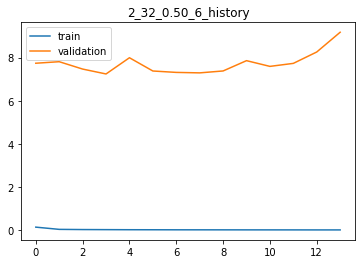

Train loss: 0.343, Val loss: 0.893, Test loss: 0.715
Train S class recall: 0.248, Val S class recall: 0.001, Test S class recall: 0.018,
Train F1 metric: 0.699, Val F1 metric: 0.003, Test F1 metric: 0.076,
Train accuracy: 0.869, Val accuracy: 0.535, Test accuracy: 0.693
23911/23911 [==============================] - 6s 247us/step
[[16184    23     1  5456]
 [  217    58     0    36]
 [  939    70   168   379]
 [  220     0     1   159]]


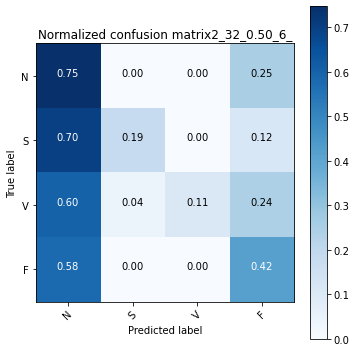

In [117]:
# eliminated the dropout from the last dense layer and adjusted class weights for Val loss claculation 
# [0:1, 1:70, 2:14, 3:493]
# added a conv layer without fropout right after input with k/2 kernel size
filters = [32]
dropout_rates = [0.5]
layers = [2]
kernel_size = [6]
for l in layers:
    for n in filters:
        for d in dropout_rates:
            for k in kernel_size:
                print("Number of leyers: {}, Number of filters: {}, Dropout rate: {}, Kernel size: {}.".format(l, n, d, k))
                sff.full_process(train_df, val_df, test_df, l, n, d, k, 'cnn', with_standard=False)

Number of leyers: 1, Number of filters: 16, Dropout rate: 0.5, Kernel size: 6.
Class weights [(1, 0.0), (1, 1.0), (1, 2.0), (1, 3.0)]


/Users/zhannahakhverdyan/anaconda3/envs/mit-bih-arrhythmia-database-1.0.0/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Train on 237784 samples, validate on 9860 samples
Epoch 1/100
237784/237784 [==============================] - 115s 483us/step - loss: 0.1717 - sClassRecall: 0.9365 - f1_metric: 0.9670 - categorical_accuracy: 0.9663 - val_loss: 11.8569 - val_sClassRecall: 0.0000e+00 - val_f1_metric: 0.0000e+00 - val_categorical_accuracy: 0.9137

Epoch 00001: val_loss improved from inf to 11.85688, saving model to ../../models/1_16_0.50_6_best_model.h5
Epoch 2/100
237784/237784 [==============================] - 111s 465us/step - loss: 0.0397 - sClassRecall: 0.9852 - f1_metric: 0.9930 - categorical_accuracy: 0.9904 - val_loss: 15.3583 - val_sClassRecall: 0.0000e+00 - val_f1_metric: 0.0019 - val_categorical_accuracy: 0.8937

Epoch 00002: val_loss did not improve from 11.85688
Epoch 3/100
237784/237784 [==============================] - 96s 405us/step - loss: 0.0303 - sClassRecall: 0.9868 - f1_metric: 0.9940 - categorical_accuracy: 0.9916 - val_loss: 16.8345 - val_sClassRecall: 0.0000e+00 - val_f1_metric:

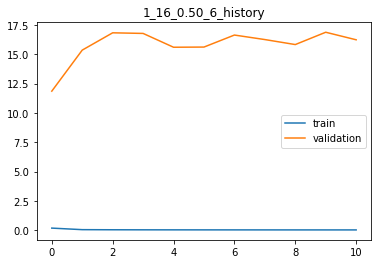

Train loss: 2.188, Val loss: 0.456, Test loss: 0.450
Train S class recall: 0.116, Val S class recall: 0.000, Test S class recall: 0.006,
Train F1 metric: 0.156, Val F1 metric: 0.000, Test F1 metric: 0.004,
Train accuracy: 0.383, Val accuracy: 0.914, Test accuracy: 0.906
23911/23911 [==============================] - 3s 111us/step
[[21642    21     1     0]
 [  301    10     0     0]
 [ 1480    74     2     0]
 [  380     0     0     0]]


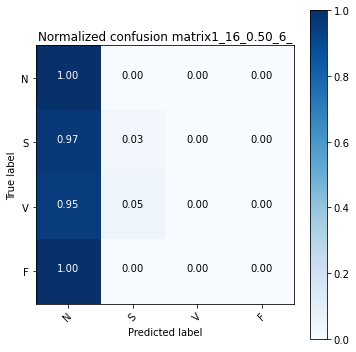

In [118]:
# eliminated the dropout from the last dense layer and adjusted class weights for Val loss claculation 
# [0:1, 1:70, 2:14, 3:493]
# added a conv layer without fropout right after input with k/2 kernel size
filters = [16]
dropout_rates = [0.5]
layers = [1]
kernel_size = [6]
for l in layers:
    for n in filters:
        for d in dropout_rates:
            for k in kernel_size:
                print("Number of leyers: {}, Number of filters: {}, Dropout rate: {}, Kernel size: {}.".format(l, n, d, k))
                sff.full_process(train_df, val_df, test_df, l, n, d, k, 'cnn', with_standard=False)

Number of leyers: 1, Number of filters: 16, Dropout rate: 0.33, Kernel size: 6.
Class weights [(1, 0.0), (1, 1.0), (1, 2.0), (1, 3.0)]


/Users/zhannahakhverdyan/anaconda3/envs/mit-bih-arrhythmia-database-1.0.0/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Train on 237784 samples, validate on 9860 samples
Epoch 1/100
237784/237784 [==============================] - 99s 418us/step - loss: 0.1843 - sClassRecall: 0.9715 - f1_metric: 0.9530 - categorical_accuracy: 0.9644 - val_loss: 14.7638 - val_sClassRecall: 0.0000e+00 - val_f1_metric: 0.0000e+00 - val_categorical_accuracy: 0.9142

Epoch 00001: val_loss improved from inf to 14.76383, saving model to ../../models/1_16_0.33_6_best_model.h5
Epoch 2/100
237784/237784 [==============================] - 110s 463us/step - loss: 0.0333 - sClassRecall: 0.9874 - f1_metric: 0.9945 - categorical_accuracy: 0.9922 - val_loss: 16.2856 - val_sClassRecall: 0.0026 - val_f1_metric: 0.0815 - val_categorical_accuracy: 0.9118

Epoch 00002: val_loss did not improve from 14.76383
Epoch 3/100
237784/237784 [==============================] - 100s 421us/step - loss: 0.0248 - sClassRecall: 0.9891 - f1_metric: 0.9953 - categorical_accuracy: 0.9934 - val_loss: 15.3966 - val_sClassRecall: 0.0026 - val_f1_metric: 0.2145 

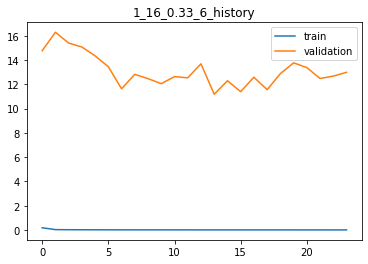

Train loss: 0.018, Val loss: 0.472, Test loss: 0.552
Train S class recall: 0.261, Val S class recall: 0.003, Test S class recall: 0.025,
Train F1 metric: 0.827, Val F1 metric: 0.237, Test F1 metric: 0.328,
Train accuracy: 0.996, Val accuracy: 0.833, Test accuracy: 0.796
23911/23911 [==============================] - 3s 107us/step
[[17645    51  3963     5]
 [  164    61    86     0]
 [  220     0  1336     0]
 [  217     0   163     0]]


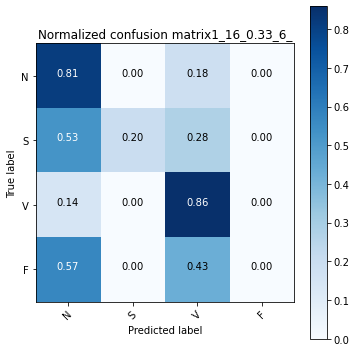

In [119]:
# eliminated the dropout from the last dense layer and adjusted class weights for Val loss claculation 
# [0:1, 1:70, 2:14, 3:493]
# added a conv layer without fropout right after input with k/2 kernel size
filters = [16]
dropout_rates = [0.33]
layers = [1]
kernel_size = [6]
for l in layers:
    for n in filters:
        for d in dropout_rates:
            for k in kernel_size:
                print("Number of leyers: {}, Number of filters: {}, Dropout rate: {}, Kernel size: {}.".format(l, n, d, k))
                sff.full_process(train_df, val_df, test_df, l, n, d, k, 'cnn', with_standard=False)

In [121]:
saved_model = load_model('../../models/1_16_0.33_6_best_model.h5', \
                             custom_objects={'f1_metric': sff.f1_metric, 'sClassRecall':sClassRecall})

In [125]:
x_train, x_val, x_test, y_train, y_val, y_test, class_weights, val_sample_weight = sff.process_data(train_df, val_df, test_df, 'cnn', with_standard=False)
x_train.shape

Class weights [(1, 0.0), (1, 1.0), (1, 2.0), (1, 3.0)]


(237784, 360, 1)

In [152]:
y_test_pred = saved_model.predict_proba(x_test, batch_size=512, verbose=1)

23911/23911 [==============================] - 2s 91us/step


In [153]:
y_test_pred

array([[6.08e-01, 9.31e-02, 2.98e-01, 3.95e-04],
       [5.01e-01, 2.88e-01, 2.11e-01, 2.77e-04],
       [4.24e-01, 3.68e-01, 2.07e-01, 2.50e-04],
       ...,
       [9.97e-01, 9.49e-04, 8.68e-04, 8.66e-04],
       [9.93e-01, 2.21e-03, 2.39e-03, 2.32e-03],
       [9.90e-01, 7.92e-04, 3.68e-03, 6.01e-03]], dtype=float32)

In [154]:
cm = confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))
print(cm)

[[17645    51  3963     5]
 [  164    61    86     0]
 [  220     0  1336     0]
 [  217     0   163     0]]


In [155]:
print(sClassRecall(y_test, y_test_pred))

tf.Tensor(0.18649517, shape=(), dtype=float32)


In [156]:
test_loss, test_sClassRecall, test_f1_metric, test_acc = saved_model.evaluate(x_test, y_test, verbose=0)

In [10]:
importlib.reload(sff)

<module 'standard_mlp_cnn_fitting_funcs' from '/Users/zhannahakhverdyan/Springboard/Capstone2/src/standard_mlp_cnn_fitting_funcs.py'>

Number of leyers: 1, Number of filters: 32, Dropout rate: 0.25, Kernel size: 5.


/Users/zhannahakhverdyan/anaconda3/envs/mit-bih-arrhythmia-database-1.0.0/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Class weights [(1.0, 0.0), (1.0, 1.0), (1.0, 2.0), (1.0, 3.0)]
Train on 237784 samples, validate on 9860 samples
Epoch 1/100
237784/237784 [==============================] - 247s 1ms/step - loss: 24.1599 - categorical_accuracy: 0.9903 - val_loss: 170.5208 - val_categorical_accuracy: 0.8730

Epoch 00001: val_loss improved from inf to 170.52081, saving model to ../../models/1_32_0.25_5_best_model.h5
Epoch 2/100
237784/237784 [==============================] - 219s 921us/step - loss: 23.9925 - categorical_accuracy: 0.9941 - val_loss: 169.7865 - val_categorical_accuracy: 0.8583

Epoch 00002: val_loss improved from 170.52081 to 169.78653, saving model to ../../models/1_32_0.25_5_best_model.h5
Epoch 3/100
237784/237784 [==============================] - 299s 1ms/step - loss: 23.9644 - categorical_accuracy: 0.9950 - val_loss: 165.5870 - val_categorical_accuracy: 0.7987

Epoch 00003: val_loss improved from 169.78653 to 165.58697, saving model to ../../models/1_32_0.25_5_best_model.h5
Epoch 4/1

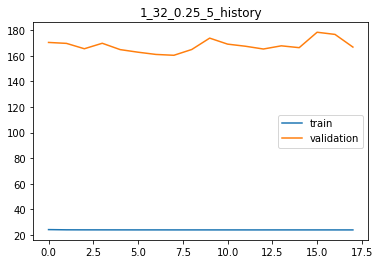

Train loss: 23.900, Val loss: 26.030, Test loss: 29.726
Train accuracy: 0.997, Val accuracy: 0.932, Test accuracy: 0.810
23911/23911 [==============================] - 4s 186us/step
[[18062    34  3451   117]
 [  204    26    80     1]
 [  241     9  1245    61]
 [  237     0   112    31]]


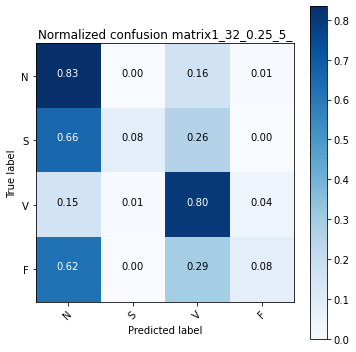

In [15]:
# eliminated the dropout from the last dense layer and adjusted class weights for Val loss claculation 
# [0:1, 1:70, 2:14, 3:493]
# modified the loss function to calculate based on probability of the class from_logits=True
# training with synthetic samples
# batch=32

filters = [32]
dropout_rates = [0.25]
layers = [1]
kernel_size = [5]
for l in layers:
    for n in filters:
        for d in dropout_rates:
            for k in kernel_size:
                print("Number of leyers: {}, Number of filters: {}, Dropout rate: {}, Kernel size: {}.".format(l, n, d, k))
                sff.full_process(train_df, val_df, test_df, l, n, d, k, 'cnn', with_standard=False)

Number of leyers: 2, Number of filters: 32, Dropout rate: 0.25, Kernel size: 5.


/Users/zhannahakhverdyan/anaconda3/envs/mit-bih-arrhythmia-database-1.0.0/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Class weights [(1.0, 0.0), (1.0, 1.0), (1.0, 2.0), (1.0, 3.0)]
Train on 237784 samples, validate on 9860 samples
Epoch 1/100
237784/237784 [==============================] - 288s 1ms/step - loss: 24.2428 - categorical_accuracy: 0.9883 - val_loss: 172.8854 - val_categorical_accuracy: 0.7406

Epoch 00001: val_loss improved from inf to 172.88538, saving model to ../../models/2_32_0.25_5_best_model.h5
Epoch 2/100
237784/237784 [==============================] - 330s 1ms/step - loss: 23.9977 - categorical_accuracy: 0.9940 - val_loss: 172.1904 - val_categorical_accuracy: 0.7931

Epoch 00002: val_loss improved from 172.88538 to 172.19043, saving model to ../../models/2_32_0.25_5_best_model.h5
Epoch 3/100
237784/237784 [==============================] - 275s 1ms/step - loss: 23.9582 - categorical_accuracy: 0.9951 - val_loss: 166.9686 - val_categorical_accuracy: 0.9017

Epoch 00003: val_loss improved from 172.19043 to 166.96858, saving model to ../../models/2_32_0.25_5_best_model.h5
Epoch 4/100

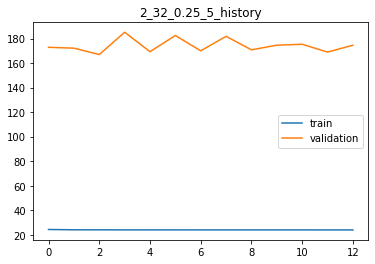

Train loss: 23.921, Val loss: 26.990, Test loss: 25.973
Train accuracy: 0.996, Val accuracy: 0.902, Test accuracy: 0.936
23911/23911 [==============================] - 5s 198us/step
[[21254    32   166   212]
 [  233    40    38     0]
 [  464     3  1072    17]
 [  354     0    22     4]]


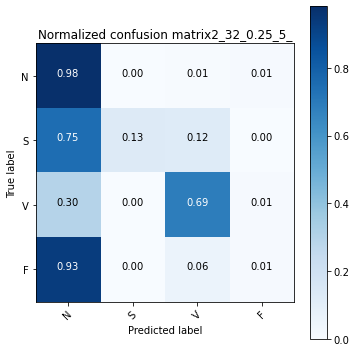

In [16]:
# eliminated the dropout from the last dense layer and adjusted class weights for Val loss claculation 
# [0:1, 1:70, 2:14, 3:493]
# modified teh loss function to calculate based on probability of the class from_logits=True
# training with synthetic samples
# batch=32

filters = [32]
dropout_rates = [0.25]
layers = [2]
kernel_size = [5]
for l in layers:
    for n in filters:
        for d in dropout_rates:
            for k in kernel_size:
                print("Number of leyers: {}, Number of filters: {}, Dropout rate: {}, Kernel size: {}.".format(l, n, d, k))
                sff.full_process(train_df, val_df, test_df, l, n, d, k, 'cnn', with_standard=False)

Number of leyers: 1, Number of filters: 48, Dropout rate: 0.25, Kernel size: 5.
Class weights [(1.0, 0.0), (1.0, 1.0), (1.0, 2.0), (1.0, 3.0)]


/Users/zhannahakhverdyan/anaconda3/envs/mit-bih-arrhythmia-database-1.0.0/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Train on 237784 samples, validate on 9860 samples
Epoch 1/100
237784/237784 [==============================] - 418s 2ms/step - loss: 24.1131 - categorical_accuracy: 0.9911 - val_loss: 170.0783 - val_categorical_accuracy: 0.8802

Epoch 00001: val_loss improved from inf to 170.07829, saving model to ../../models/1_48_0.25_5_best_model.h5
Epoch 2/100
237784/237784 [==============================] - 397s 2ms/step - loss: 23.9780 - categorical_accuracy: 0.9945 - val_loss: 169.6410 - val_categorical_accuracy: 0.7706

Epoch 00002: val_loss improved from 170.07829 to 169.64104, saving model to ../../models/1_48_0.25_5_best_model.h5
Epoch 3/100
237784/237784 [==============================] - 453s 2ms/step - loss: 23.9593 - categorical_accuracy: 0.9950 - val_loss: 168.9773 - val_categorical_accuracy: 0.8412

Epoch 00003: val_loss improved from 169.64104 to 168.97733, saving model to ../../models/1_48_0.25_5_best_model.h5
Epoch 4/100
237784/237784 [==============================] - 427s 2ms/step

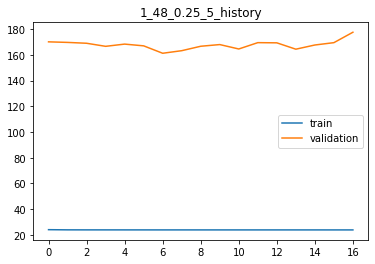

Train loss: 24.120, Val loss: 27.359, Test loss: 32.893
Train accuracy: 0.990, Val accuracy: 0.900, Test accuracy: 0.709
23911/23911 [==============================] - 7s 277us/step
[[15467    60  6137     0]
 [  168    12   131     0]
 [   68    10  1475     3]
 [  255     0   123     2]]


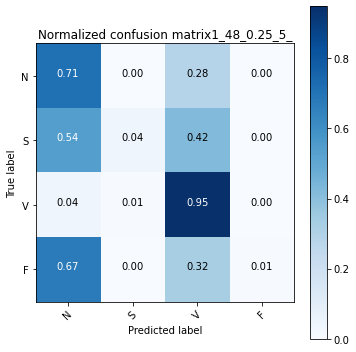

In [17]:
# eliminated the dropout from the last dense layer and adjusted class weights for Val loss claculation 
# [0:1, 1:70, 2:14, 3:493]
# modified teh loss function to calculate based on probability of the class from_logits=True
# training with synthetic samples
# batch=32

filters = [48]
dropout_rates = [0.25]
layers = [1]
kernel_size = [5]
for l in layers:
    for n in filters:
        for d in dropout_rates:
            for k in kernel_size:
                print("Number of leyers: {}, Number of filters: {}, Dropout rate: {}, Kernel size: {}.".format(l, n, d, k))
                sff.full_process(train_df, val_df, test_df, l, n, d, k, 'cnn', with_standard=False)

Number of leyers: 3, Number of filters: 32, Dropout rate: 0.25, Kernel size: 5.


/Users/zhannahakhverdyan/anaconda3/envs/mit-bih-arrhythmia-database-1.0.0/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Class weights [(1.0, 0.0), (1.0, 1.0), (1.0, 2.0), (1.0, 3.0)]
Train on 237784 samples, validate on 9860 samples
Epoch 1/100
237784/237784 [==============================] - 322s 1ms/step - loss: 24.5848 - categorical_accuracy: 0.9788 - val_loss: 186.8258 - val_categorical_accuracy: 0.9148

Epoch 00001: val_loss improved from inf to 186.82576, saving model to ../../models/3_32_0.25_5_best_model.h5
Epoch 2/100
237784/237784 [==============================] - 307s 1ms/step - loss: 24.1899 - categorical_accuracy: 0.9880 - val_loss: 184.3376 - val_categorical_accuracy: 0.9170

Epoch 00002: val_loss improved from 186.82576 to 184.33764, saving model to ../../models/3_32_0.25_5_best_model.h5
Epoch 3/100
237784/237784 [==============================] - 287s 1ms/step - loss: 24.1069 - categorical_accuracy: 0.9903 - val_loss: 177.9742 - val_categorical_accuracy: 0.9320

Epoch 00003: val_loss improved from 184.33764 to 177.97419, saving model to ../../models/3_32_0.25_5_best_model.h5
Epoch 4/100

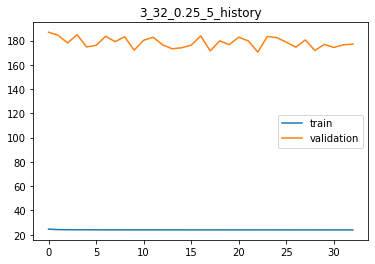

Train loss: 28.911, Val loss: 25.454, Test loss: 26.654
Train accuracy: 0.838, Val accuracy: 0.949, Test accuracy: 0.908
23911/23911 [==============================] - 7s 273us/step
[[20903     0   761     0]
 [  237    28    46     0]
 [  779     0   777     0]
 [  303     0    77     0]]


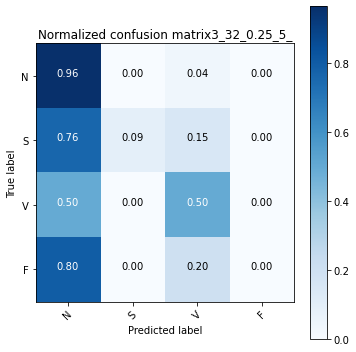

In [18]:
# eliminated the dropout from the last dense layer and adjusted class weights for Val loss claculation 
# [0:1, 1:70, 2:14, 3:493]
# modified teh loss function to calculate based on probability of the class from_logits=True
# training with synthetic samples
# batch=32

filters = [32]
dropout_rates = [0.25]
layers = [3]
kernel_size = [5]
for l in layers:
    for n in filters:
        for d in dropout_rates:
            for k in kernel_size:
                print("Number of leyers: {}, Number of filters: {}, Dropout rate: {}, Kernel size: {}.".format(l, n, d, k))
                sff.full_process(train_df, val_df, test_df, l, n, d, k, 'cnn', with_standard=False)

In [4]:
# promising models up to date
# before synthetis data introduction
import numpy as np
import pandas as pd
cm_name = ['cm_2_16_0.25_5', 'cm_3_16_0.25_5', 'cm_3_32_0.25_5', 'cm_2_60_0.25_5', 'cm_3_48_0.37_5', \
           'cm_3_72_0.5_5', 'cm_2_16_0.25_5', 'cm_2_32_0.33_6', 'cm_2_32_0.25_5', 'cm_3_32_0.25_5']

cms = [[[0.94, 0, 0.05, 0], [0.6, 0.16, 0.24, 0], [0.29, 0.03, 0.66, 0.03], [0.68, 0, 0.2, 0.12]],\
       [[0.98, 0, 0.02, 0], [0.77, 0.14, 0.08, 0.01], [0.23, 0.02, 0.66, 0.09], [0.78, 0, 0.16, 0.06]],\
       [[0.97, 0, 0.03, 0], [0.61, 0.17, 0.22, 0], [0.32, 0.01, 0.67, 0], [0.72, 0, 0.28, 0.01]],\
       [[0.92, 0, 0.07, 0], [0.55, 0.24, 0.21, 0], [0.22, 0.01, 0.77, 0], [0.7, 0, 0.28, 0.02]],\
       [[0.97, 0, 0.03, 0], [0.68, 0.18, 0.14, 0], [0.3, 0.04, 0.66, 0], [0.7, 0, 0.29, 0.01]],\
       [[0.99, 0, 0.01, 0], [0.77, 0.17, 0.05, 0], [0.47, 0.04, 0.5, 0], [0.71, 0, 0.28, 0]],\
       [[0.94, 0, 0.05, 0], [0.6, 0.16, 0.24, 0], [0.29, 0.03, 0.66, 0.03], [0.68, 0, 0.2, 0.12]],\
       [[0.94, 0, 0.05, 0], [0.69, 0.12, 0.19, 0], [0.3, 0.02, 0.68, 0], [0.62, 0, 0.34, 0.04]],\
       [[0.98, 0, 0.01, 0.01], [0.75, 0.13, 0.12, 0], [0.3, 0, 0.69, 0.01], [0.93, 0, 0.06, 0.01]],\
       [[0.96, 0, 0.04, 0], [0.76, 0.09, 0.15, 0], [0.5, 0, 0.5, 0], [0.8, 0, 0.2, 0]]]


def ave_recall(cm):
    ave_recall = (cm[1][1]*311+cm[2][2]*1556+cm[3][3]*380)/2247
    return round(ave_recall, 3)
def ave_precision(cm):
    prec_s = cm[1][1]*311/(cm[0][1]*21664+cm[1][1]*311+cm[2][1]*1556+cm[3][1]*380+np.finfo(float).eps)
    prec_v = cm[2][2]*311/(cm[0][2]*21664+cm[1][2]*311+cm[2][2]*1556+cm[3][2]*380+np.finfo(float).eps)
    prec_f = cm[3][3]*311/(cm[0][3]*21664+cm[1][3]*311+cm[2][3]*1556+cm[3][3]*380+np.finfo(float).eps)
    ave_prec = (prec_s*311+prec_v*1556+prec_f*380)/2247
    return round(ave_prec, 3)

def f1_score(precision, recall):
    score = 2*precision*recall/(precision+recall)
    return round(score, 3)

ave_recs = []
ave_precs = []
ave_f1s = []
for cm in cms:
    average_recall = ave_recall(cm)
    average_prec = ave_precision(cm)
    average_f1 = f1_score(average_prec, average_recall)
    ave_recs.append(average_recall)
    ave_precs.append(average_prec)
    ave_f1s.append(average_f1)
metric_df = pd.DataFrame({'CM':cm_name, 'Average recall': ave_recs, 'Average precision':ave_precs,\
                          'Average F1 score':ave_f1s})
metric_df

CM  Average recall  Average precision  Average F1 score
0  cm_2_16_0.25_5           0.499              0.203             0.289
1  cm_3_16_0.25_5           0.487              0.192             0.275
2  cm_3_32_0.25_5           0.489              0.323             0.389
3  cm_2_60_0.25_5           0.570              0.310             0.402
4  cm_3_48_0.37_5           0.484              0.282             0.356
5   cm_3_72_0.5_5           0.370              0.160             0.223
6  cm_2_16_0.25_5           0.499              0.203             0.289
7  cm_2_32_0.33_6           0.494              0.277             0.355
8  cm_2_32_0.25_5           0.497              0.251             0.334
9  cm_3_32_0.25_5           0.359              0.199             0.256

The best architechture appears 3 layers 32 nodes, 25% dropout and kernel size 5 while monitoring the F1 score (including negative class N). Let's calculate the time savings that such a model will provide and what fraction of the abnormal beats will be cought.

In [41]:
# calculate the prevalence of abnormal beats
label_summary = test_df.Label_class.value_counts()
prevalence = label_summary[['S', 'V', 'F']].sum()/label_summary.sum()
print("Average prevalence of abnormal beats: ", round(prevalence,3))
print("Average percentage of beats that the model detects: ", round(100*metric_df.loc[2, 'Average recall'],3))
print("Average percent time saving per record review: ", round(100*(1-prevalence*metric_df.loc[2, 'Average recall']/\
                                                         metric_df.loc[2, 'Average precision'])))

Average prevalence of abnormal beats:  0.094
Average percentage of beats that the model detects:  48.9
Average percent time saving per record review:  86.0


In [8]:
# calculate the prevalence of abnormal beats
label_summary = test_df.Label_class.value_counts()
prevalence = label_summary[['S', 'V', 'F']].sum()/label_summary.sum()
print("Average prevalence of abnormal beats: ", round(prevalence,3))
print("Average percentage of beats that the model detects: ", round(100*metric_df.loc[3, 'Average recall'],3))
print("Average percent time saving per record review: ", round(100*(1-prevalence*metric_df.loc[3, 'Average recall']/\
                                                         metric_df.loc[3, 'Average precision'])))

Average prevalence of abnormal beats:  0.094
Average percentage of beats that the model detects:  57.0
Average percent time saving per record review:  83.0


cm_3_32_0.25_5 and cm_2_60_0.25_5 are pretty close, but cm_3_32_0.25_5 provides better time saving, although smaller recall.